In [ ]:
# Import required libraries
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [ ]:
# Define a transform to convert images to tensors
transform = transforms.ToTensor()

# Download the MNIST training dataset
train_data = datasets.MNIST(
    root='data',       # where to save the data
    train=True,        # training set
    download=True,     # download if not already present
    transform=transform  # apply transformation
)

# Download the MNIST test dataset
test_data = datasets.MNIST(
    root='data',
    train=False,       # test set
    download=True,
    transform=transform
)
# If the output when running this block is 100%, the dataset was downloaded and stored correctly

5


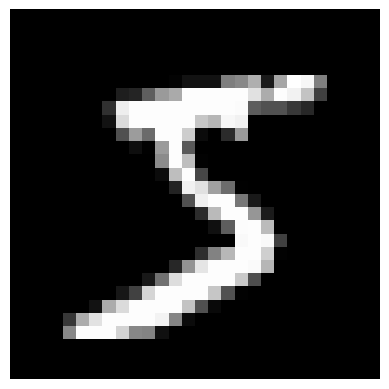

In [ ]:
# Get one sample and print its label, then show the image using matplotlib
image_tensor, label = train_data[0]  # get the first sample
print(label)  # print the label

# Visualize the first image in the training set
image_tensor = train_data[0][0]
image_to_plot = image_tensor.squeeze()
plt.imshow(image_to_plot, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Define a simple neural network for digit classification
class DigitClassifier(nn.Module):  # 1. Inherit from nn.Module
    def __init__(self):
        super().__init__()  # 2. Init the base class
        self.hidden = nn.Linear(784, 128)  # Hidden layer: 784 input features (28x28 pixels) to 128
        self.output = nn.Linear(128, 10)   # Output layer: 128 features to 10 classes (digits 0-9)
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        x = self.hidden(x)
        x = F.relu(x)
        x = self.output(x)
        return x  

In [ ]:
# Create a DataLoader for batching the training data
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)

# Instantiate the model
instance = DigitClassifier()
# Define the optimizer
optimizer = torch.optim.SGD(instance.parameters(), lr=0.015)

# Training loop (one epoch)
for images, labels in train_dataloader:
    # Forward pass: compute model output
    model = instance(images)
    # Define the loss function
    criterion = nn.CrossEntropyLoss()
    loss = criterion(model, labels)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)

tensor(2.3102, grad_fn=<NllLossBackward0>)
tensor(2.3001, grad_fn=<NllLossBackward0>)
tensor(2.2919, grad_fn=<NllLossBackward0>)
tensor(2.2990, grad_fn=<NllLossBackward0>)
tensor(2.2901, grad_fn=<NllLossBackward0>)
tensor(2.2951, grad_fn=<NllLossBackward0>)
tensor(2.3044, grad_fn=<NllLossBackward0>)
tensor(2.2836, grad_fn=<NllLossBackward0>)
tensor(2.2829, grad_fn=<NllLossBackward0>)
tensor(2.3085, grad_fn=<NllLossBackward0>)
tensor(2.2770, grad_fn=<NllLossBackward0>)
tensor(2.2718, grad_fn=<NllLossBackward0>)
tensor(2.2781, grad_fn=<NllLossBackward0>)
tensor(2.2550, grad_fn=<NllLossBackward0>)
tensor(2.2791, grad_fn=<NllLossBackward0>)
tensor(2.2840, grad_fn=<NllLossBackward0>)
tensor(2.2551, grad_fn=<NllLossBackward0>)
tensor(2.2751, grad_fn=<NllLossBackward0>)
tensor(2.2711, grad_fn=<NllLossBackward0>)
tensor(2.2475, grad_fn=<NllLossBackward0>)
tensor(2.2663, grad_fn=<NllLossBackward0>)
tensor(2.2603, grad_fn=<NllLossBackward0>)
tensor(2.2390, grad_fn=<NllLossBackward0>)
tensor(2.24

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 3, 2,
        4, 4, 6, 3, 5, 5, 2, 0, 4, 1, 9, 5, 7, 8, 9, 2])
Predicted: 6, Actual: 5


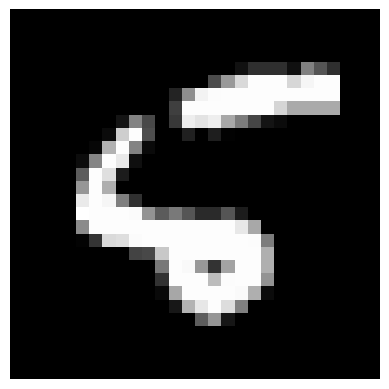

Predicted: 6, Actual: 4


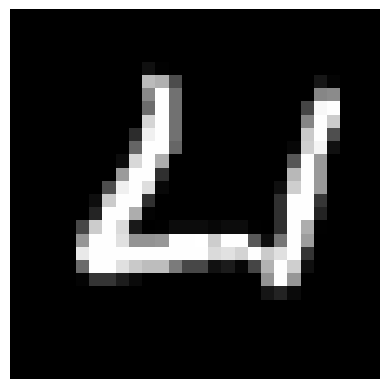

Predicted: 3, Actual: 1


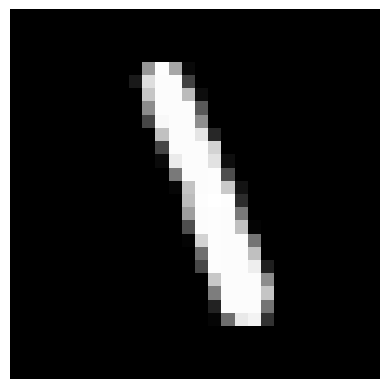

Predicted: 2, Actual: 6


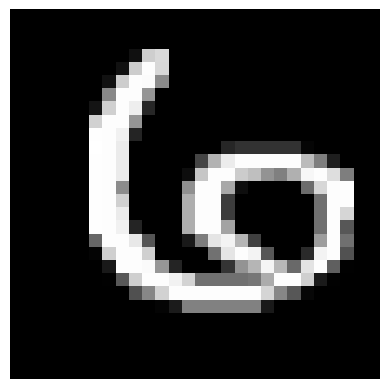

Predicted: 2, Actual: 3


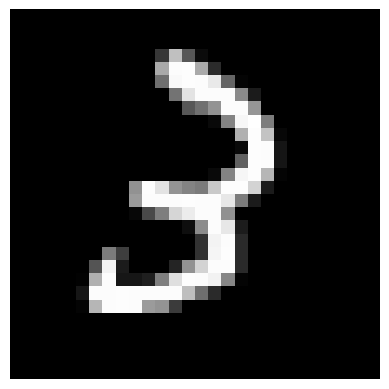

tensor([7, 4, 2, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 7, 9, 7, 9, 6, 2, 7, 8, 4, 7, 5,
        6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 1,
        3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5])
Predicted: 2, Actual: 6


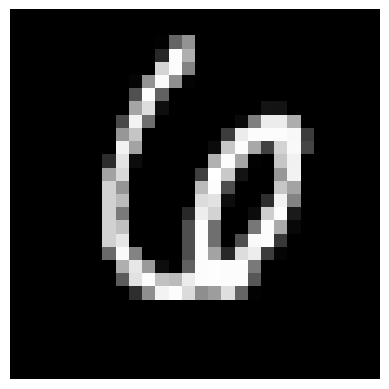

Predicted: 7, Actual: 9


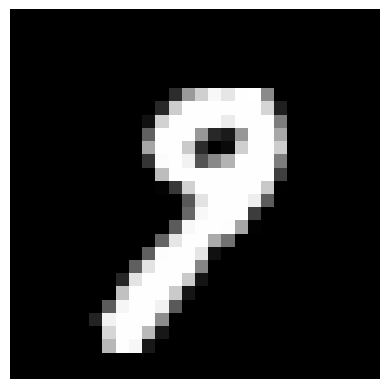

Predicted: 7, Actual: 2


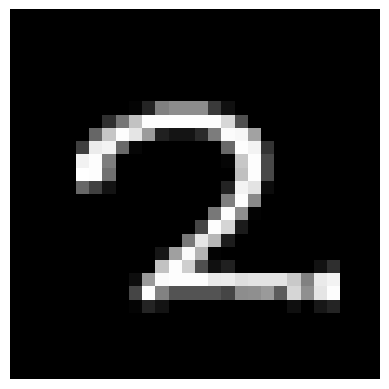

Predicted: 9, Actual: 7


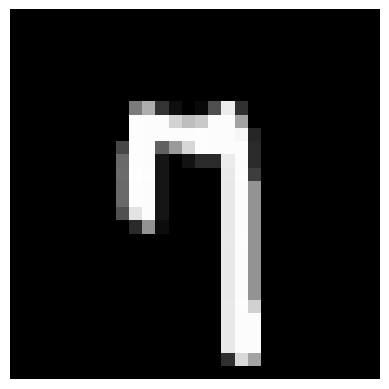

Predicted: 5, Actual: 3


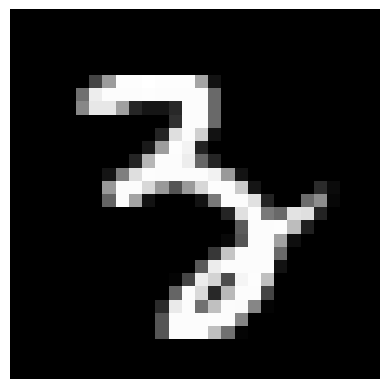

Predicted: 4, Actual: 9


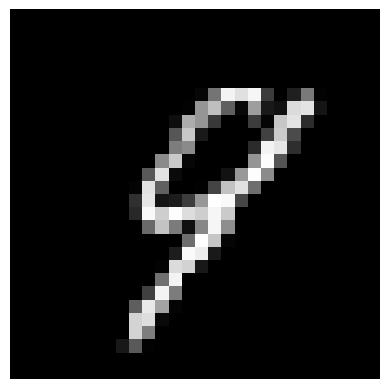

Predicted: 1, Actual: 7


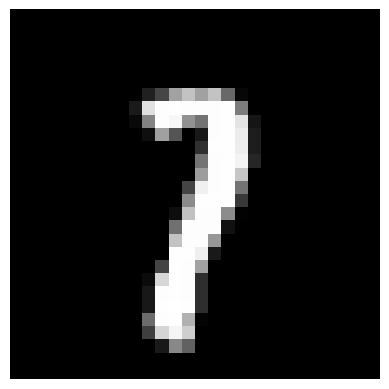

Predicted: 4, Actual: 7


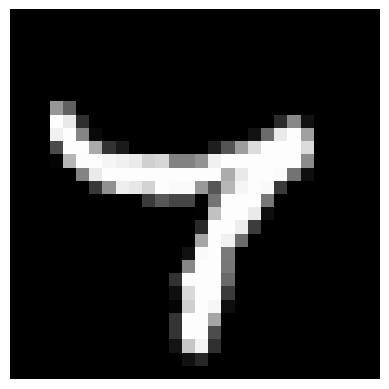

tensor([8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 9, 1, 8, 2, 0, 8, 9, 9,
        5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 4, 1, 4, 4, 7, 3, 3, 2, 1,
        1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1])
Predicted: 9, Actual: 7


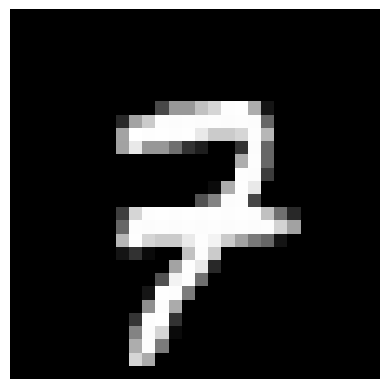

Predicted: 8, Actual: 2


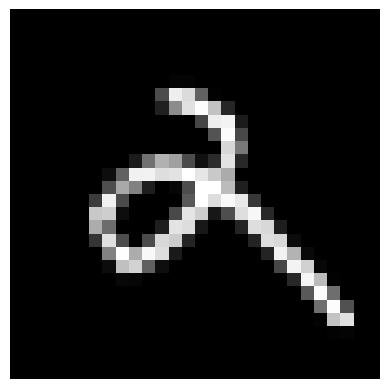

Predicted: 4, Actual: 5


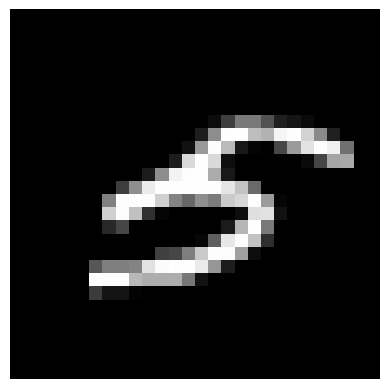

Predicted: 3, Actual: 2


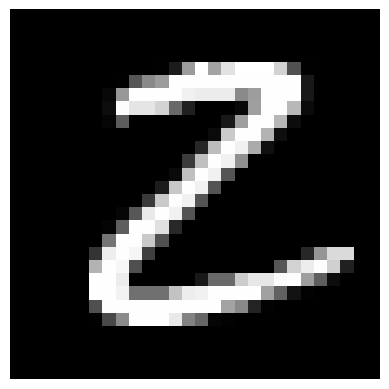

Predicted: 1, Actual: 7


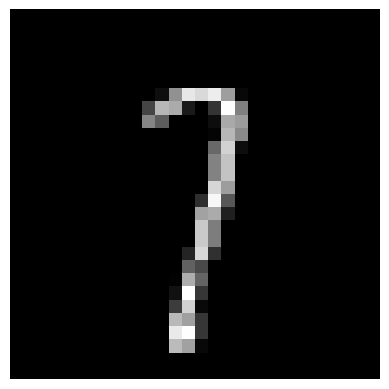

tensor([0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0,
        3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1,
        5, 8, 8, 4, 2, 5, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7])
Predicted: 8, Actual: 3


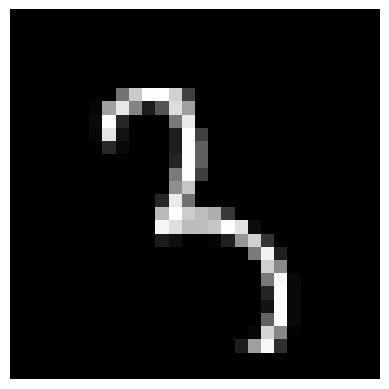

Predicted: 5, Actual: 6


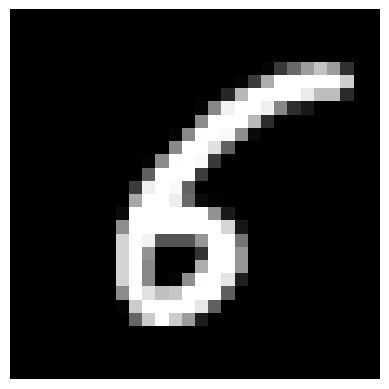

Predicted: 7, Actual: 8


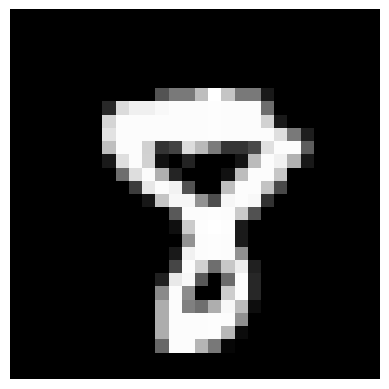

Predicted: 8, Actual: 9


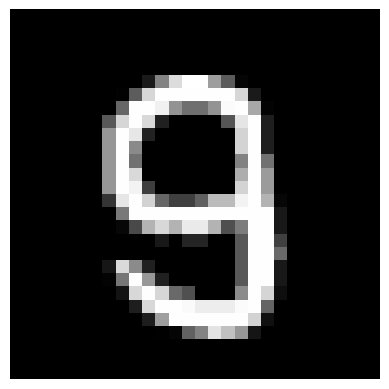

Predicted: 4, Actual: 7


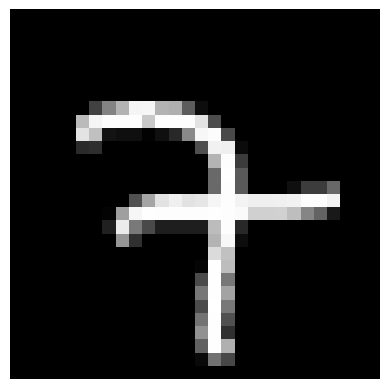

Predicted: 5, Actual: 3


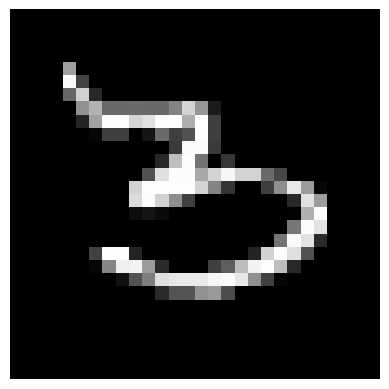

tensor([2, 8, 2, 0, 8, 1, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1,
        2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 3, 6, 7, 1, 2,
        9, 0, 2, 9, 4, 3, 3, 0, 0, 5, 1, 9, 6, 8, 0, 5])
Predicted: 0, Actual: 6


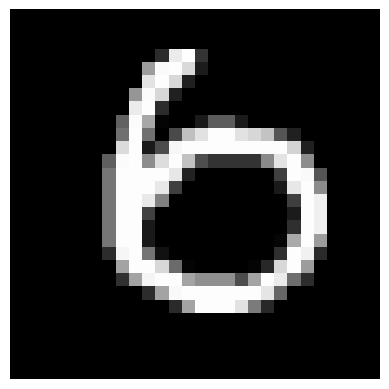

Predicted: 1, Actual: 5


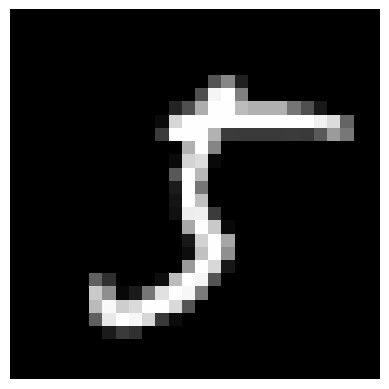

Predicted: 4, Actual: 8


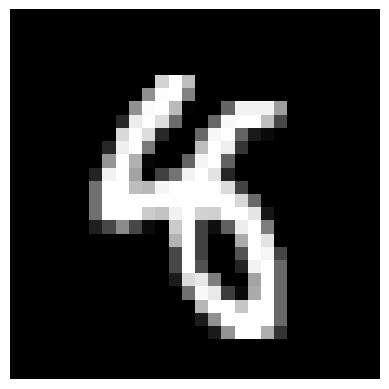

Predicted: 3, Actual: 8


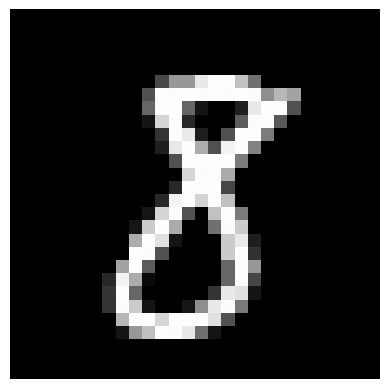

Predicted: 6, Actual: 4


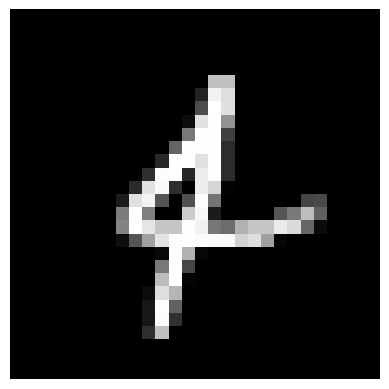

Predicted: 9, Actual: 4


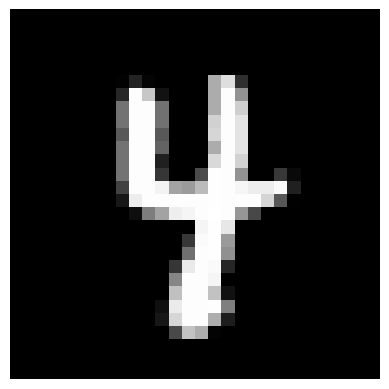

Predicted: 9, Actual: 7


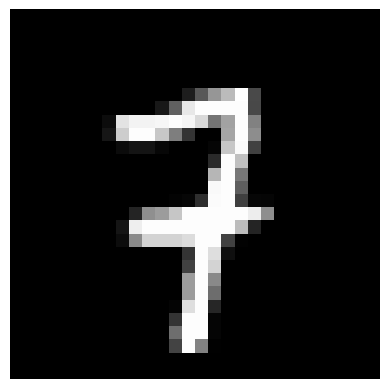

Predicted: 5, Actual: 3


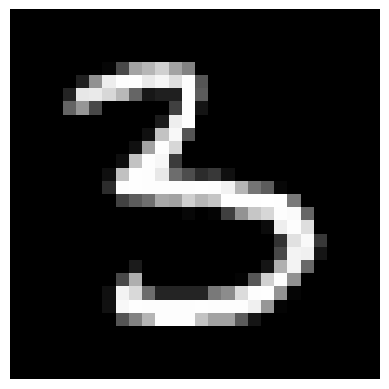

Predicted: 8, Actual: 5


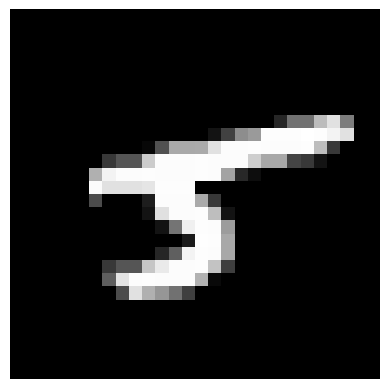

Predicted: 0, Actual: 2


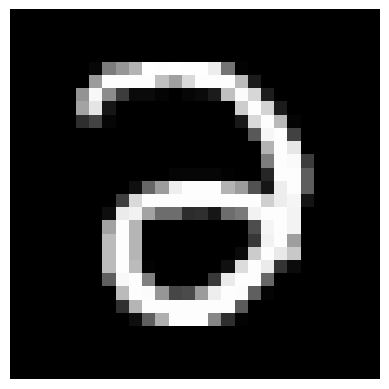

tensor([1, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 5, 3, 3, 9, 7, 8, 6, 3, 4, 1, 3,
        8, 1, 0, 5, 1, 7, 1, 5, 0, 6, 1, 8, 5, 1, 7, 9, 4, 6, 7, 2, 5, 0, 6, 5,
        6, 3, 7, 2, 0, 8, 8, 5, 9, 1, 1, 4, 0, 7, 3, 7])
Predicted: 1, Actual: 9


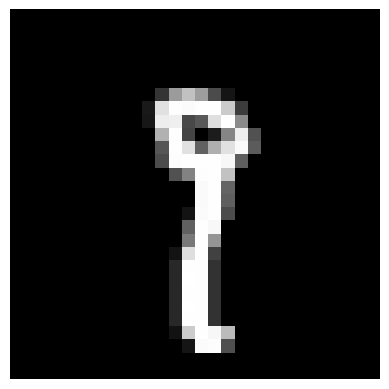

Predicted: 7, Actual: 2


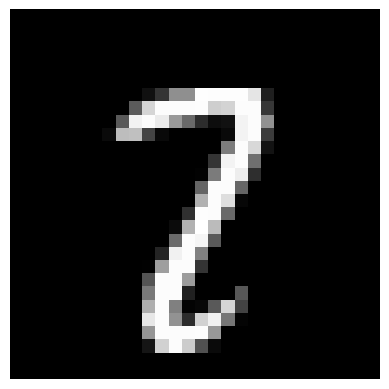

Predicted: 3, Actual: 5


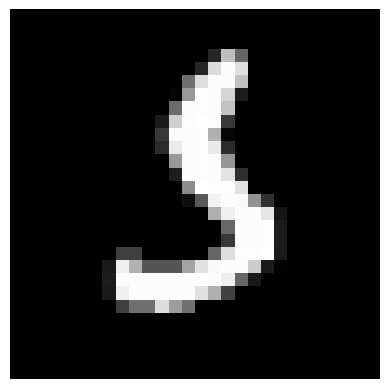

Predicted: 4, Actual: 6


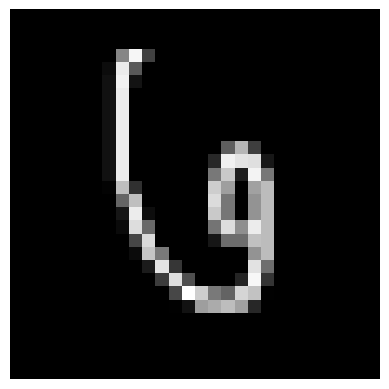

Predicted: 7, Actual: 3


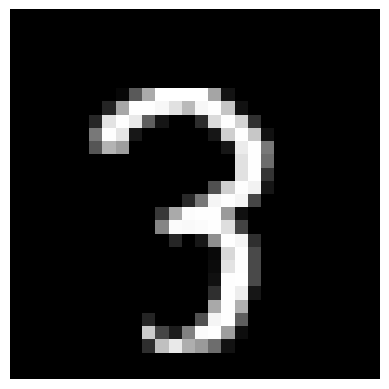

Predicted: 0, Actual: 5


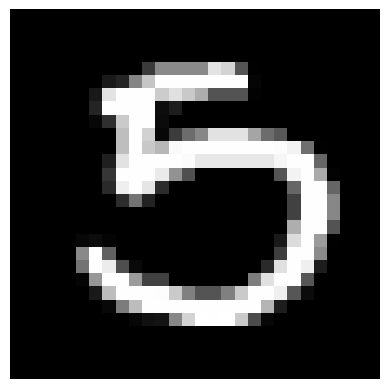

Predicted: 7, Actual: 2


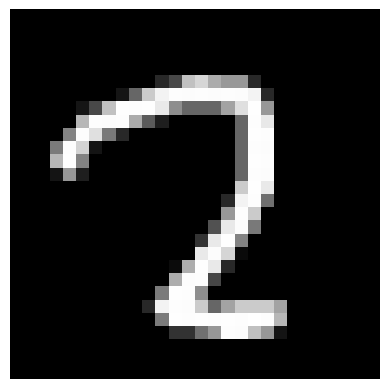

Predicted: 9, Actual: 4


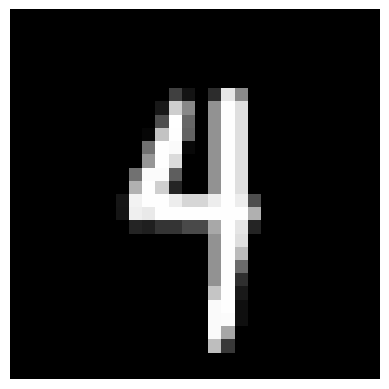

Predicted: 7, Actual: 3


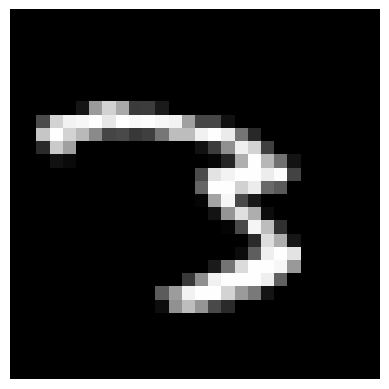

tensor([6, 1, 6, 2, 1, 9, 2, 8, 6, 1, 9, 5, 2, 5, 4, 4, 2, 8, 3, 9, 2, 4, 5, 0,
        3, 1, 7, 7, 5, 7, 9, 7, 1, 9, 2, 1, 4, 2, 9, 2, 0, 4, 9, 1, 4, 8, 1, 8,
        4, 4, 9, 7, 8, 3, 7, 6, 0, 0, 3, 8, 8, 0, 6, 4])
Predicted: 9, Actual: 8


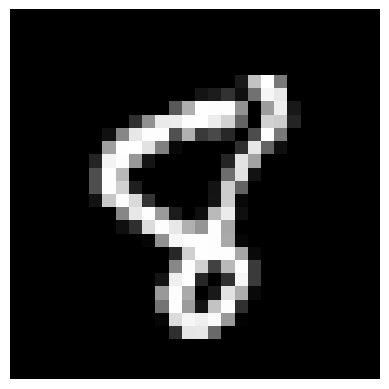

Predicted: 4, Actual: 5


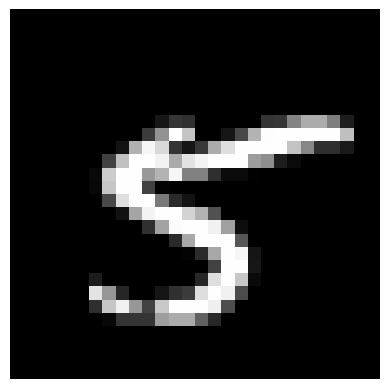

Predicted: 7, Actual: 8


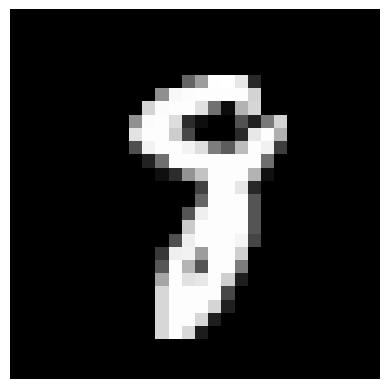

Predicted: 8, Actual: 0


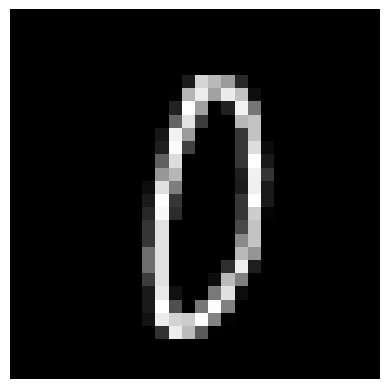

Predicted: 8, Actual: 2


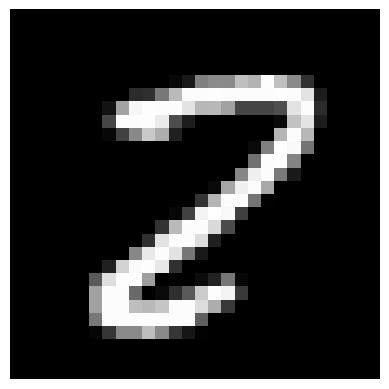

Predicted: 0, Actual: 6


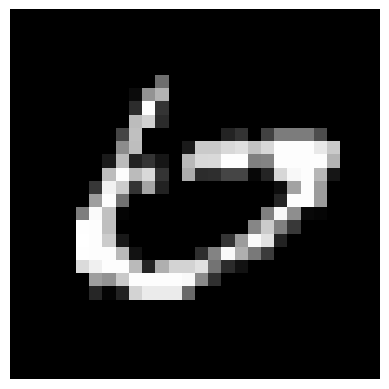

tensor([8, 5, 3, 3, 2, 3, 9, 1, 2, 5, 8, 0, 5, 4, 6, 6, 7, 8, 8, 2, 9, 5, 8, 9,
        6, 1, 8, 4, 1, 2, 8, 3, 1, 9, 7, 5, 4, 0, 9, 9, 9, 1, 0, 5, 2, 3, 7, 0,
        9, 4, 0, 6, 3, 9, 3, 2, 1, 3, 1, 5, 5, 5, 7, 8])
Predicted: 8, Actual: 9


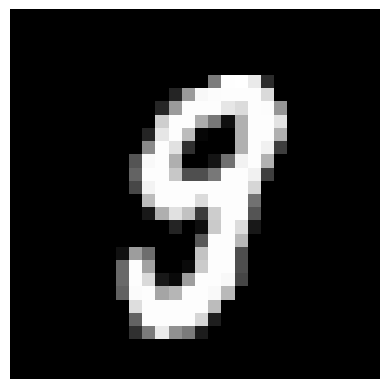

Predicted: 5, Actual: 3


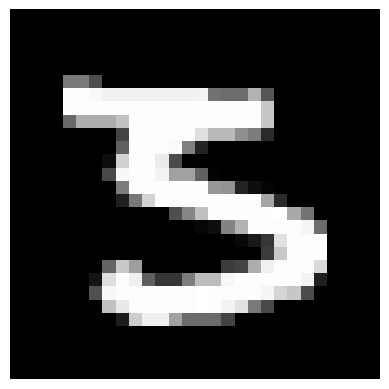

Predicted: 5, Actual: 6


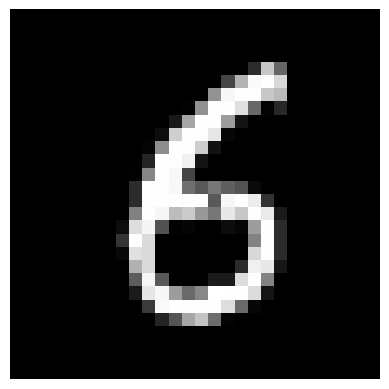

Predicted: 4, Actual: 6


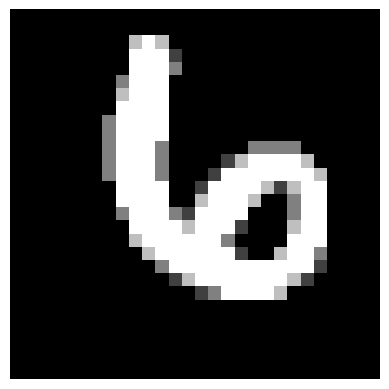

Predicted: 7, Actual: 3


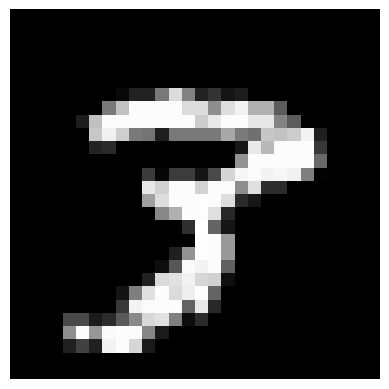

Predicted: 9, Actual: 7


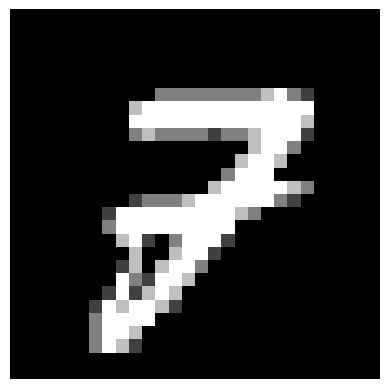

Predicted: 8, Actual: 5


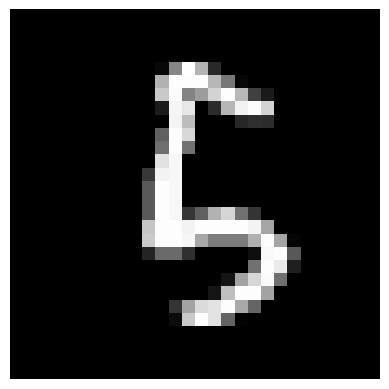

Predicted: 3, Actual: 9


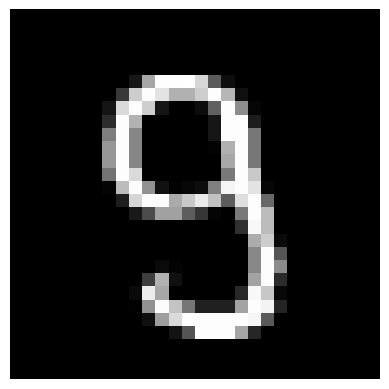

Predicted: 9, Actual: 8


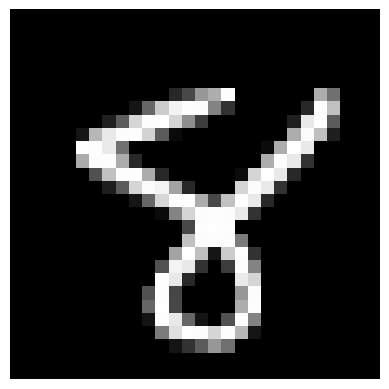

Predicted: 0, Actual: 8


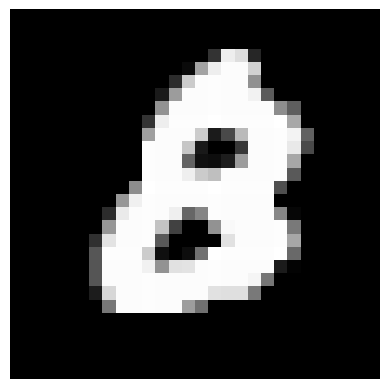

Predicted: 3, Actual: 5


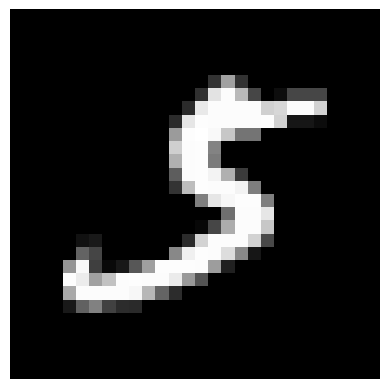

Predicted: 5, Actual: 3


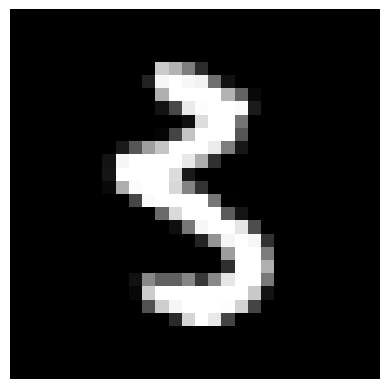

Predicted: 5, Actual: 6


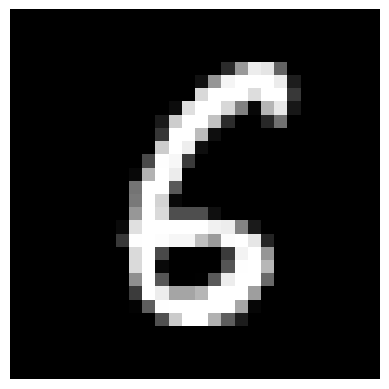

Predicted: 8, Actual: 4


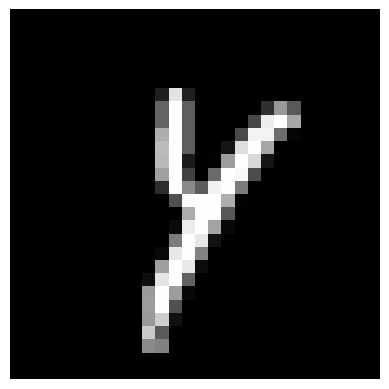

tensor([2, 2, 2, 8, 4, 6, 5, 4, 8, 9, 7, 8, 5, 0, 3, 8, 3, 1, 4, 6, 4, 4, 6, 4,
        1, 1, 8, 2, 5, 4, 8, 4, 4, 0, 0, 2, 3, 2, 9, 1, 5, 6, 7, 4, 4, 7, 9, 6,
        9, 0, 9, 8, 0, 9, 6, 0, 6, 5, 5, 4, 8, 3, 3, 9])
Predicted: 2, Actual: 6


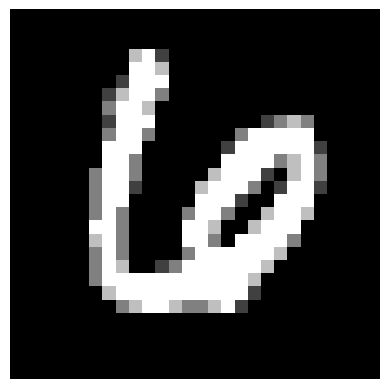

Predicted: 8, Actual: 3


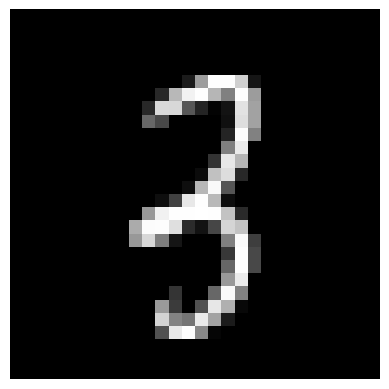

Predicted: 4, Actual: 2


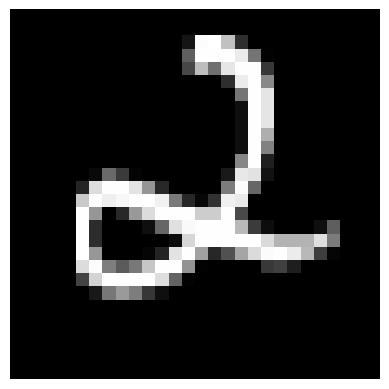

Predicted: 8, Actual: 1


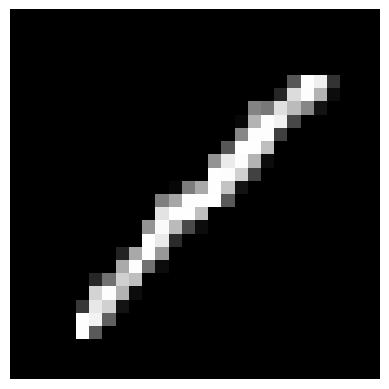

Predicted: 5, Actual: 3


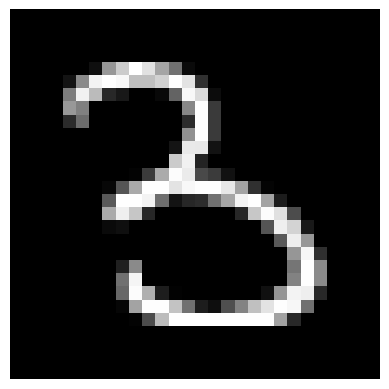

Predicted: 4, Actual: 9


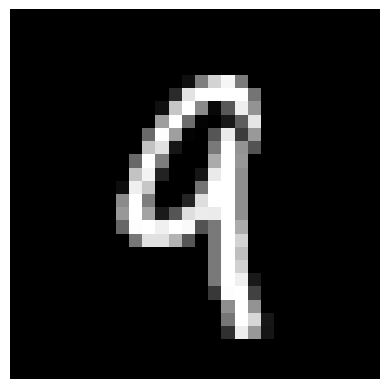

Predicted: 6, Actual: 3


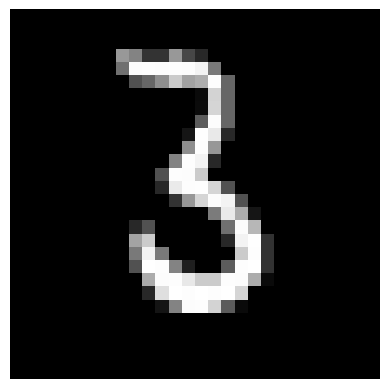

Predicted: 1, Actual: 2


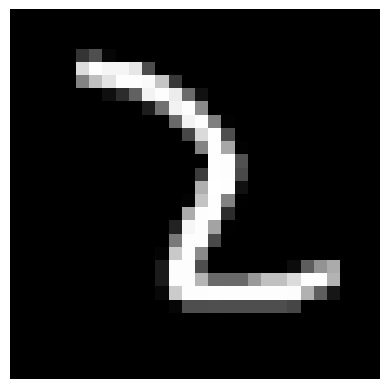

Predicted: 4, Actual: 8


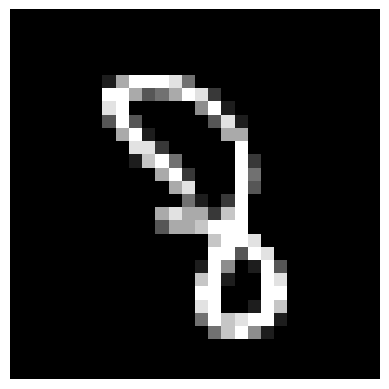

Predicted: 9, Actual: 7


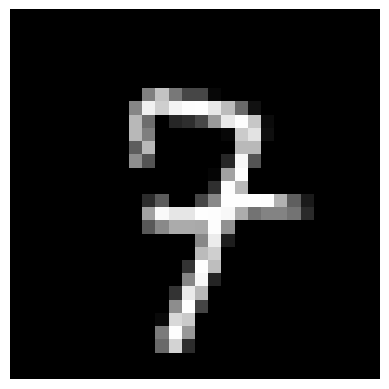

Predicted: 1, Actual: 7


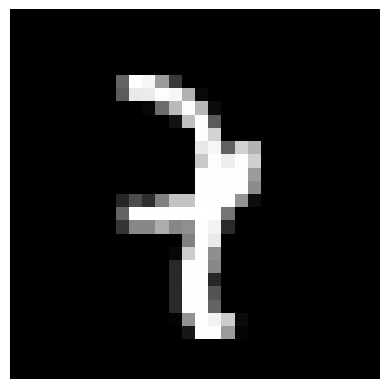

Predicted: 5, Actual: 0


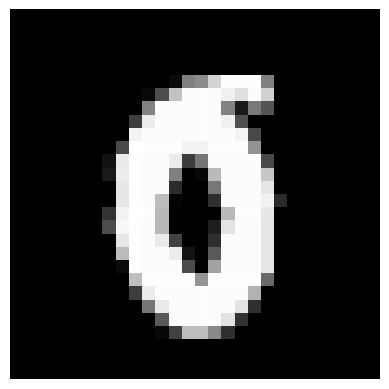

Predicted: 6, Actual: 8


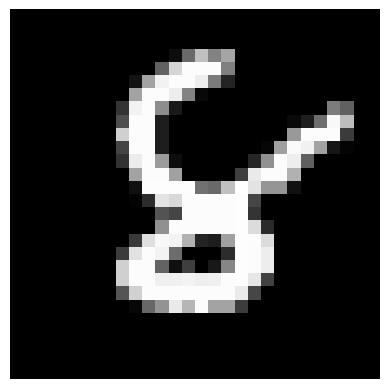

Predicted: 9, Actual: 4


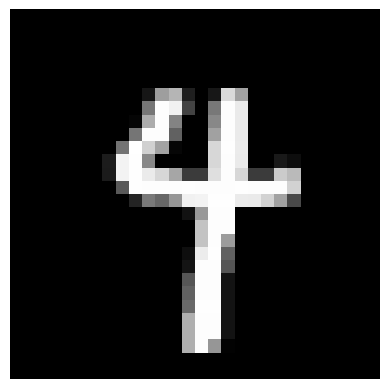

Predicted: 5, Actual: 3


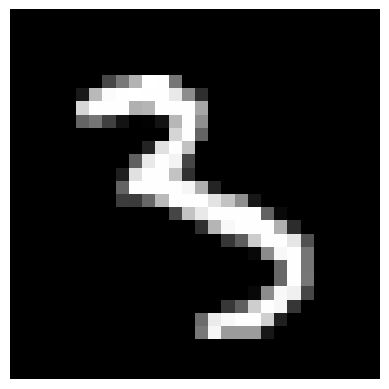

tensor([3, 3, 8, 7, 8, 0, 2, 2, 1, 7, 0, 6, 5, 4, 3, 3, 0, 9, 6, 5, 8, 0, 9, 9,
        6, 8, 6, 8, 5, 9, 3, 6, 0, 2, 4, 0, 2, 8, 3, 1, 9, 7, 5, 8, 0, 8, 4, 6,
        8, 6, 7, 9, 9, 6, 9, 8, 2, 2, 9, 2, 7, 3, 7, 9])
Predicted: 8, Actual: 3


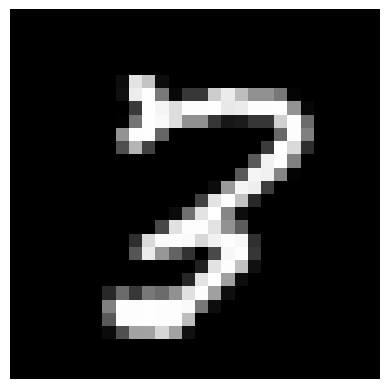

Predicted: 2, Actual: 8


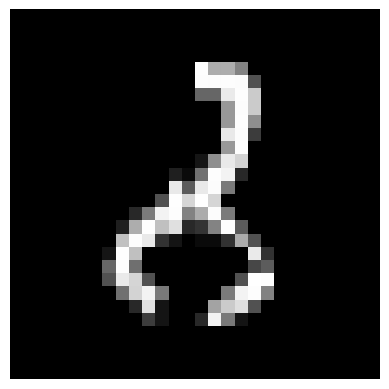

Predicted: 3, Actual: 8


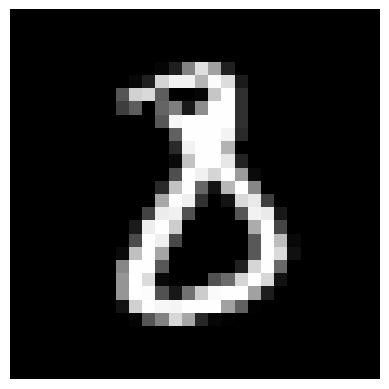

Predicted: 5, Actual: 3


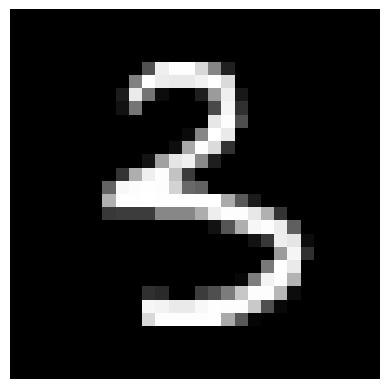

Predicted: 9, Actual: 7


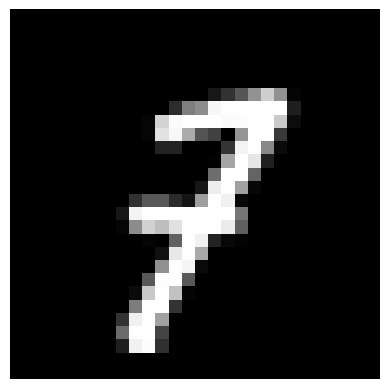

Predicted: 3, Actual: 8


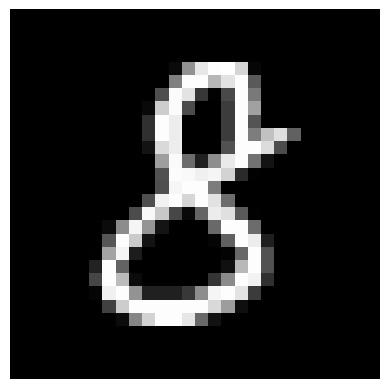

Predicted: 8, Actual: 2


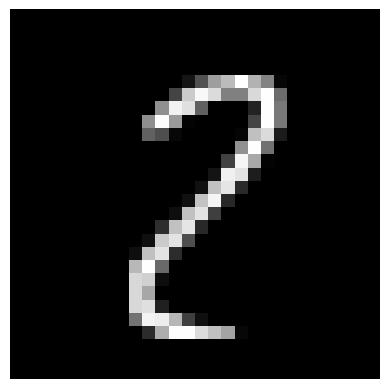

Predicted: 8, Actual: 1


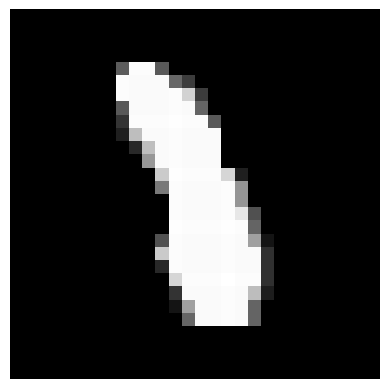

Predicted: 8, Actual: 2


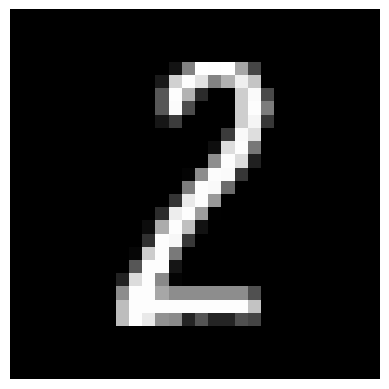

Predicted: 9, Actual: 3


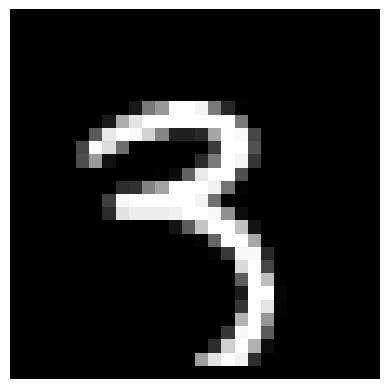

Predicted: 6, Actual: 2


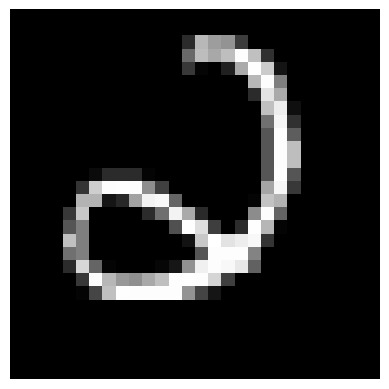

Predicted: 7, Actual: 5


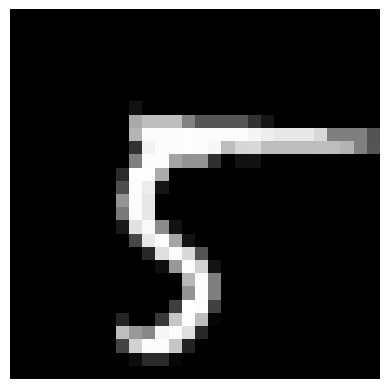

tensor([1, 8, 0, 2, 0, 5, 2, 1, 3, 7, 6, 7, 1, 2, 5, 8, 0, 3, 4, 7, 4, 5, 9, 1,
        8, 6, 7, 1, 4, 3, 4, 9, 1, 9, 5, 1, 7, 3, 9, 7, 6, 9, 1, 3, 2, 8, 3, 3,
        6, 9, 2, 4, 7, 8, 5, 1, 1, 4, 4, 3, 1, 0, 7, 7])
Predicted: 4, Actual: 7


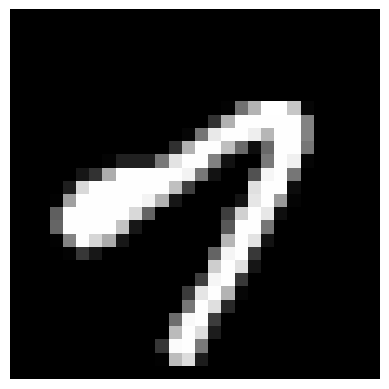

Predicted: 7, Actual: 2


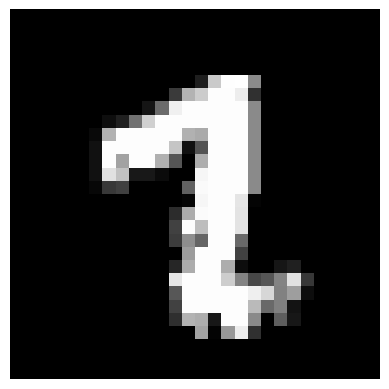

Predicted: 5, Actual: 0


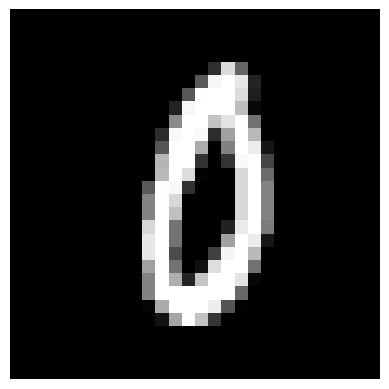

Predicted: 1, Actual: 7


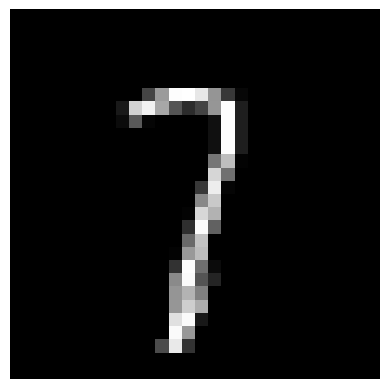

Predicted: 2, Actual: 7


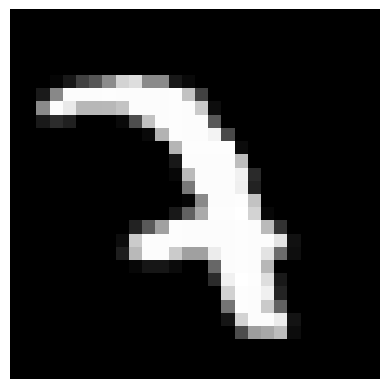

Predicted: 9, Actual: 7


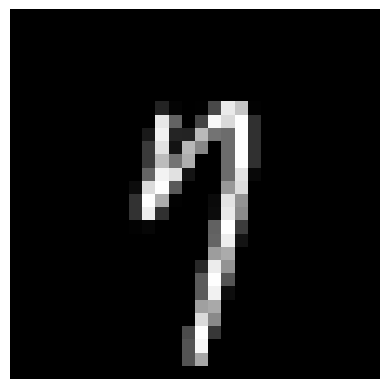

Predicted: 4, Actual: 8


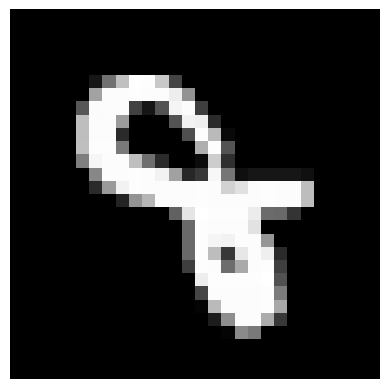

Predicted: 7, Actual: 5


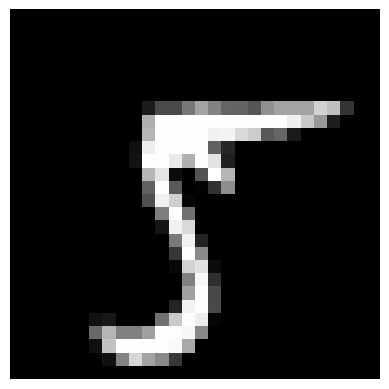

tensor([0, 7, 9, 9, 4, 8, 5, 5, 4, 0, 8, 2, 1, 6, 8, 4, 8, 0, 4, 0, 6, 1, 7, 3,
        8, 6, 7, 2, 6, 9, 3, 1, 4, 6, 8, 5, 9, 8, 0, 6, 2, 1, 7, 3, 4, 1, 0, 5,
        4, 3, 1, 1, 7, 4, 9, 9, 9, 8, 4, 0, 2, 4, 5, 1])
Predicted: 9, Actual: 4


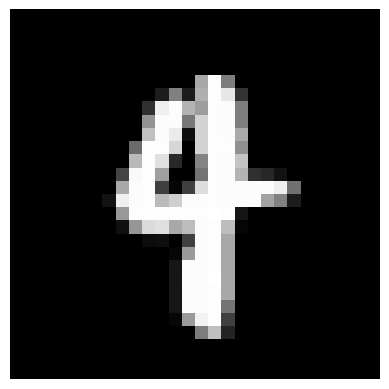

Predicted: 6, Actual: 0


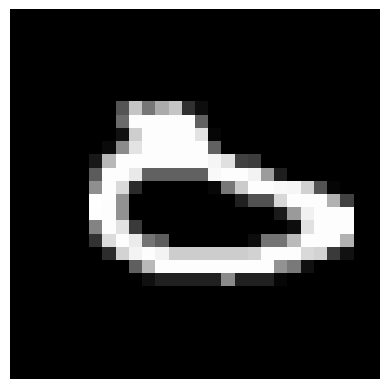

Predicted: 8, Actual: 5


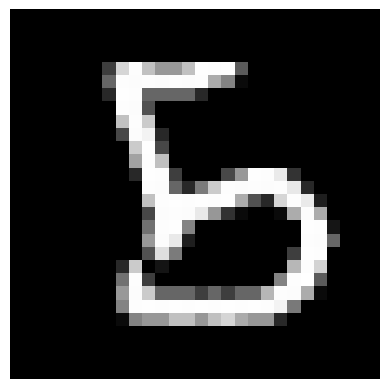

Predicted: 8, Actual: 2


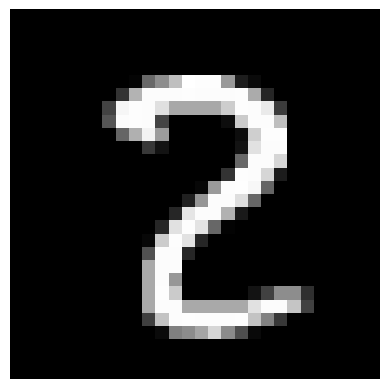

Predicted: 8, Actual: 2


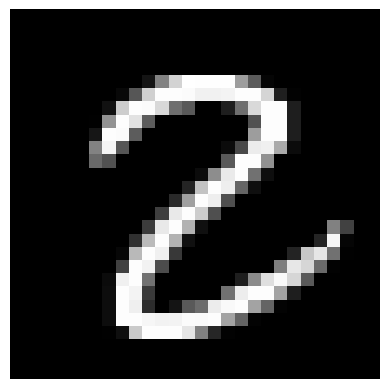

Predicted: 9, Actual: 4


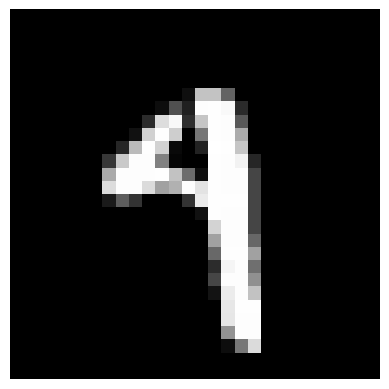

Predicted: 8, Actual: 2


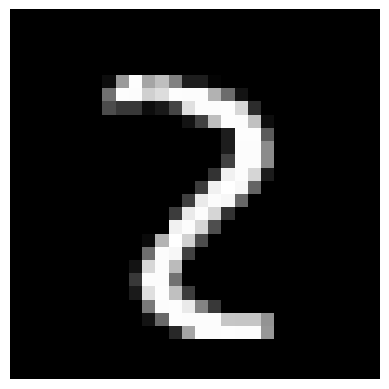

Predicted: 9, Actual: 4


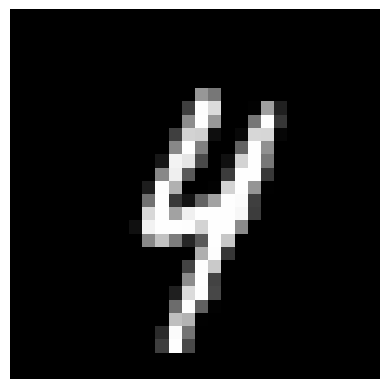

tensor([1, 6, 4, 7, 1, 9, 4, 2, 4, 1, 5, 5, 3, 3, 3, 1, 4, 5, 6, 8, 9, 4, 1, 9,
        3, 8, 0, 3, 2, 5, 1, 2, 5, 3, 4, 4, 0, 8, 8, 3, 3, 1, 7, 3, 5, 9, 6, 3,
        2, 6, 1, 3, 6, 0, 7, 2, 1, 7, 1, 4, 2, 4, 2, 1])
Predicted: 3, Actual: 8


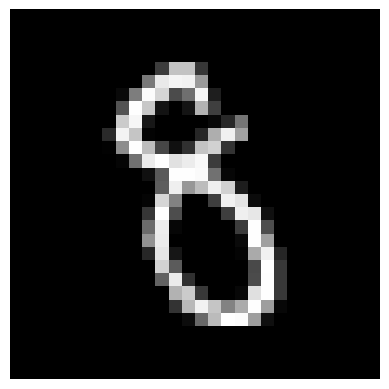

Predicted: 9, Actual: 5


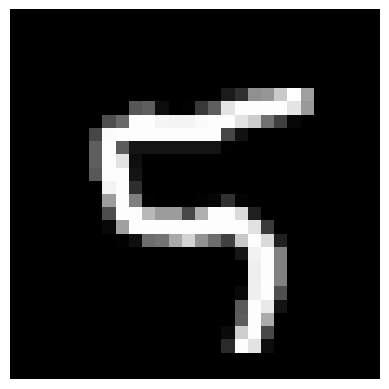

Predicted: 5, Actual: 8


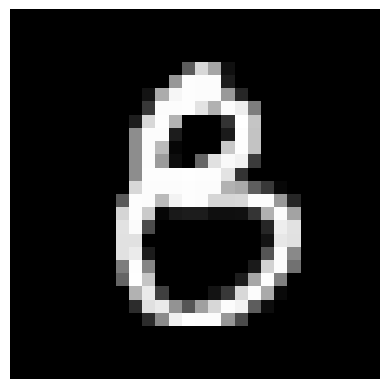

tensor([9, 9, 6, 1, 1, 2, 4, 3, 1, 7, 7, 4, 7, 0, 7, 3, 1, 3, 1, 0, 7, 7, 0, 3,
        5, 3, 2, 7, 6, 6, 9, 2, 8, 3, 5, 2, 2, 5, 6, 0, 8, 2, 9, 2, 8, 2, 8, 8,
        7, 9, 7, 3, 0, 6, 6, 3, 2, 1, 3, 2, 2, 9, 3, 0])
Predicted: 9, Actual: 7


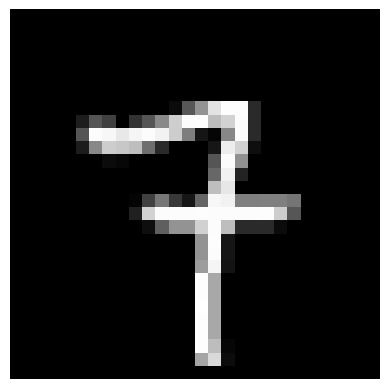

Predicted: 3, Actual: 8


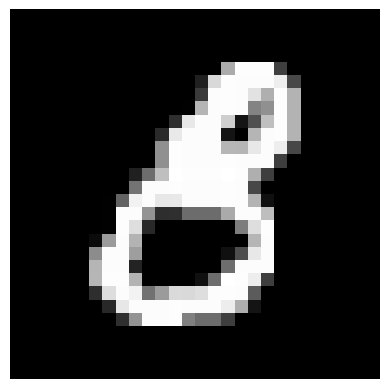

Predicted: 7, Actual: 8


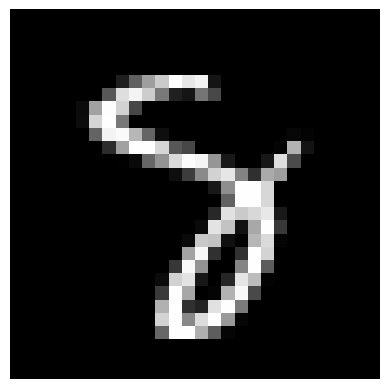

Predicted: 3, Actual: 5


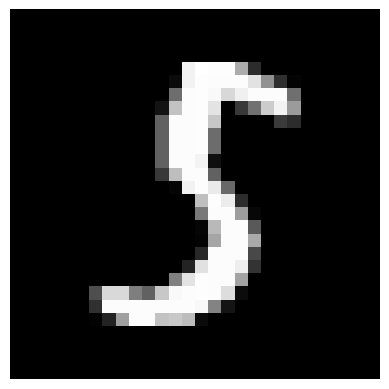

Predicted: 2, Actual: 8


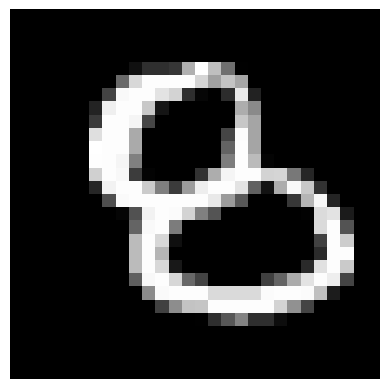

Predicted: 9, Actual: 4


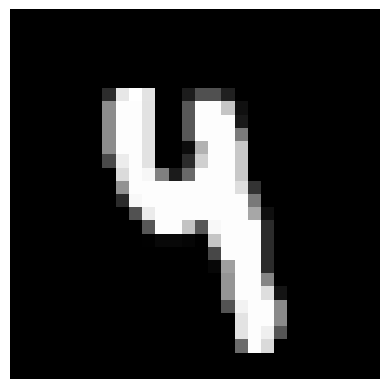

Predicted: 7, Actual: 9


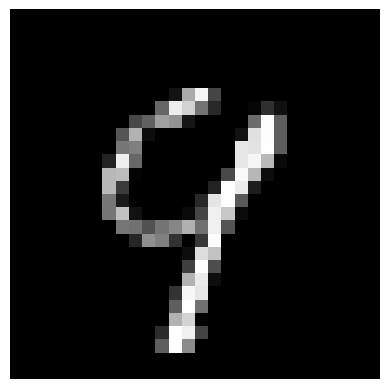

tensor([0, 5, 1, 8, 1, 4, 9, 6, 0, 2, 9, 1, 4, 7, 4, 7, 3, 9, 8, 8, 4, 7, 1, 2,
        1, 2, 2, 3, 7, 3, 2, 3, 9, 1, 1, 4, 0, 3, 5, 5, 8, 6, 5, 0, 6, 7, 6, 6,
        8, 2, 7, 9, 1, 1, 2, 5, 6, 4, 9, 5, 6, 3, 3, 5])
Predicted: 1, Actual: 7


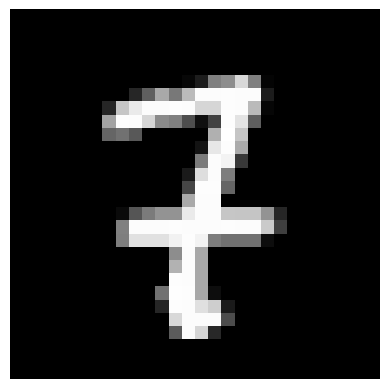

Predicted: 9, Actual: 4


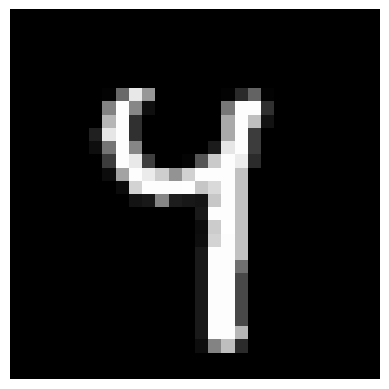

Predicted: 7, Actual: 2


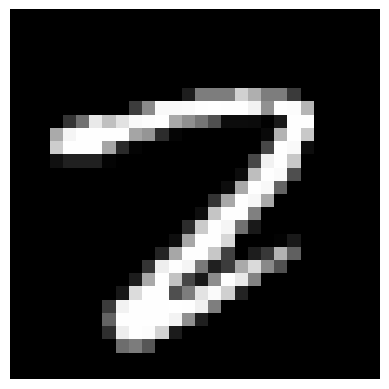

Predicted: 1, Actual: 7


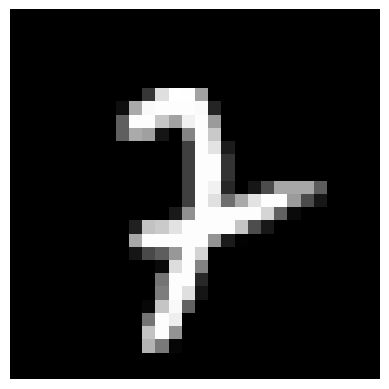

Predicted: 5, Actual: 3


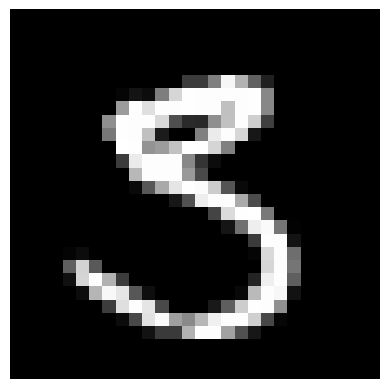

Predicted: 0, Actual: 2


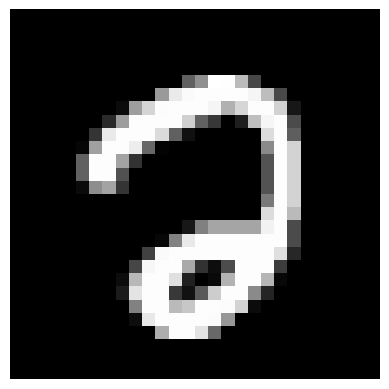

Predicted: 8, Actual: 3


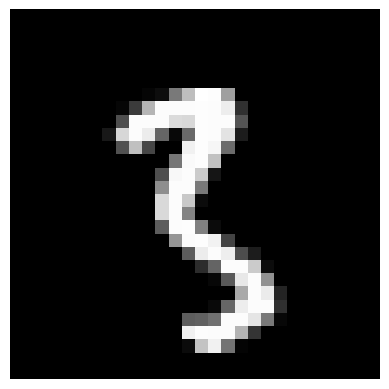

Predicted: 9, Actual: 8


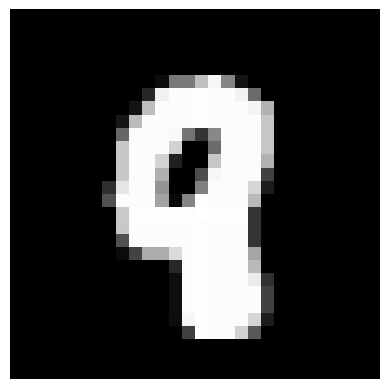

Predicted: 2, Actual: 7


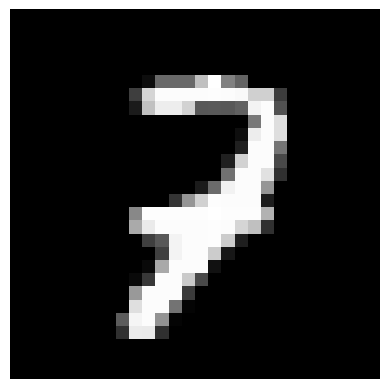

Predicted: 6, Actual: 1


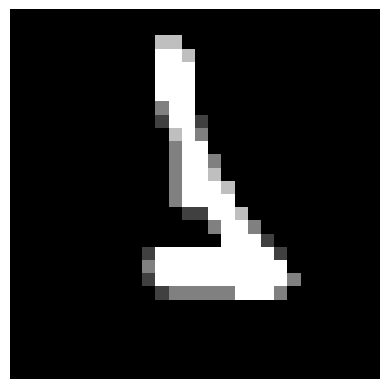

Predicted: 5, Actual: 4


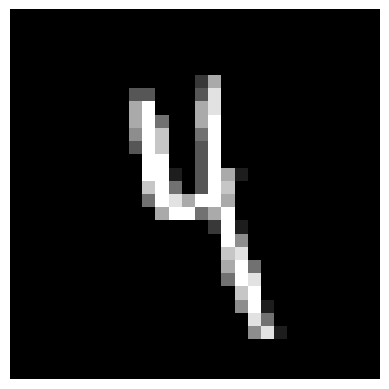

tensor([7, 8, 9, 1, 1, 0, 9, 1, 4, 4, 5, 4, 0, 6, 2, 2, 3, 1, 5, 1, 2, 0, 8, 8,
        1, 2, 6, 7, 1, 6, 2, 3, 9, 0, 1, 2, 2, 0, 9, 9, 7, 0, 2, 3, 1, 9, 7, 8,
        1, 0, 4, 1, 9, 9, 0, 9, 2, 6, 8, 1, 3, 7, 5, 4])
Predicted: 0, Actual: 6


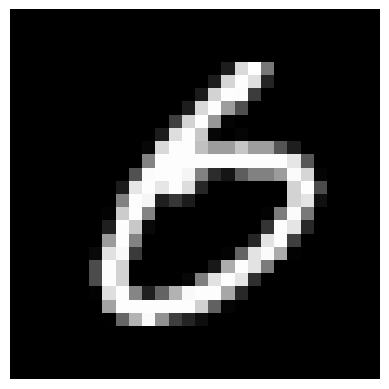

Predicted: 8, Actual: 3


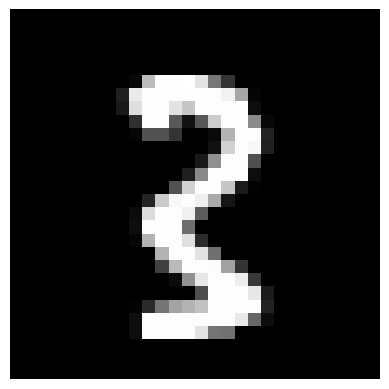

Predicted: 9, Actual: 8


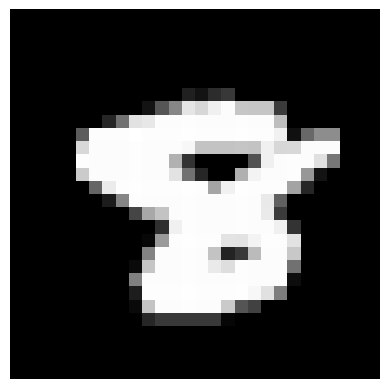

Predicted: 7, Actual: 9


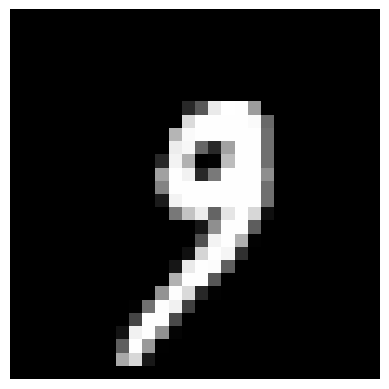

Predicted: 3, Actual: 5


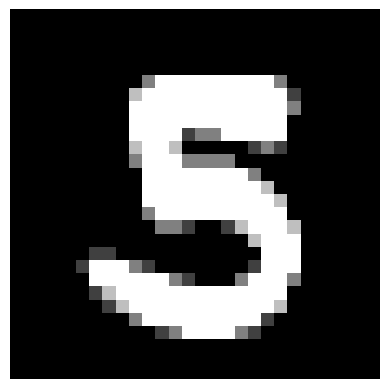

Predicted: 9, Actual: 7


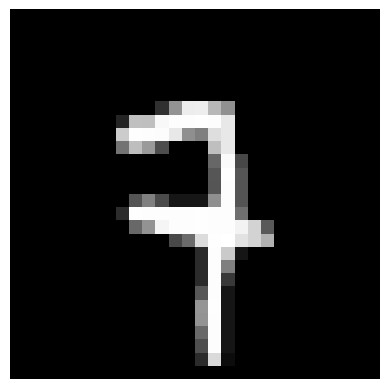

Predicted: 0, Actual: 6


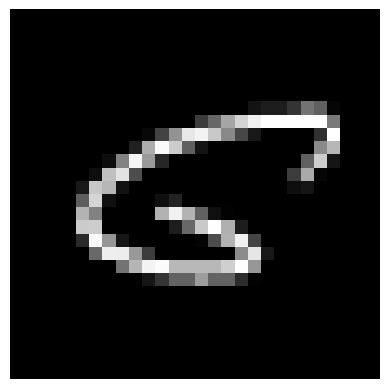

Predicted: 9, Actual: 4


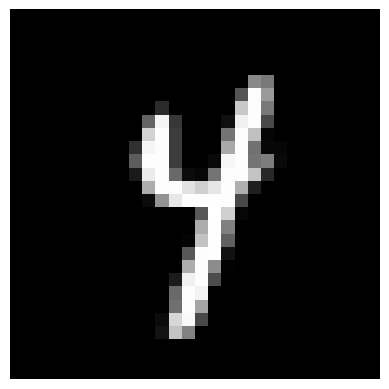

tensor([4, 1, 8, 1, 3, 8, 1, 2, 8, 8, 0, 6, 2, 1, 1, 9, 1, 5, 3, 4, 8, 9, 5, 0,
        9, 2, 6, 4, 8, 2, 1, 7, 2, 4, 9, 4, 4, 0, 9, 9, 2, 2, 3, 3, 4, 3, 5, 7,
        3, 5, 8, 1, 2, 4, 4, 6, 4, 9, 3, 1, 0, 6, 9, 5])
Predicted: 8, Actual: 5


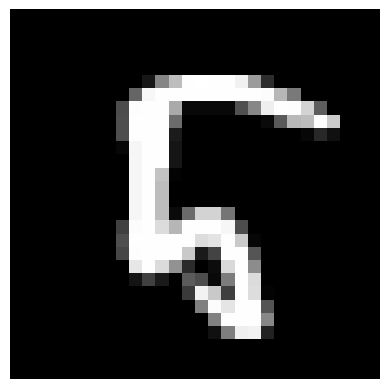

Predicted: 9, Actual: 7


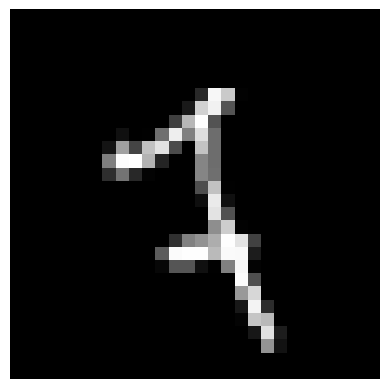

Predicted: 8, Actual: 6


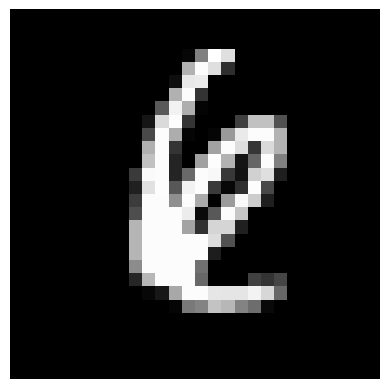

Predicted: 6, Actual: 2


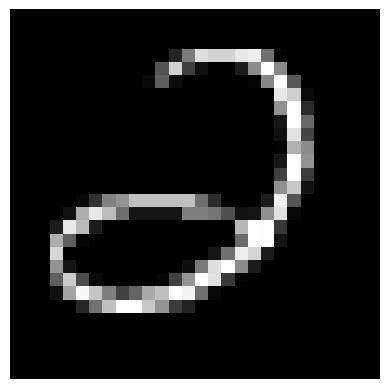

Predicted: 9, Actual: 3


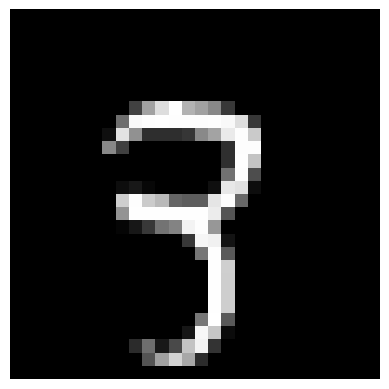

Predicted: 4, Actual: 8


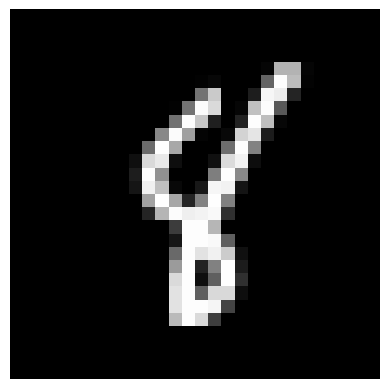

Predicted: 3, Actual: 5


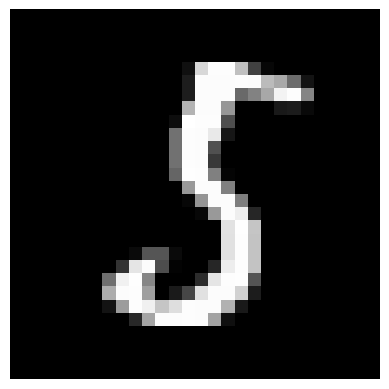

tensor([9, 5, 9, 2, 3, 8, 0, 3, 0, 1, 3, 6, 7, 2, 5, 9, 7, 9, 6, 3, 6, 3, 7, 4,
        6, 5, 8, 5, 4, 8, 8, 2, 8, 0, 7, 6, 8, 9, 7, 3, 7, 1, 9, 5, 2, 7, 3, 5,
        1, 1, 2, 1, 4, 7, 4, 7, 5, 4, 5, 4, 0, 8, 3, 6])
Predicted: 2, Actual: 7


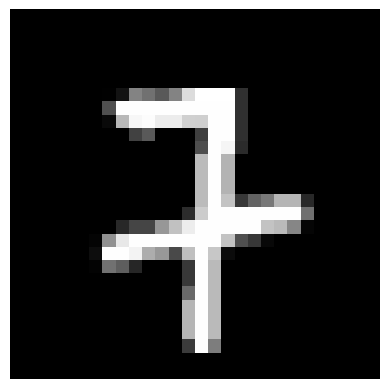

Predicted: 0, Actual: 7


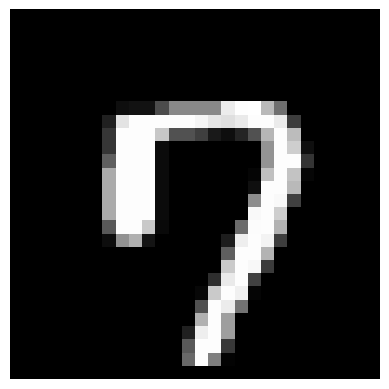

Predicted: 2, Actual: 8


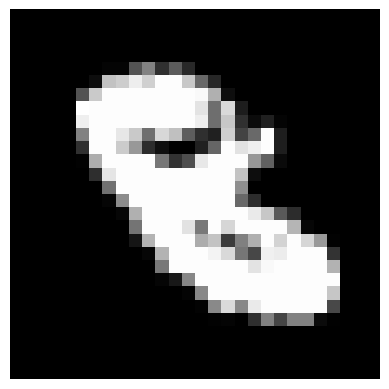

Predicted: 3, Actual: 9


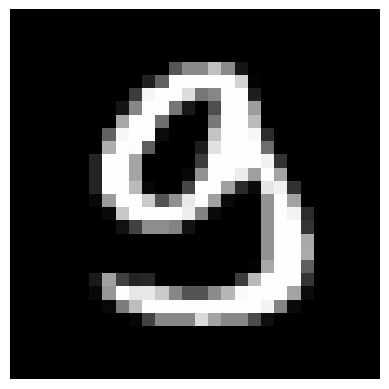

Predicted: 6, Actual: 4


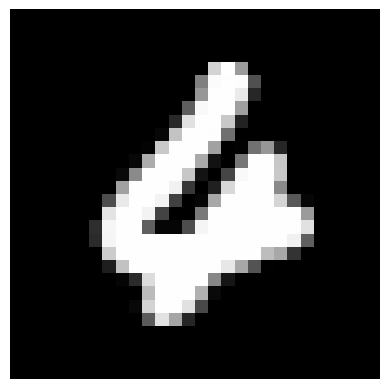

Predicted: 8, Actual: 3


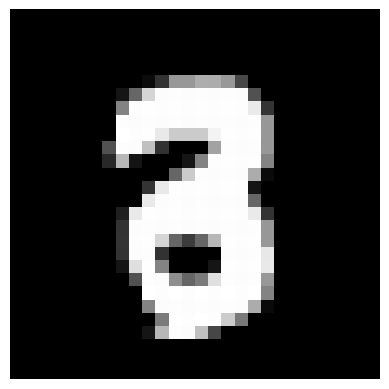

Predicted: 8, Actual: 7


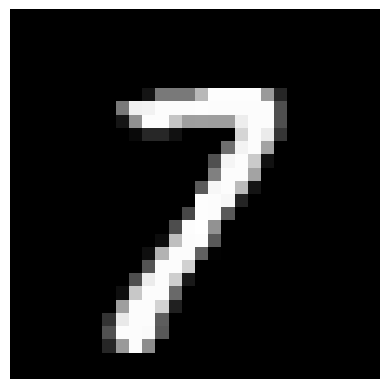

Predicted: 2, Actual: 7


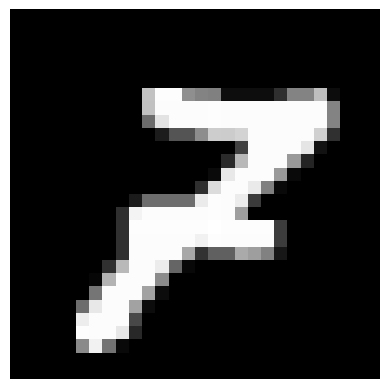

Predicted: 9, Actual: 8


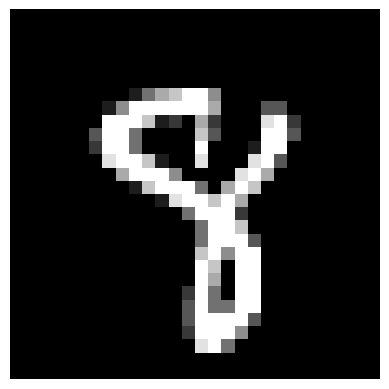

Predicted: 7, Actual: 3


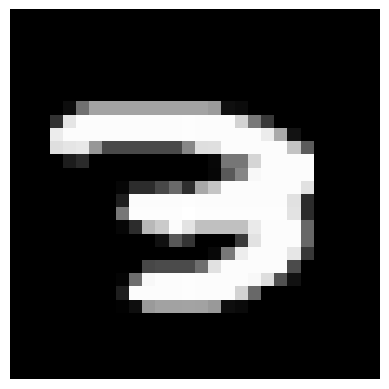

tensor([9, 5, 0, 2, 7, 4, 4, 4, 4, 6, 6, 4, 7, 9, 3, 4, 5, 5, 8, 7, 3, 9, 2, 7,
        0, 2, 4, 1, 1, 1, 6, 9, 2, 8, 7, 2, 0, 1, 5, 6, 4, 1, 9, 0, 6, 0, 4, 6,
        5, 1, 5, 0, 9, 3, 2, 2, 5, 6, 2, 1, 6, 1, 1, 3])
Predicted: 5, Actual: 6


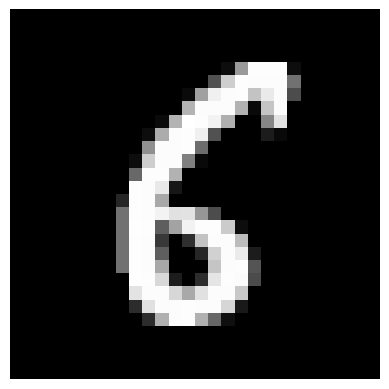

Predicted: 9, Actual: 7


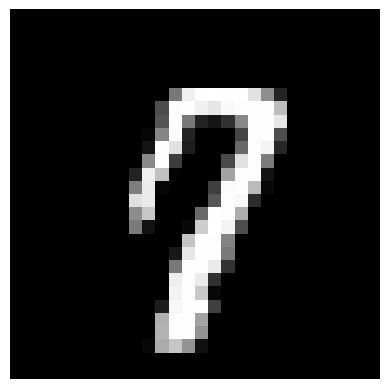

Predicted: 1, Actual: 6


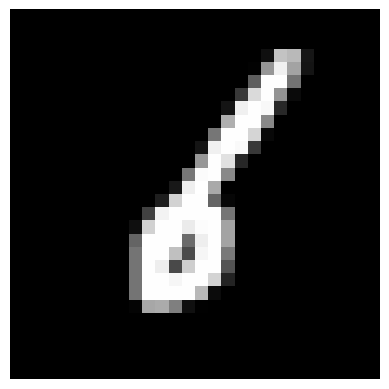

Predicted: 6, Actual: 0


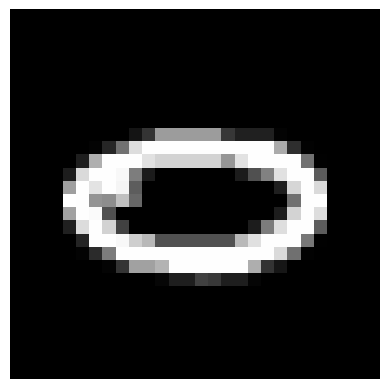

Predicted: 4, Actual: 9


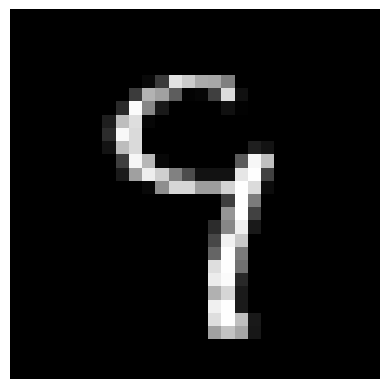

Predicted: 9, Actual: 7


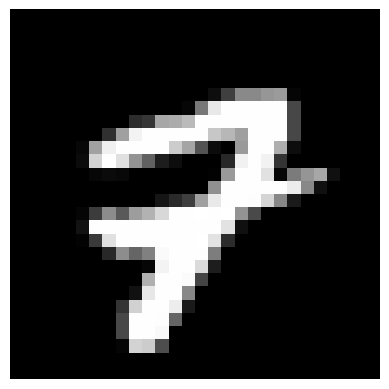

Predicted: 4, Actual: 8


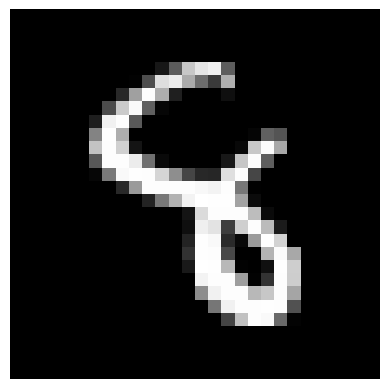

Predicted: 5, Actual: 8


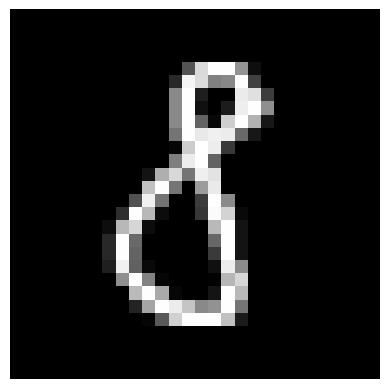

Predicted: 5, Actual: 8


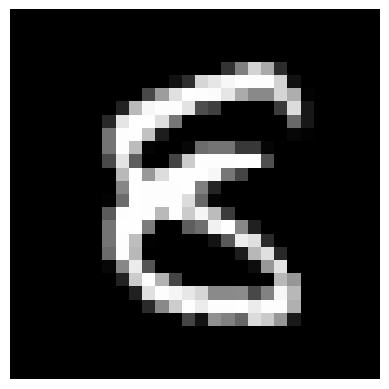

Predicted: 9, Actual: 3


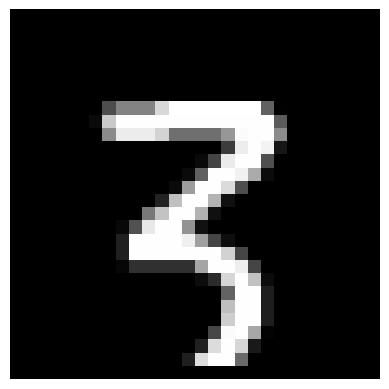

Predicted: 2, Actual: 7


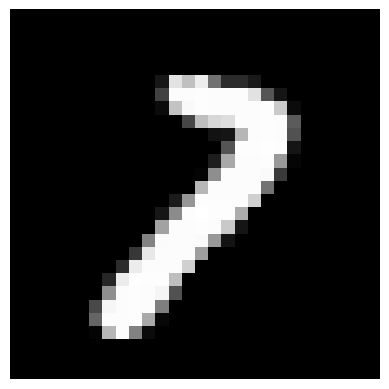

Predicted: 5, Actual: 3


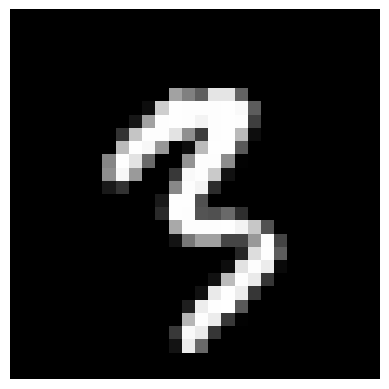

tensor([7, 7, 0, 3, 0, 5, 4, 0, 6, 8, 2, 2, 3, 8, 4, 0, 8, 6, 5, 5, 1, 2, 1, 3,
        1, 7, 9, 5, 7, 2, 0, 0, 5, 8, 6, 6, 5, 4, 1, 9, 3, 1, 5, 8, 1, 0, 2, 4,
        4, 3, 6, 8, 8, 6, 9, 0, 4, 0, 4, 4, 7, 9, 3, 4])
Predicted: 7, Actual: 9


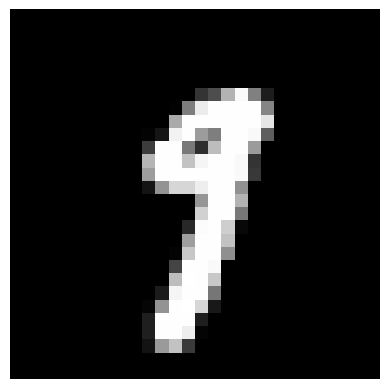

Predicted: 3, Actual: 8


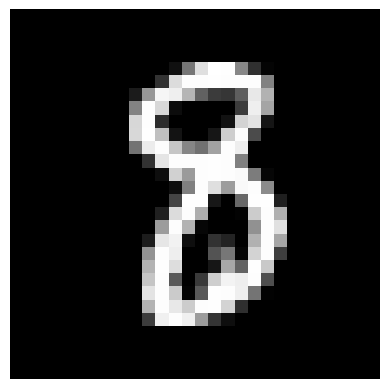

Predicted: 6, Actual: 2


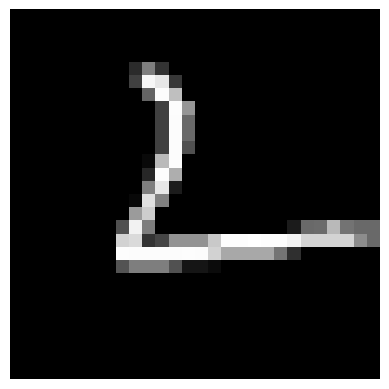

Predicted: 2, Actual: 7


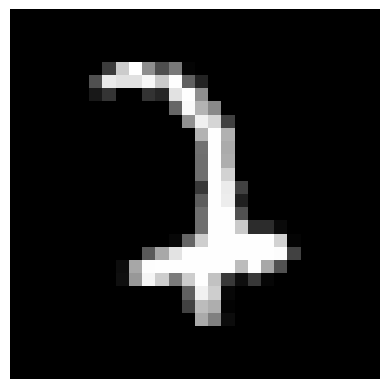

Predicted: 3, Actual: 9


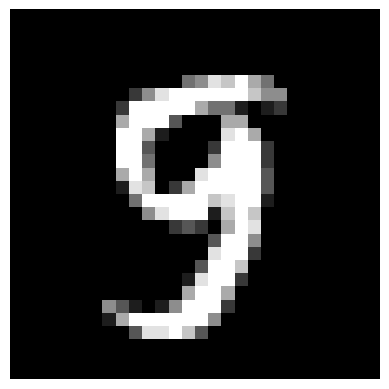

Predicted: 8, Actual: 9


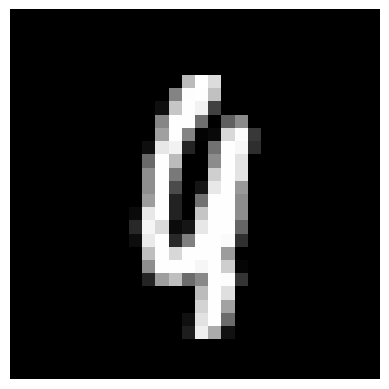

Predicted: 6, Actual: 5


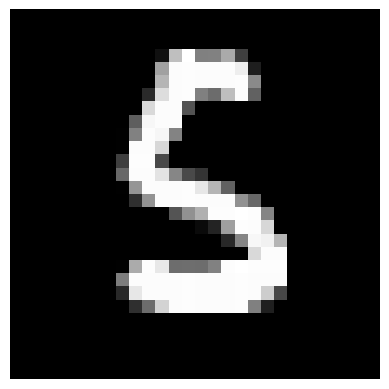

Predicted: 5, Actual: 8


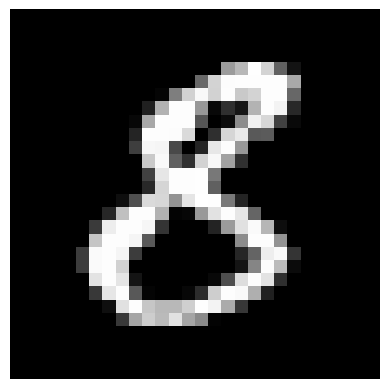

Predicted: 9, Actual: 4


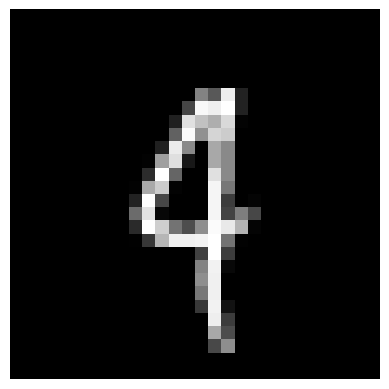

Predicted: 0, Actual: 9


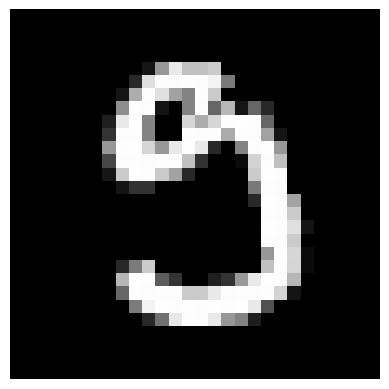

Predicted: 5, Actual: 8


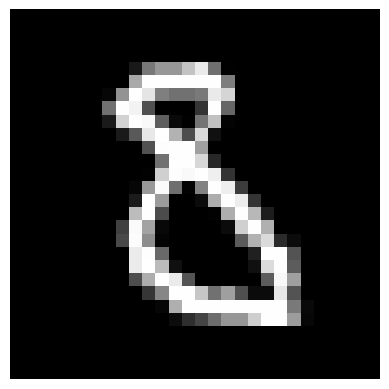

Predicted: 6, Actual: 2


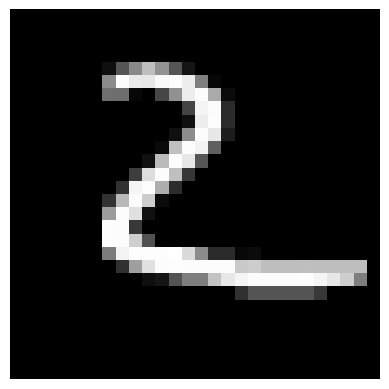

Predicted: 3, Actual: 2


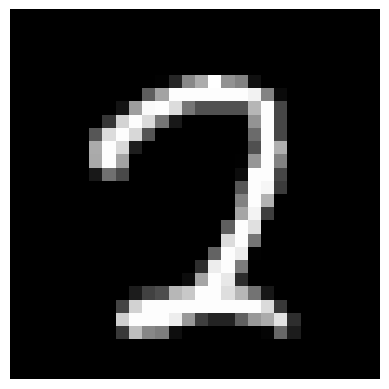

Predicted: 1, Actual: 7


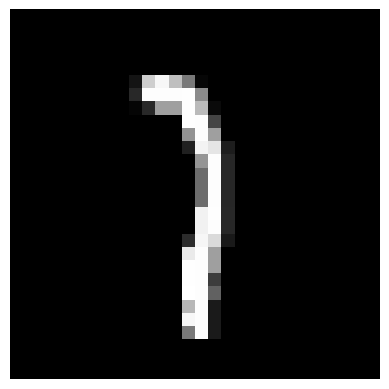

Predicted: 6, Actual: 2


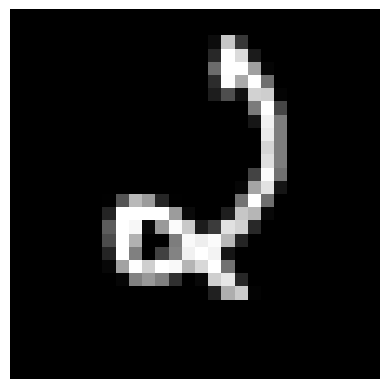

Predicted: 9, Actual: 4


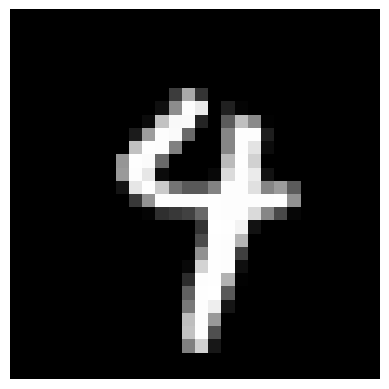

Predicted: 4, Actual: 5


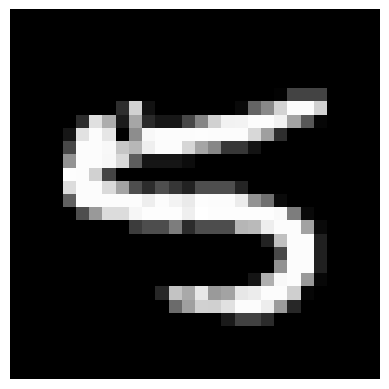

tensor([1, 5, 9, 2, 3, 5, 8, 8, 0, 4, 3, 5, 6, 6, 0, 1, 6, 0, 3, 7, 4, 4, 1, 2,
        9, 1, 4, 6, 2, 9, 3, 9, 8, 4, 4, 5, 1, 3, 1, 5, 8, 7, 9, 4, 8, 6, 2, 9,
        9, 1, 4, 5, 6, 0, 5, 2, 2, 6, 1, 3, 5, 2, 4, 9])
Predicted: 2, Actual: 7


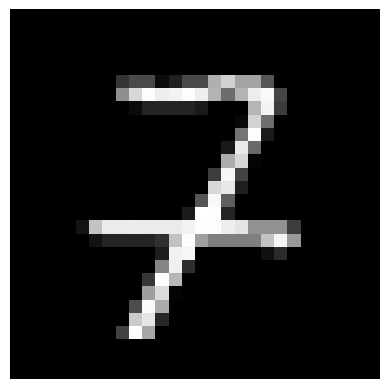

Predicted: 4, Actual: 5


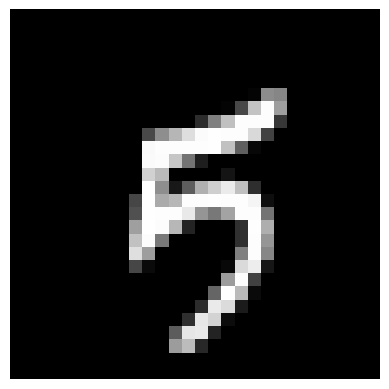

Predicted: 5, Actual: 3


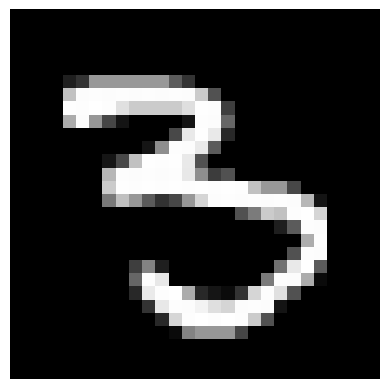

Predicted: 7, Actual: 5


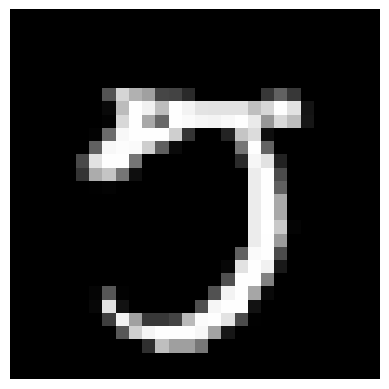

Predicted: 2, Actual: 9


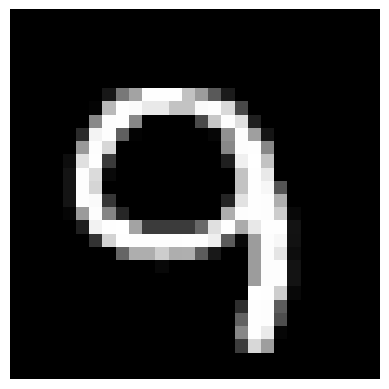

Predicted: 5, Actual: 3


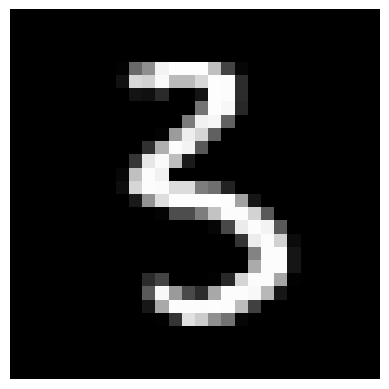

Predicted: 5, Actual: 8


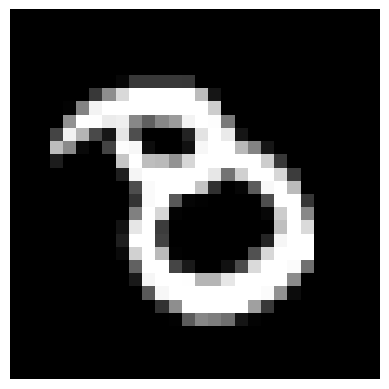

Predicted: 6, Actual: 8


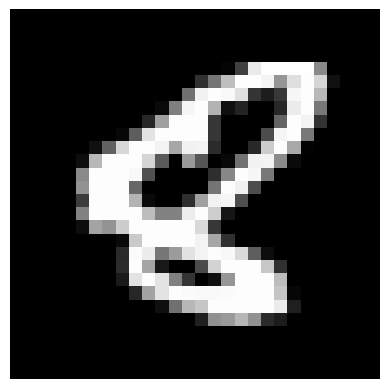

Predicted: 2, Actual: 7


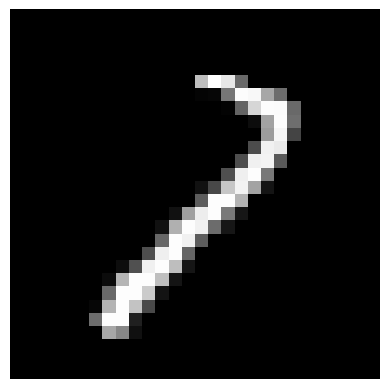

Predicted: 9, Actual: 7


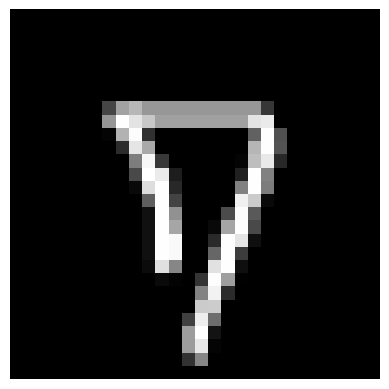

Predicted: 6, Actual: 2


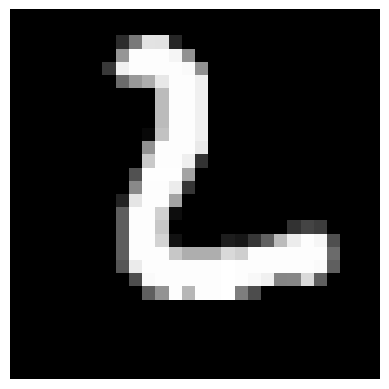

Predicted: 3, Actual: 5


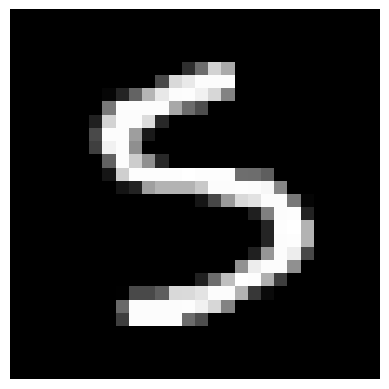

tensor([6, 6, 7, 9, 2, 2, 1, 1, 2, 8, 3, 7, 2, 4, 1, 7, 1, 7, 6, 7, 8, 2, 7, 3,
        1, 7, 5, 8, 2, 6, 2, 8, 5, 6, 8, 0, 9, 2, 4, 3, 9, 9, 7, 6, 6, 8, 0, 4,
        1, 3, 3, 2, 9, 1, 8, 0, 6, 7, 2, 1, 5, 5, 5, 2])
Predicted: 6, Actual: 2


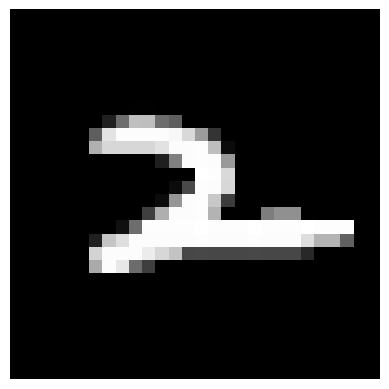

Predicted: 9, Actual: 7


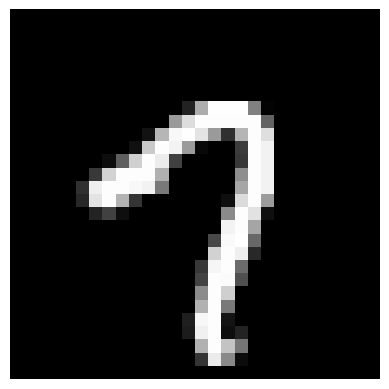

Predicted: 8, Actual: 2


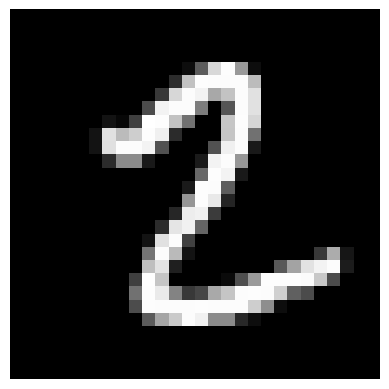

Predicted: 8, Actual: 5


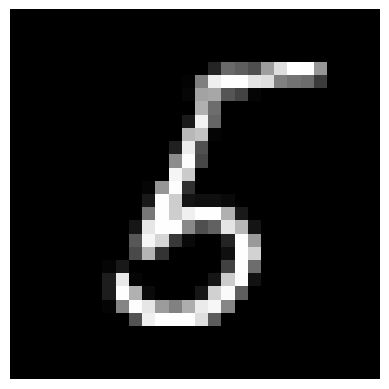

Predicted: 9, Actual: 3


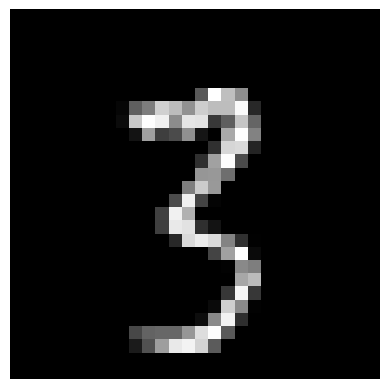

Predicted: 3, Actual: 5


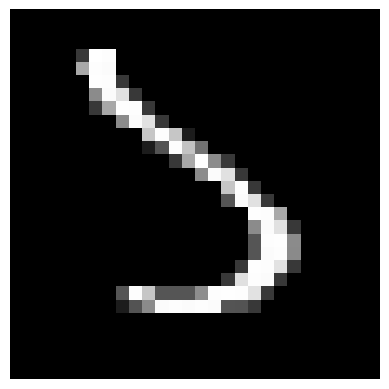

Predicted: 3, Actual: 8


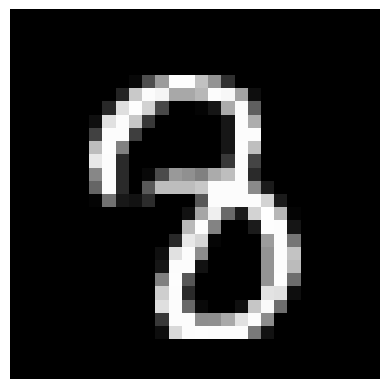

Predicted: 5, Actual: 0


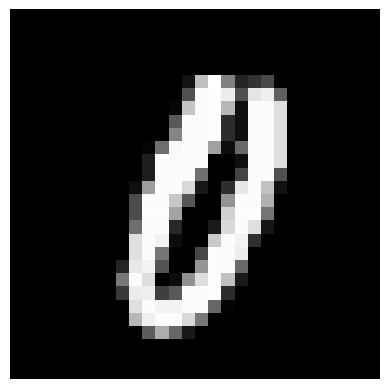

tensor([0, 1, 6, 0, 2, 4, 9, 8, 0, 9, 9, 4, 6, 5, 4, 9, 1, 8, 3, 4, 9, 4, 1, 2,
        2, 3, 1, 9, 6, 4, 0, 9, 4, 8, 3, 8, 0, 0, 2, 5, 1, 9, 6, 2, 9, 9, 0, 9,
        6, 0, 6, 2, 5, 4, 2, 7, 8, 1, 3, 9, 0, 3, 8, 5])
Predicted: 1, Actual: 2


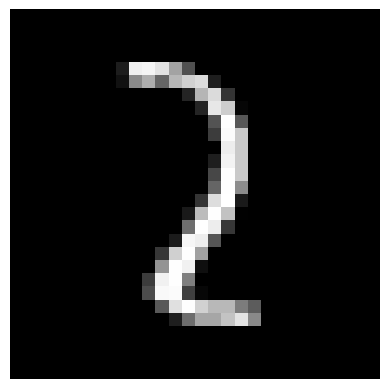

Predicted: 6, Actual: 2


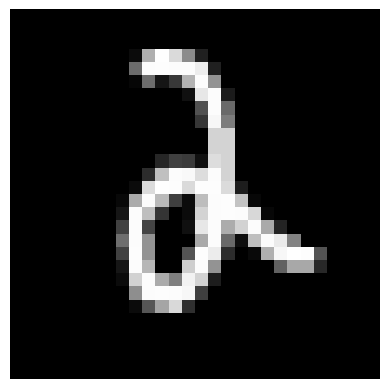

Predicted: 4, Actual: 9


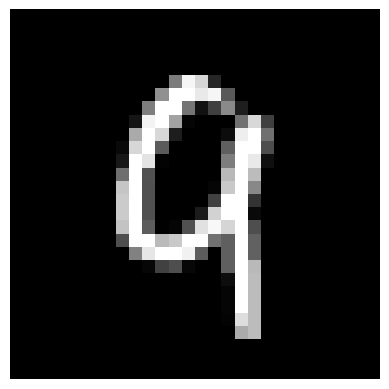

Predicted: 3, Actual: 8


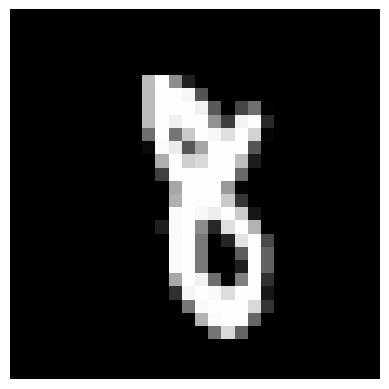

Predicted: 0, Actual: 6


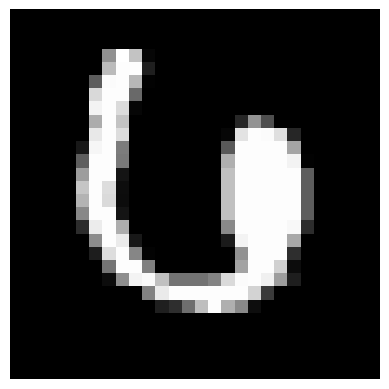

Predicted: 9, Actual: 4


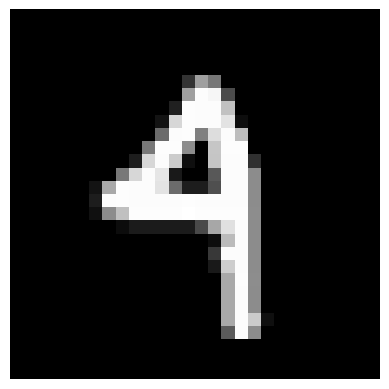

Predicted: 7, Actual: 3


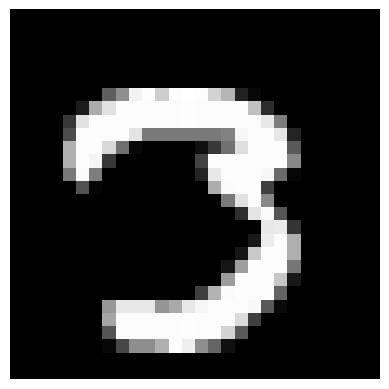

Predicted: 1, Actual: 4


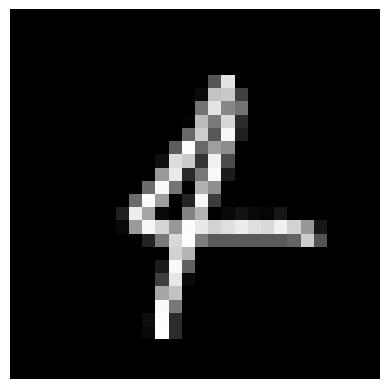

Predicted: 3, Actual: 5


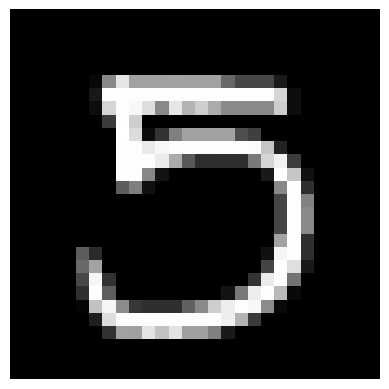

Predicted: 9, Actual: 5


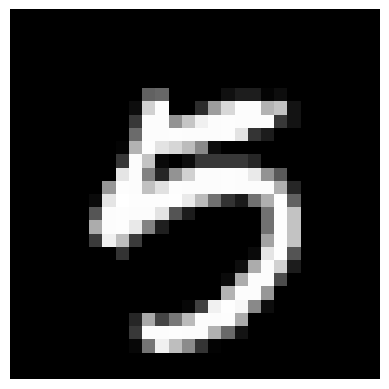

tensor([3, 5, 8, 6, 0, 7, 6, 3, 3, 9, 6, 1, 1, 2, 9, 0, 4, 3, 3, 6, 9, 5, 9, 3,
        7, 7, 7, 8, 1, 9, 8, 3, 0, 7, 2, 7, 9, 4, 5, 4, 9, 3, 8, 1, 4, 0, 2, 3,
        7, 5, 9, 8, 8, 0, 0, 6, 1, 4, 7, 3, 9, 0, 0, 0])
Predicted: 0, Actual: 5


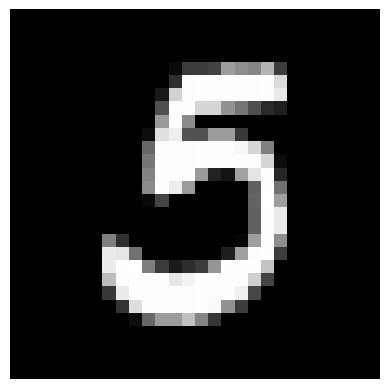

Predicted: 9, Actual: 7


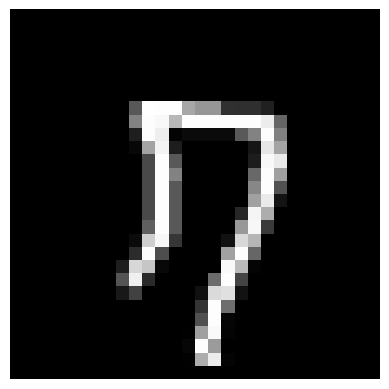

Predicted: 1, Actual: 7


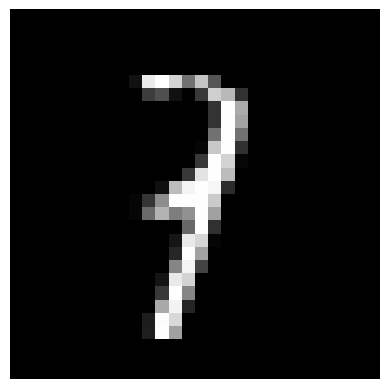

Predicted: 8, Actual: 2


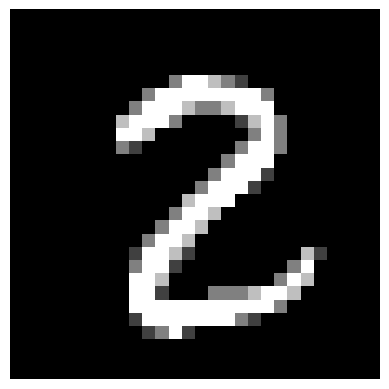

Predicted: 9, Actual: 7


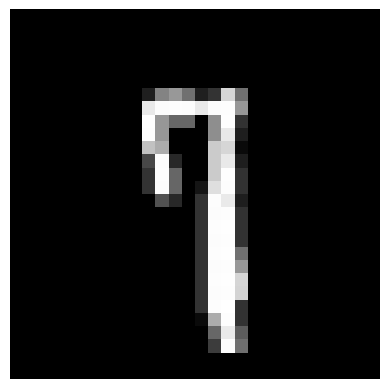

Predicted: 0, Actual: 5


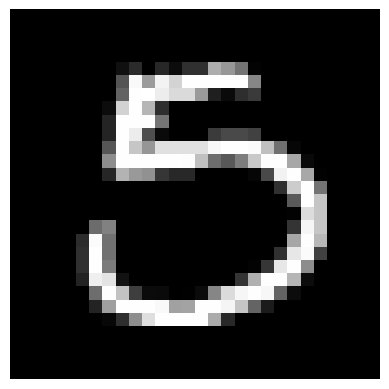

Predicted: 6, Actual: 1


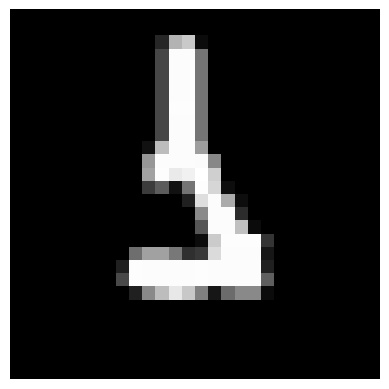

Predicted: 7, Actual: 8


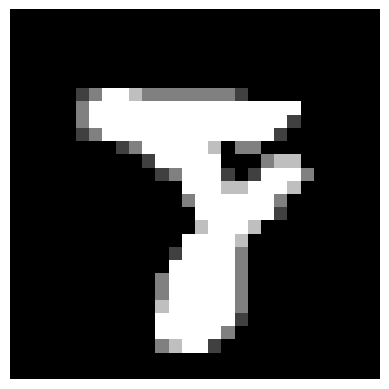

tensor([6, 6, 2, 3, 7, 8, 4, 7, 7, 9, 2, 4, 1, 6, 5, 2, 4, 3, 9, 1, 9, 4, 0, 3,
        8, 4, 8, 7, 7, 0, 7, 8, 8, 4, 0, 9, 8, 8, 2, 4, 7, 6, 6, 6, 4, 9, 1, 8,
        8, 2, 3, 5, 3, 0, 0, 3, 7, 6, 9, 7, 9, 9, 5, 4])
Predicted: 6, Actual: 4


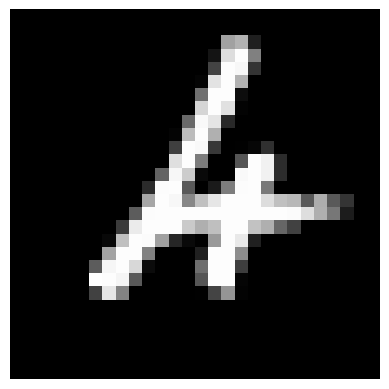

Predicted: 3, Actual: 9


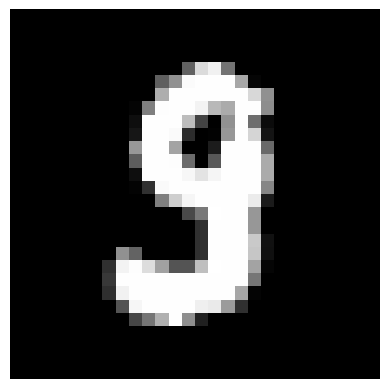

Predicted: 9, Actual: 8


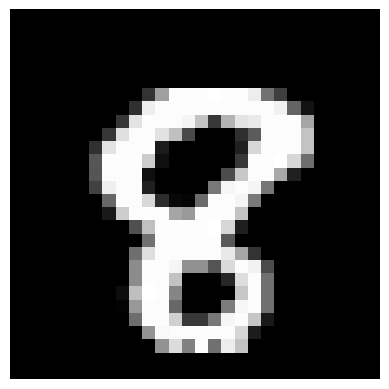

Predicted: 3, Actual: 9


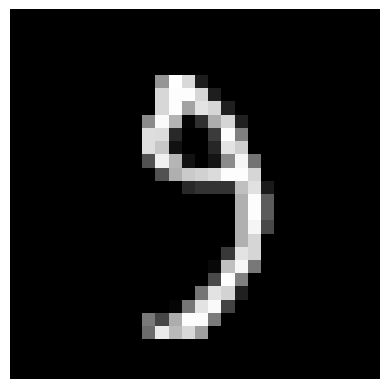

Predicted: 4, Actual: 6


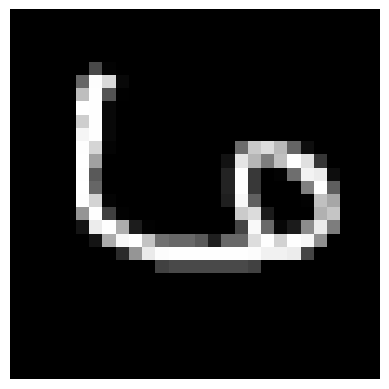

Predicted: 9, Actual: 4


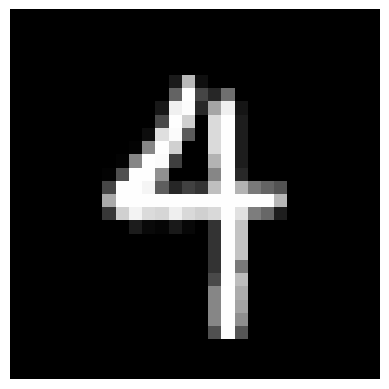

Predicted: 9, Actual: 7


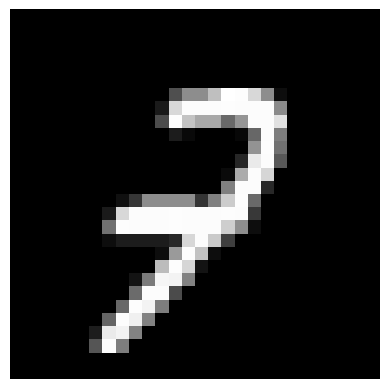

Predicted: 5, Actual: 6


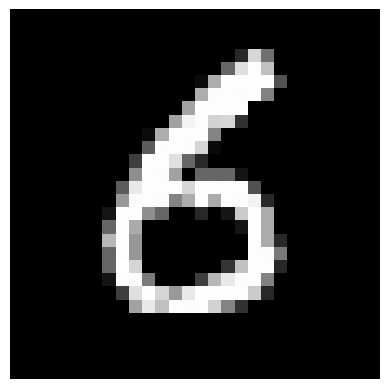

tensor([3, 7, 6, 1, 2, 3, 7, 3, 3, 6, 0, 3, 3, 8, 4, 3, 6, 3, 5, 0, 2, 0, 9, 0,
        7, 4, 5, 9, 3, 5, 1, 9, 6, 1, 7, 5, 4, 5, 0, 5, 4, 0, 2, 1, 2, 9, 1, 9,
        9, 4, 0, 8, 4, 5, 2, 9, 2, 1, 2, 1, 7, 3, 6, 8])
Predicted: 7, Actual: 3


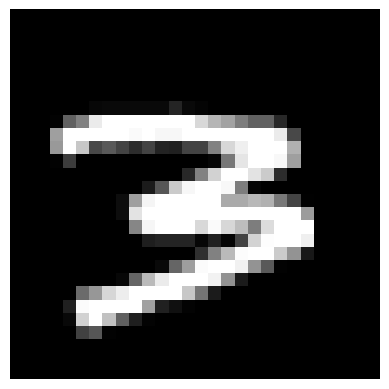

Predicted: 6, Actual: 2


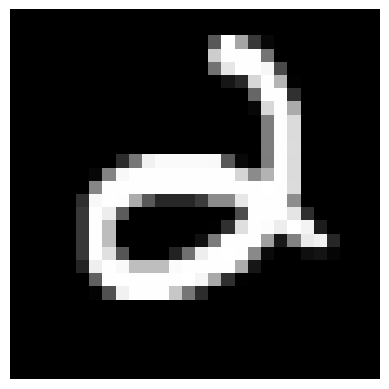

Predicted: 5, Actual: 6


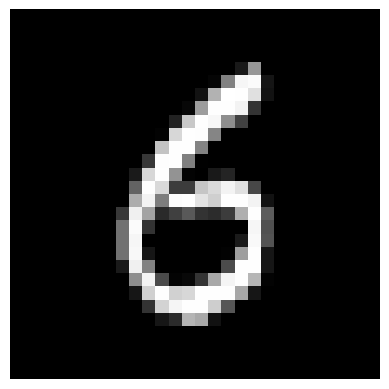

Predicted: 7, Actual: 4


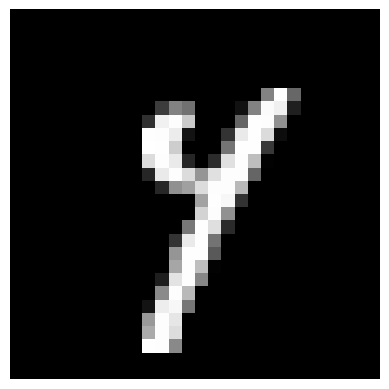

Predicted: 4, Actual: 9


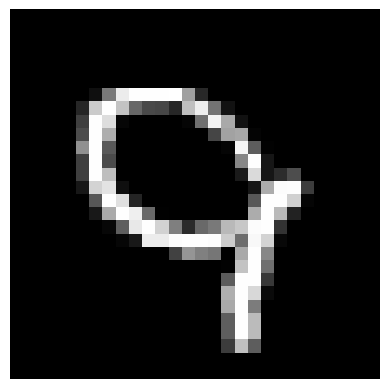

Predicted: 0, Actual: 5


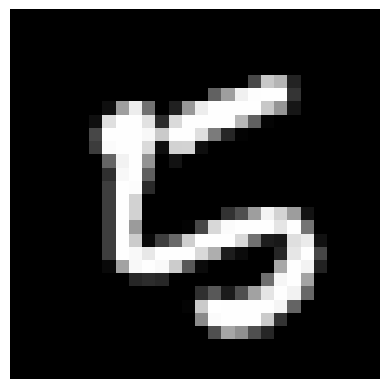

tensor([8, 4, 9, 1, 9, 8, 5, 7, 5, 1, 1, 8, 6, 5, 3, 4, 4, 7, 2, 3, 5, 6, 5, 8,
        6, 2, 3, 1, 0, 5, 8, 7, 9, 9, 6, 7, 0, 4, 8, 7, 1, 7, 4, 1, 0, 5, 7, 2,
        0, 0, 9, 1, 1, 0, 4, 8, 4, 7, 4, 0, 4, 6, 0, 7])
Predicted: 3, Actual: 2


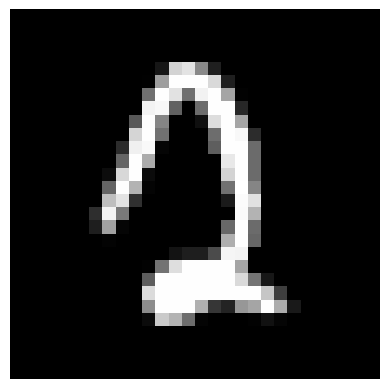

Predicted: 7, Actual: 3


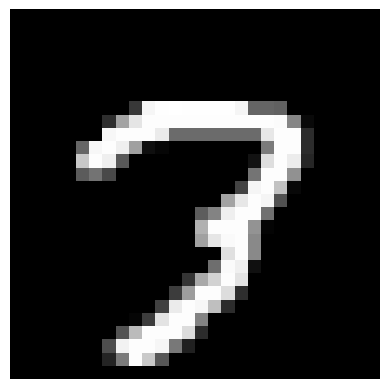

Predicted: 5, Actual: 8


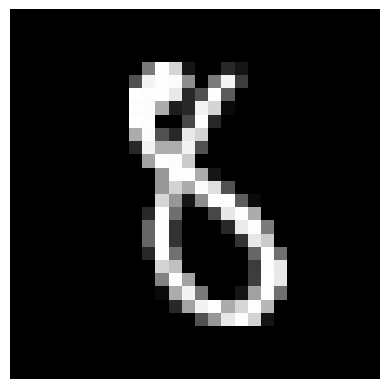

Predicted: 7, Actual: 9


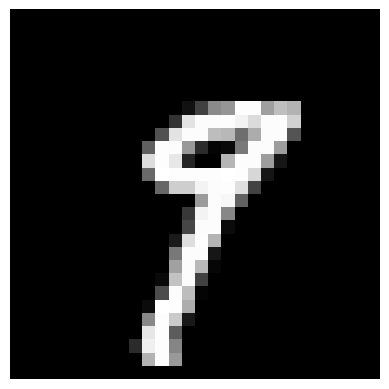

Predicted: 9, Actual: 2


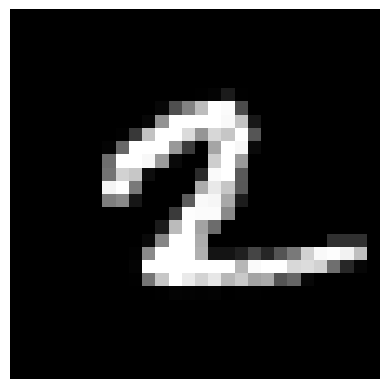

Predicted: 5, Actual: 9


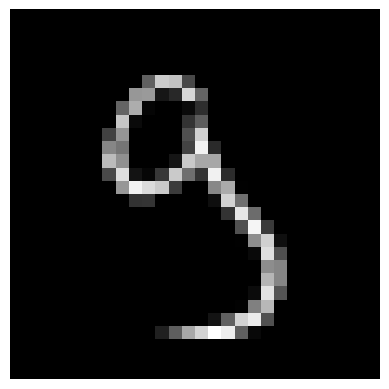

Predicted: 1, Actual: 7


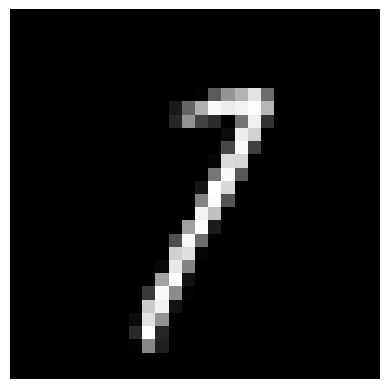

Predicted: 0, Actual: 8


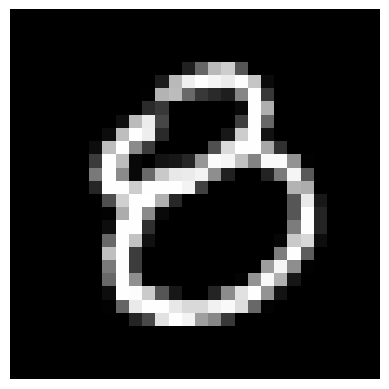

Predicted: 4, Actual: 7


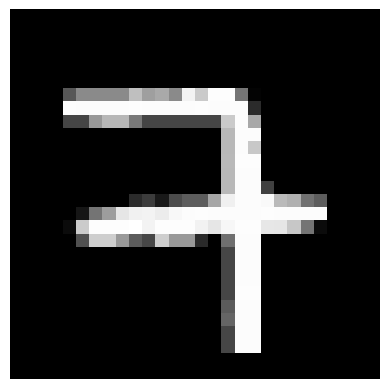

Predicted: 4, Actual: 2


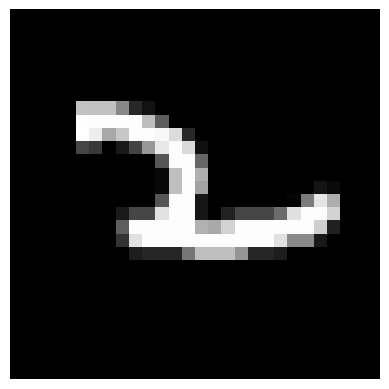

Predicted: 7, Actual: 3


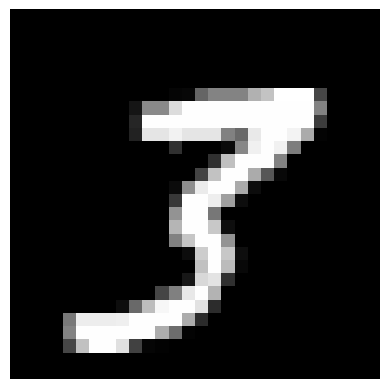

tensor([1, 1, 3, 3, 9, 6, 7, 4, 1, 2, 3, 0, 8, 1, 3, 9, 6, 9, 3, 5, 0, 2, 7, 2,
        5, 1, 2, 3, 8, 0, 8, 6, 1, 5, 0, 3, 0, 5, 1, 4, 0, 3, 7, 2, 4, 1, 5, 0,
        7, 0, 4, 3, 1, 9, 2, 7, 7, 1, 4, 9, 9, 3, 7, 1])
Predicted: 2, Actual: 5


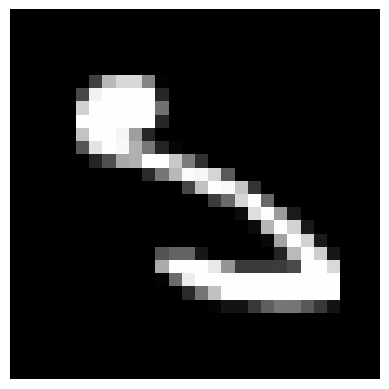

Predicted: 1, Actual: 7


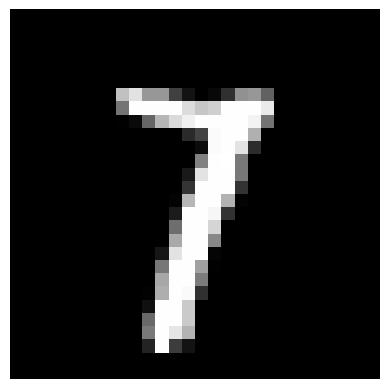

Predicted: 2, Actual: 4


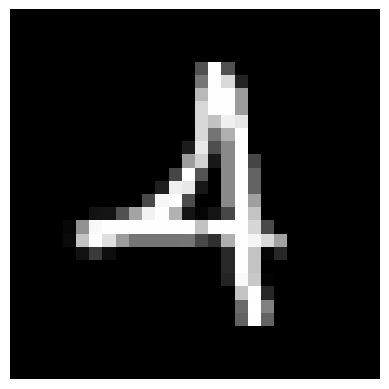

Predicted: 2, Actual: 7


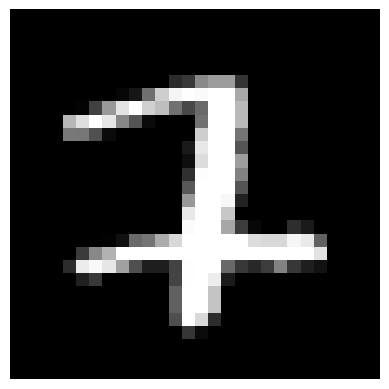

Predicted: 3, Actual: 5


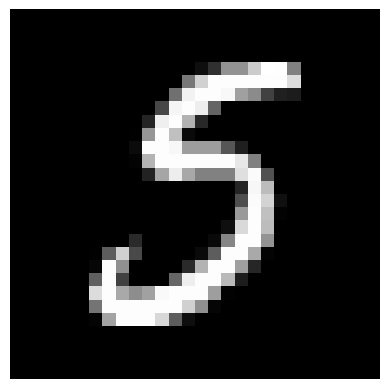

Predicted: 6, Actual: 8


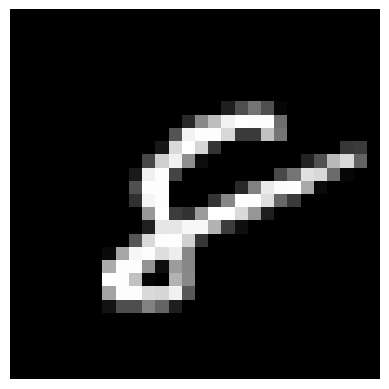

Predicted: 5, Actual: 3


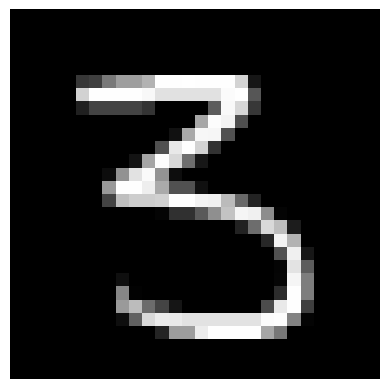

Predicted: 4, Actual: 7


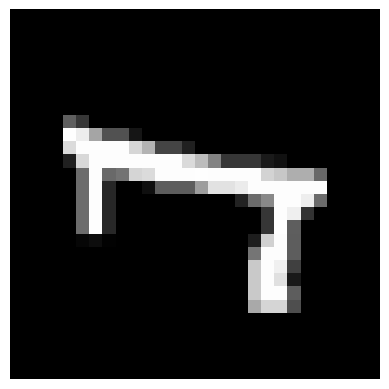

Predicted: 5, Actual: 8


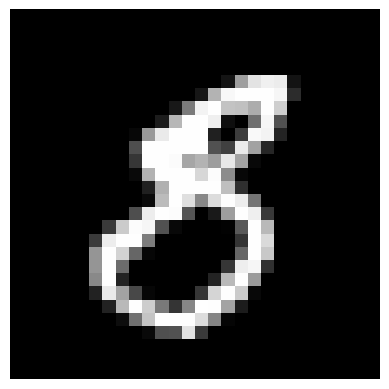

Predicted: 2, Actual: 8


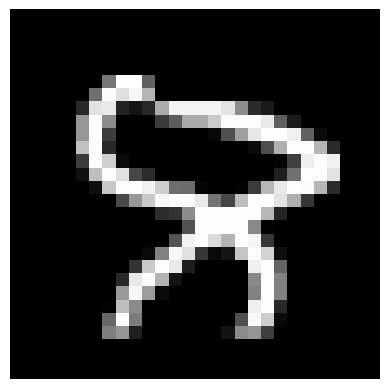

Predicted: 7, Actual: 2


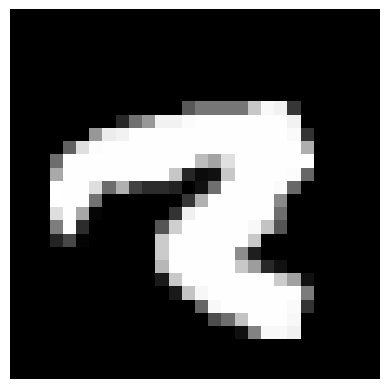

tensor([7, 9, 0, 2, 0, 3, 3, 7, 4, 9, 2, 3, 3, 7, 7, 0, 0, 7, 5, 2, 9, 5, 7, 4,
        4, 2, 6, 0, 1, 9, 6, 8, 2, 9, 0, 8, 3, 1, 1, 6, 3, 5, 1, 1, 1, 3, 1, 8,
        3, 0, 8, 0, 1, 3, 5, 5, 7, 4, 7, 9, 6, 9, 6, 8])
Predicted: 4, Actual: 6


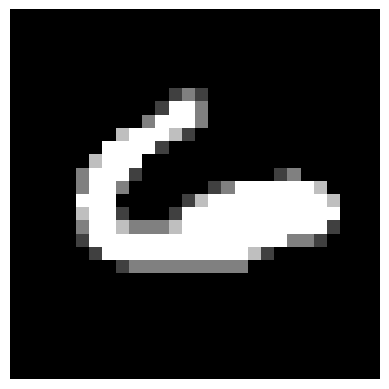

Predicted: 5, Actual: 8


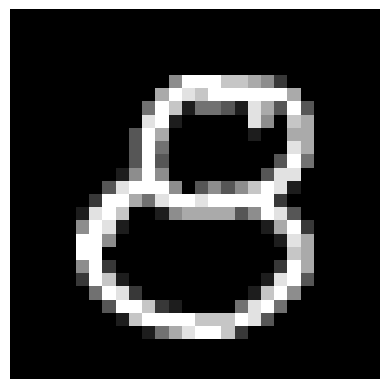

Predicted: 0, Actual: 6


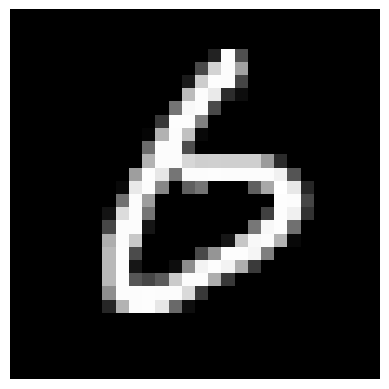

Predicted: 8, Actual: 2


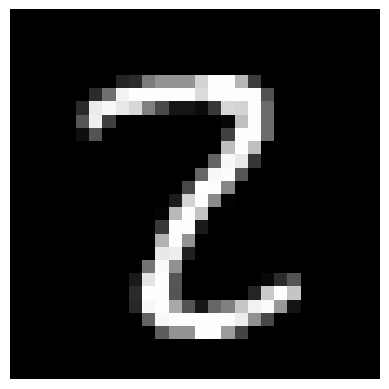

Predicted: 8, Actual: 2


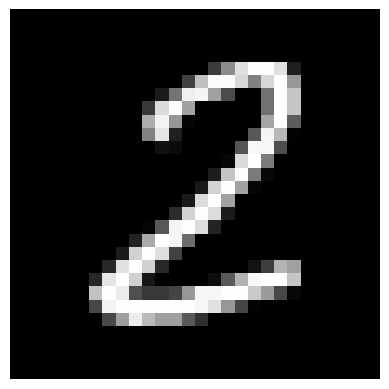

Predicted: 7, Actual: 8


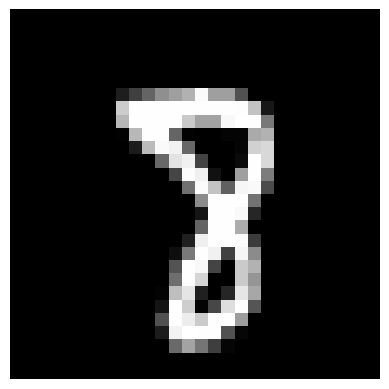

tensor([3, 4, 6, 8, 5, 1, 4, 2, 4, 4, 5, 1, 4, 9, 0, 2, 4, 9, 8, 7, 1, 8, 3, 5,
        6, 9, 8, 7, 1, 1, 6, 7, 6, 3, 2, 2, 0, 8, 9, 2, 5, 1, 0, 3, 1, 4, 5, 4,
        9, 6, 9, 0, 6, 1, 5, 5, 8, 3, 8, 2, 6, 8, 0, 7])
Predicted: 4, Actual: 6


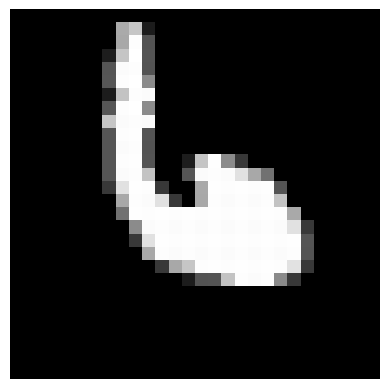

Predicted: 4, Actual: 1


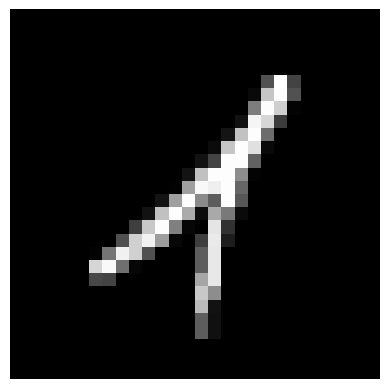

Predicted: 8, Actual: 5


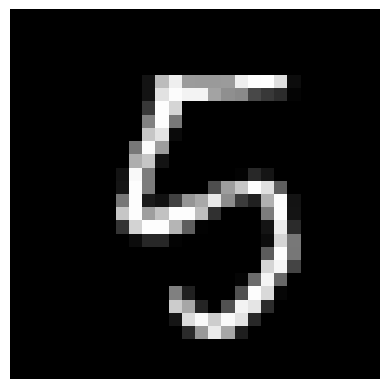

Predicted: 3, Actual: 8


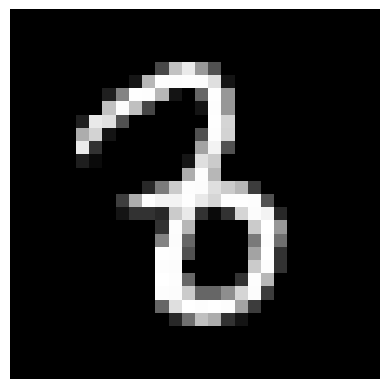

Predicted: 3, Actual: 8


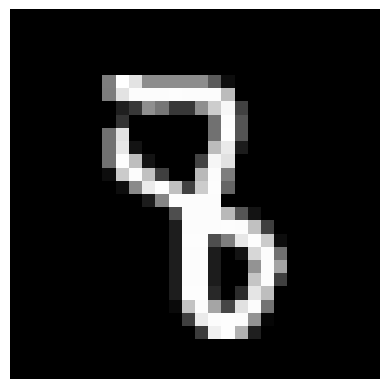

Predicted: 4, Actual: 9


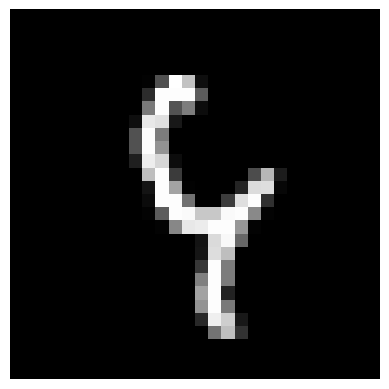

Predicted: 4, Actual: 7


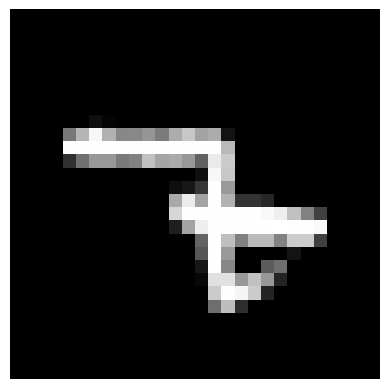

Predicted: 8, Actual: 5


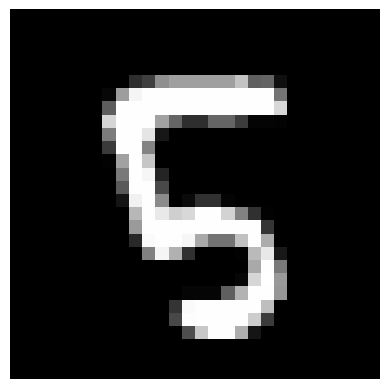

tensor([4, 6, 1, 3, 4, 7, 5, 2, 3, 4, 4, 5, 2, 7, 1, 7, 2, 6, 6, 1, 5, 7, 8, 6,
        0, 1, 8, 2, 4, 7, 7, 6, 5, 3, 5, 2, 9, 2, 4, 0, 8, 8, 3, 4, 9, 2, 7, 5,
        1, 6, 3, 6, 0, 5, 6, 7, 3, 6, 4, 9, 4, 4, 5, 3])
Predicted: 5, Actual: 3


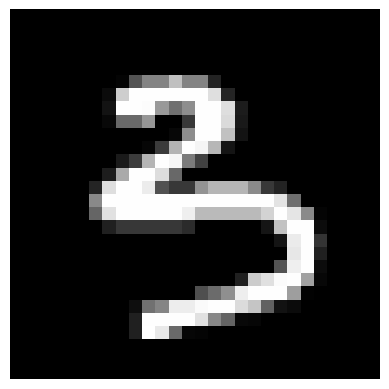

Predicted: 4, Actual: 2


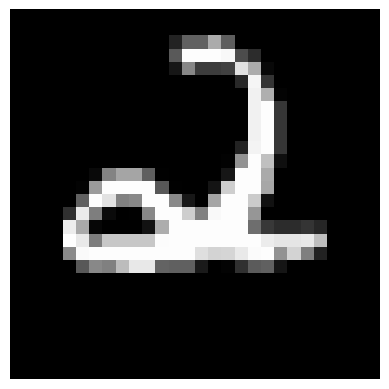

Predicted: 6, Actual: 4


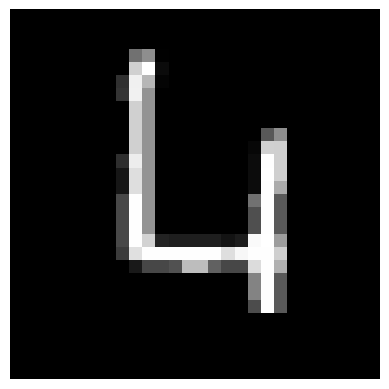

Predicted: 4, Actual: 5


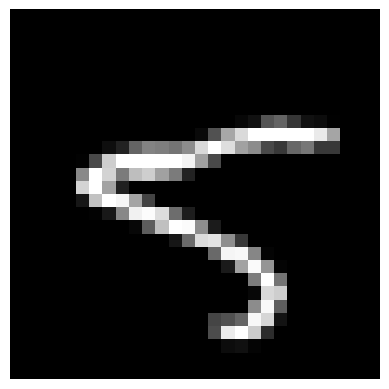

Predicted: 5, Actual: 9


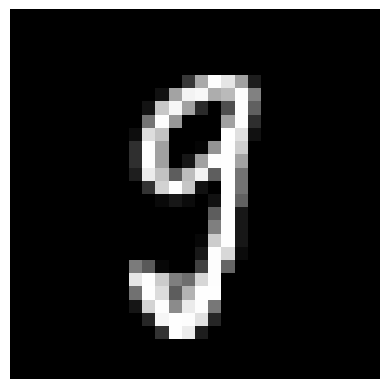

Predicted: 2, Actual: 8


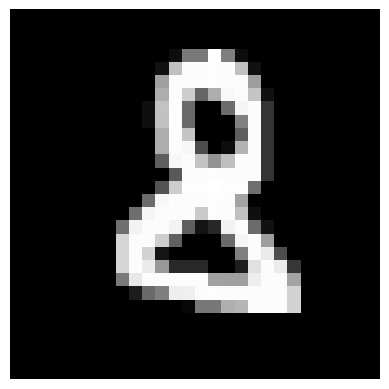

Predicted: 9, Actual: 4


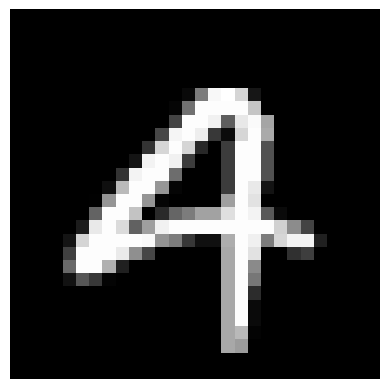

Predicted: 1, Actual: 8


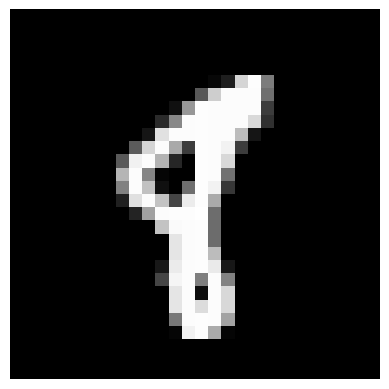

Predicted: 3, Actual: 5


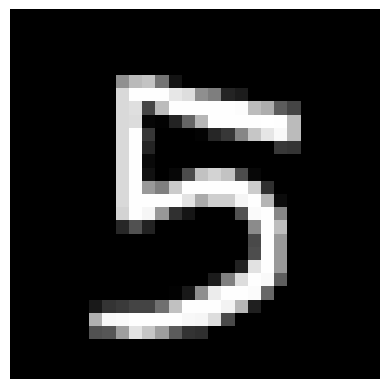

Predicted: 5, Actual: 8


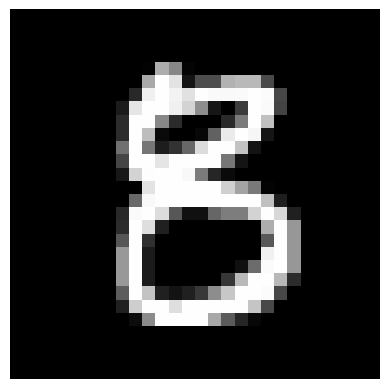

Predicted: 4, Actual: 6


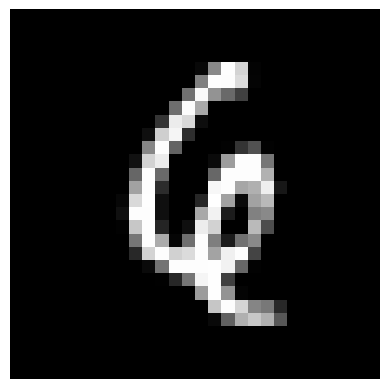

Predicted: 5, Actual: 6


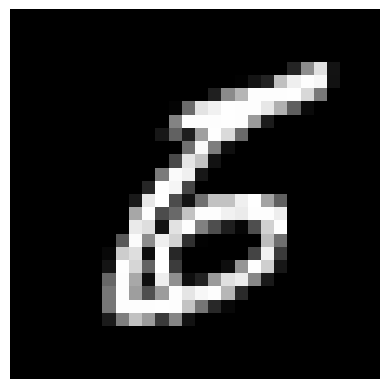

tensor([0, 4, 1, 0, 1, 4, 6, 2, 9, 1, 1, 0, 6, 3, 9, 5, 6, 5, 6, 5, 8, 4, 6, 4,
        3, 8, 1, 3, 4, 1, 9, 1, 2, 1, 1, 9, 3, 5, 4, 0, 9, 3, 6, 1, 7, 5, 5, 3,
        3, 0, 1, 3, 7, 6, 8, 6, 6, 1, 0, 8, 7, 3, 4, 0])
Predicted: 0, Actual: 2


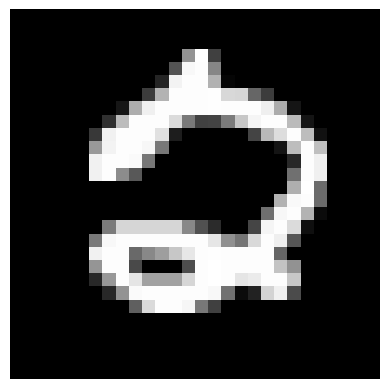

Predicted: 8, Actual: 9


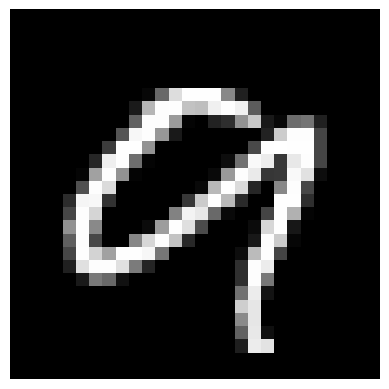

Predicted: 2, Actual: 7


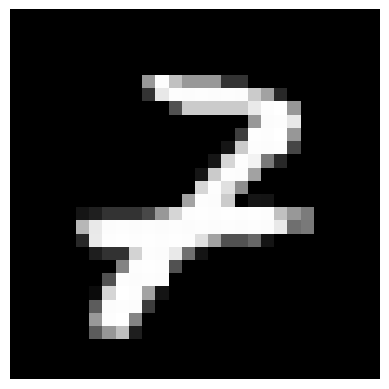

Predicted: 9, Actual: 7


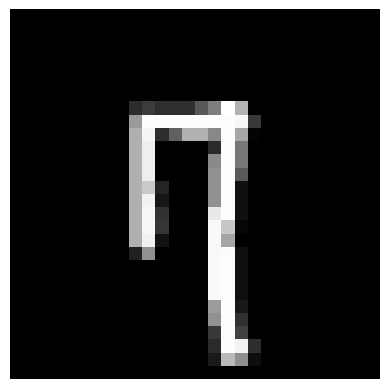

Predicted: 3, Actual: 5


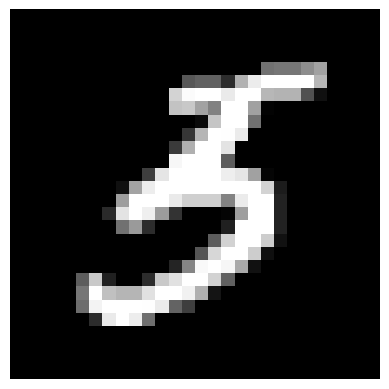

Predicted: 6, Actual: 5


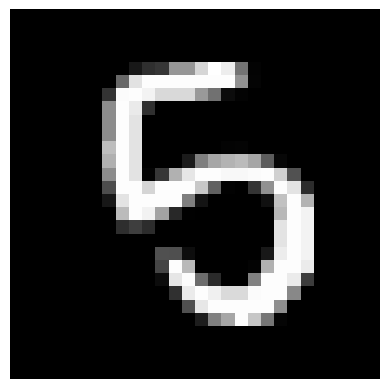

Predicted: 6, Actual: 5


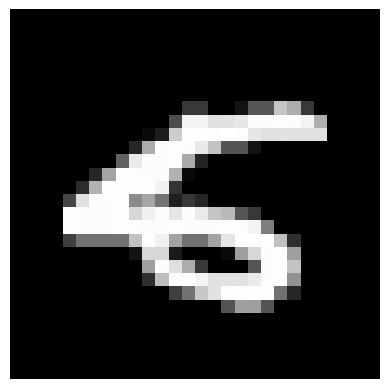

Predicted: 8, Actual: 4


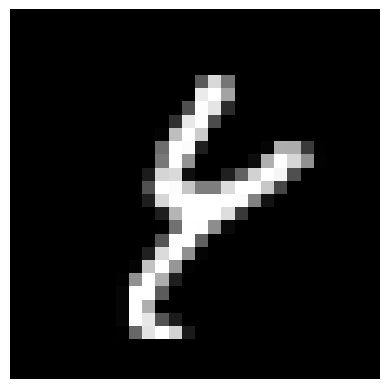

Predicted: 7, Actual: 2


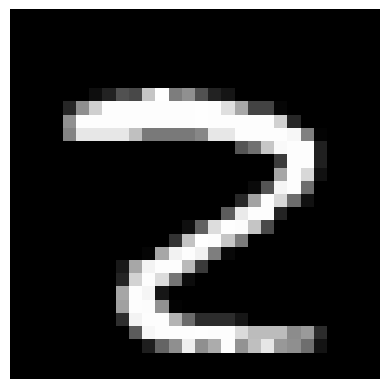

Predicted: 0, Actual: 6


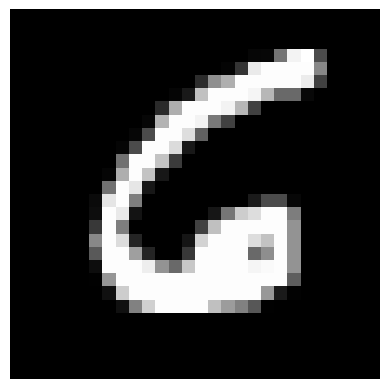

tensor([7, 9, 8, 1, 4, 9, 9, 2, 8, 6, 2, 7, 0, 0, 6, 7, 5, 8, 6, 0, 4, 3, 9, 1,
        3, 5, 4, 3, 3, 5, 5, 6, 3, 0, 2, 3, 4, 2, 3, 0, 9, 9, 4, 7, 2, 1, 4, 7,
        0, 6, 0, 9, 5, 2, 8, 5, 7, 3, 0, 5, 2, 7, 8, 8])
Predicted: 4, Actual: 8


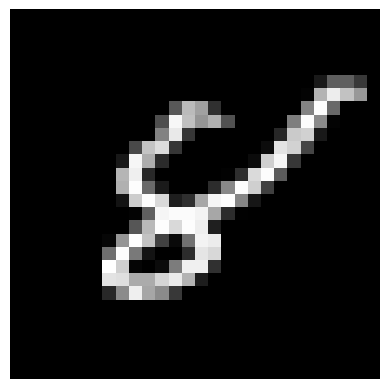

Predicted: 9, Actual: 4


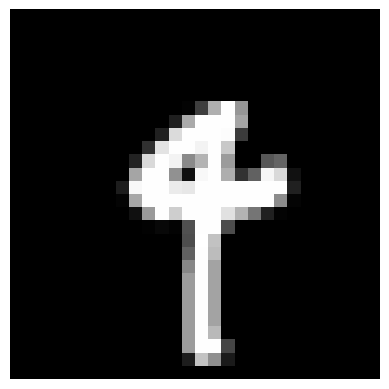

Predicted: 4, Actual: 9


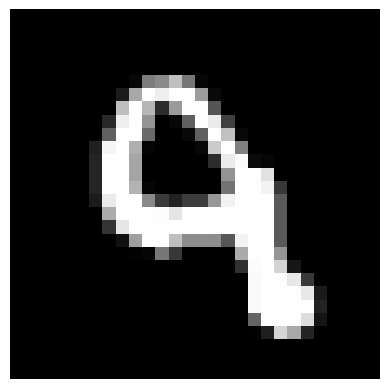

Predicted: 9, Actual: 7


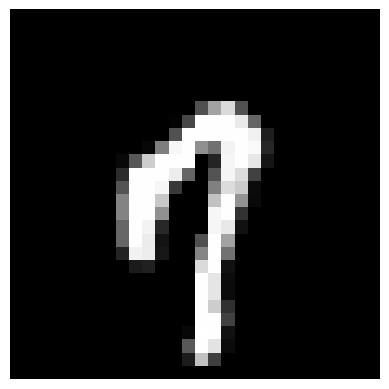

Predicted: 1, Actual: 8


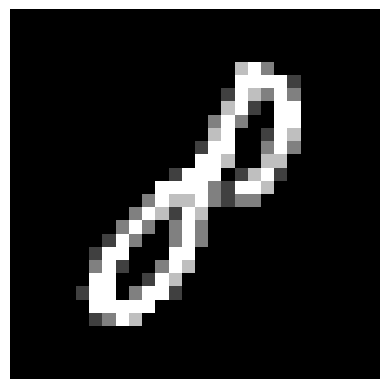

Predicted: 0, Actual: 2


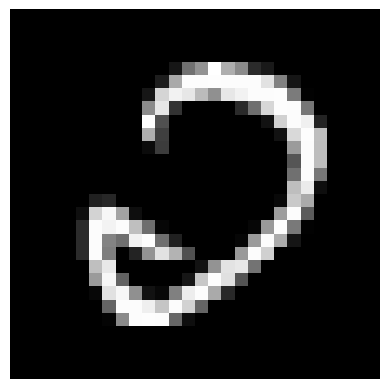

Predicted: 9, Actual: 8


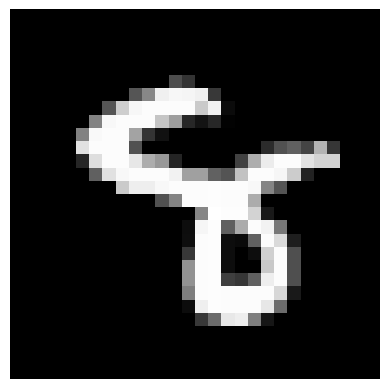

Predicted: 5, Actual: 8


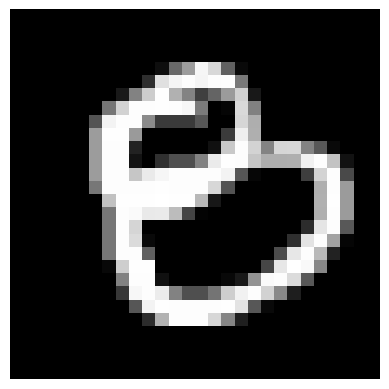

Predicted: 7, Actual: 3


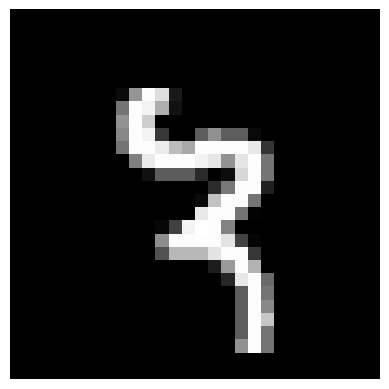

Predicted: 8, Actual: 2


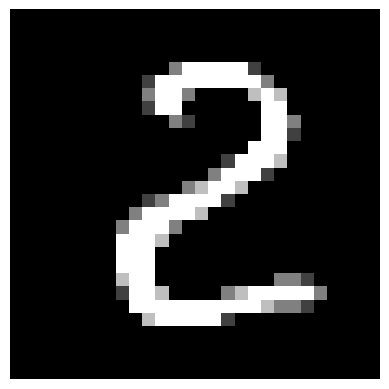

tensor([2, 5, 5, 0, 5, 4, 3, 8, 4, 8, 2, 7, 4, 5, 2, 0, 3, 8, 9, 6, 7, 2, 4, 1,
        1, 1, 8, 3, 6, 7, 8, 7, 6, 4, 8, 9, 4, 8, 6, 5, 3, 3, 1, 0, 6, 2, 2, 5,
        6, 9, 5, 8, 1, 4, 1, 7, 2, 4, 6, 1, 8, 4, 3, 1])
Predicted: 0, Actual: 7


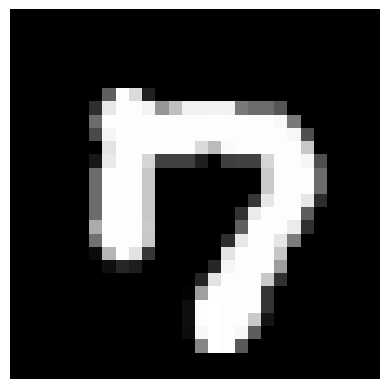

Predicted: 5, Actual: 6


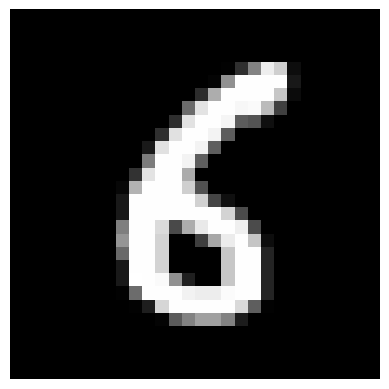

Predicted: 3, Actual: 6


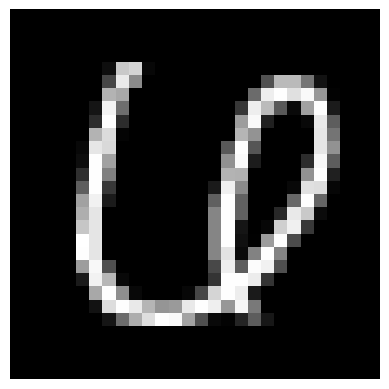

Predicted: 8, Actual: 9


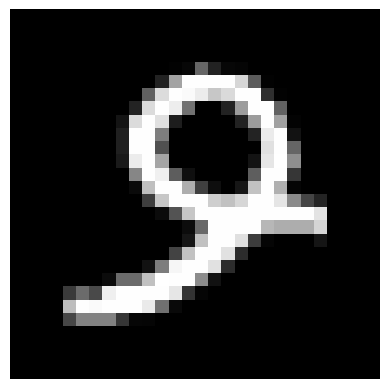

Predicted: 9, Actual: 4


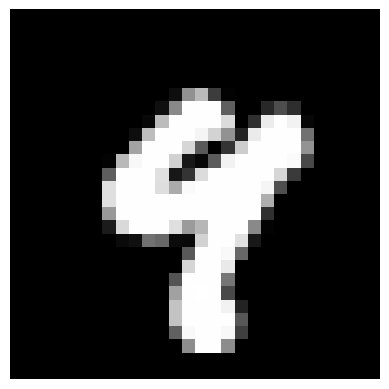

Predicted: 4, Actual: 5


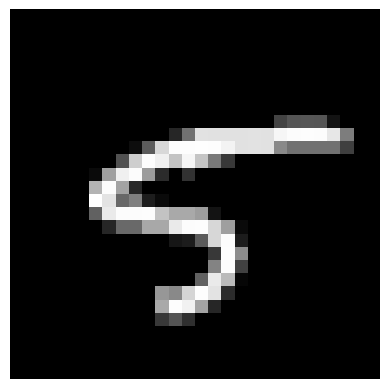

Predicted: 1, Actual: 6


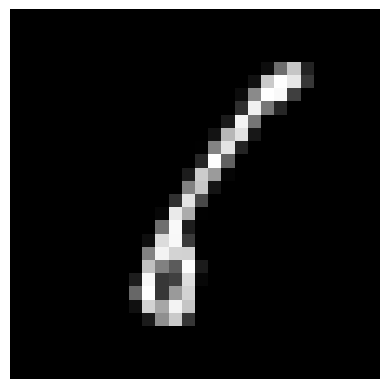

Predicted: 8, Actual: 2


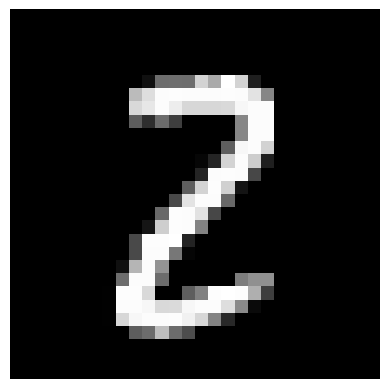

Predicted: 5, Actual: 3


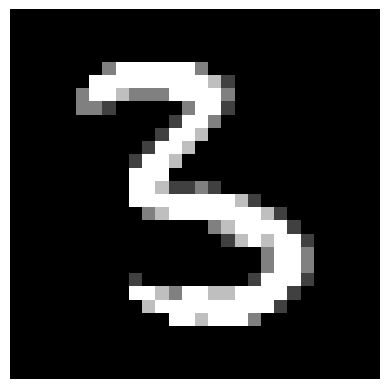

Predicted: 3, Actual: 8


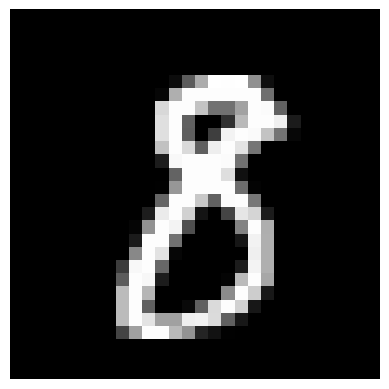

Predicted: 2, Actual: 8


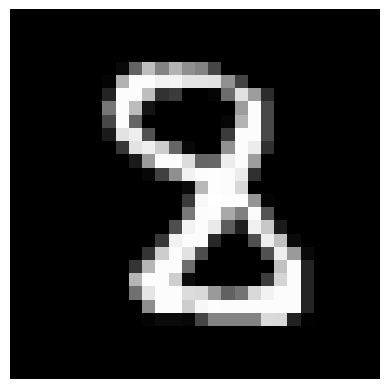

tensor([2, 3, 0, 8, 5, 9, 2, 6, 2, 5, 5, 7, 0, 1, 0, 2, 3, 7, 6, 7, 9, 1, 2, 6,
        2, 4, 4, 8, 0, 4, 4, 5, 3, 0, 6, 8, 9, 8, 5, 2, 9, 0, 9, 8, 7, 1, 3, 4,
        6, 8, 0, 9, 1, 7, 3, 6, 4, 4, 7, 1, 0, 5, 7, 1])
Predicted: 3, Actual: 8


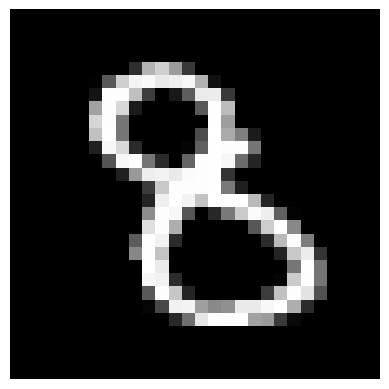

Predicted: 2, Actual: 1


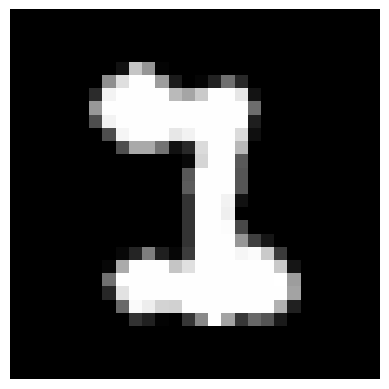

Predicted: 6, Actual: 4


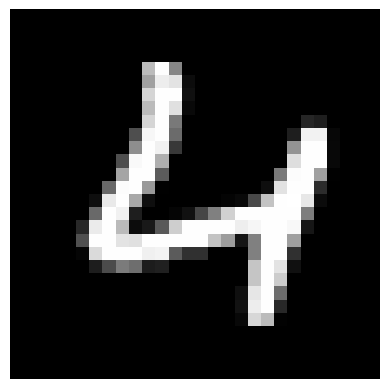

Predicted: 5, Actual: 0


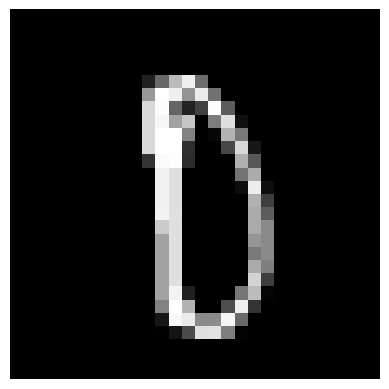

Predicted: 5, Actual: 2


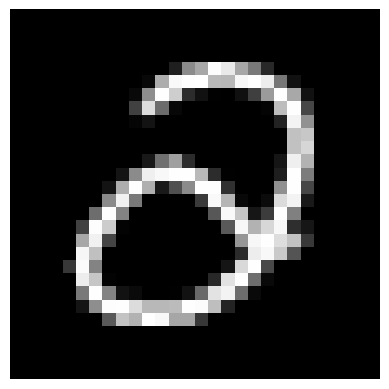

Predicted: 1, Actual: 9


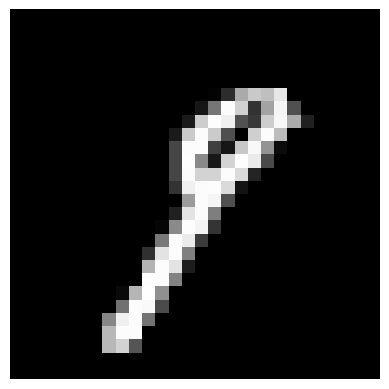

Predicted: 3, Actual: 5


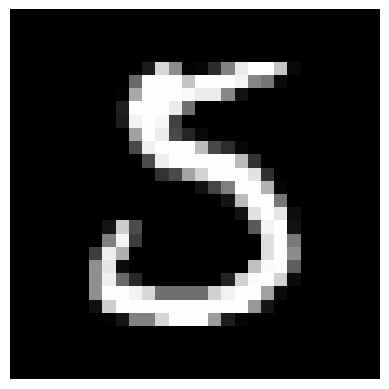

Predicted: 1, Actual: 4


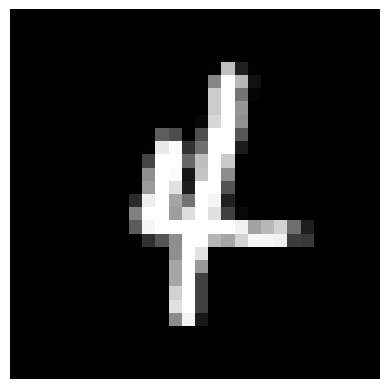

Predicted: 3, Actual: 8


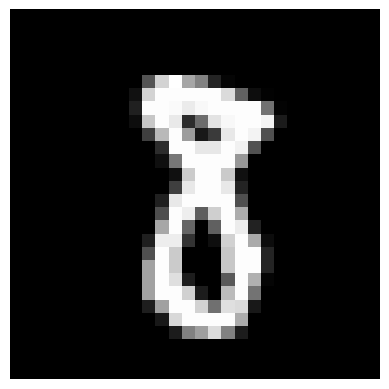

Predicted: 2, Actual: 6


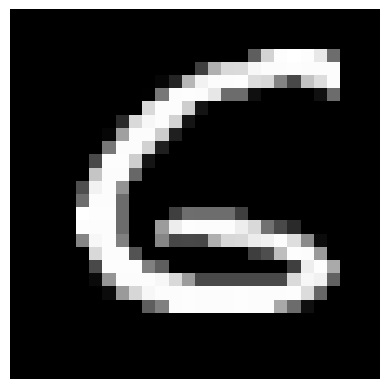

Predicted: 9, Actual: 4


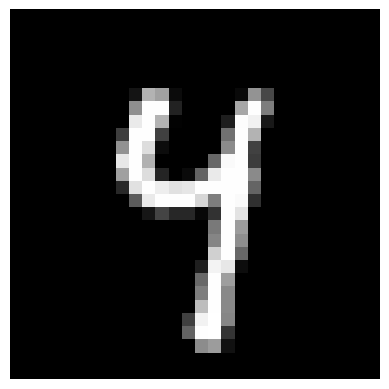

Predicted: 6, Actual: 5


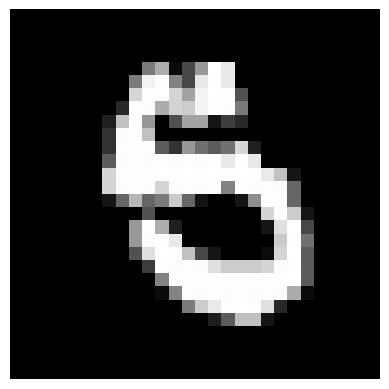

Predicted: 7, Actual: 3


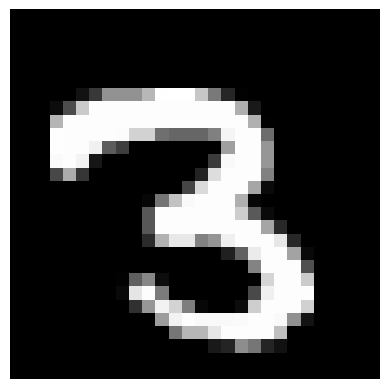

Predicted: 4, Actual: 9


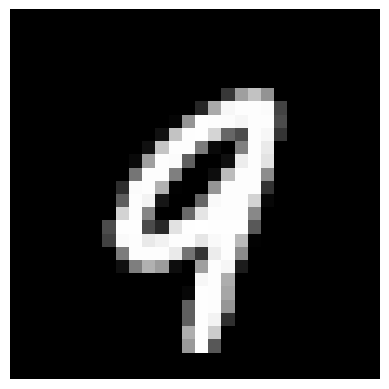

Predicted: 4, Actual: 8


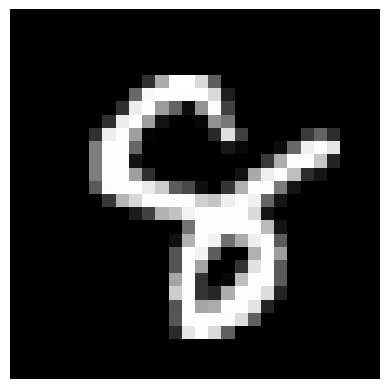

tensor([7, 5, 2, 7, 9, 1, 8, 5, 2, 4, 9, 4, 7, 2, 2, 3, 4, 9, 1, 9, 2, 1, 7, 9,
        4, 4, 6, 6, 7, 1, 7, 8, 0, 1, 9, 7, 1, 1, 7, 3, 3, 3, 5, 1, 3, 7, 6, 1,
        3, 8, 7, 5, 9, 6, 0, 0, 2, 8, 3, 7, 3, 7, 1, 3])
Predicted: 6, Actual: 1


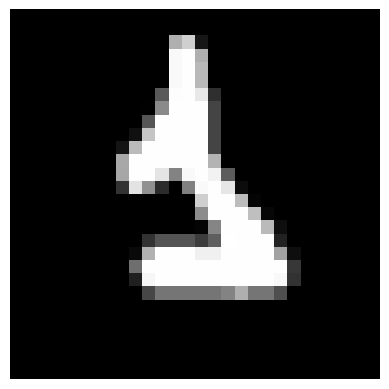

Predicted: 1, Actual: 2


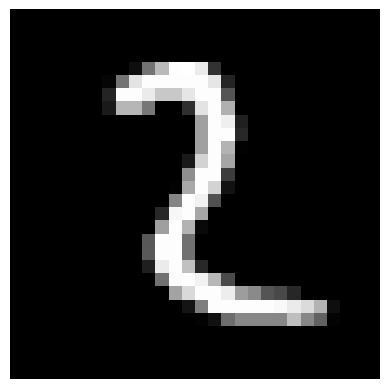

Predicted: 0, Actual: 8


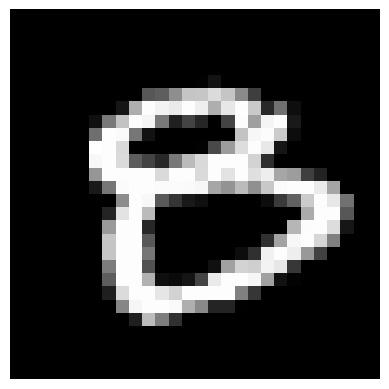

Predicted: 3, Actual: 5


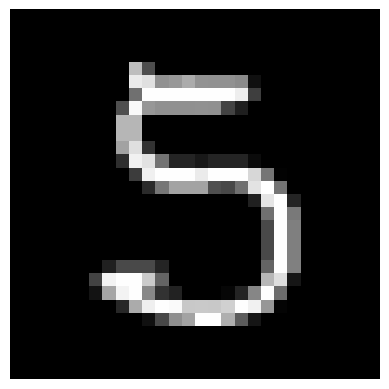

Predicted: 6, Actual: 9


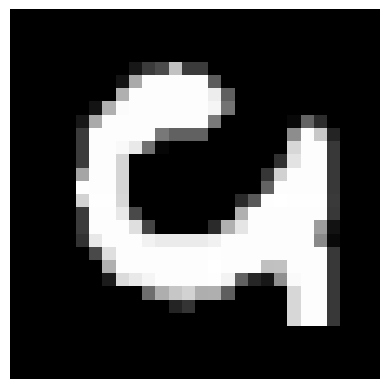

Predicted: 3, Actual: 8


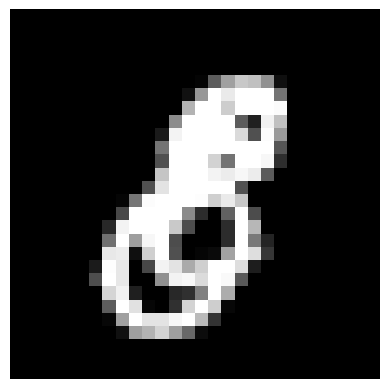

Predicted: 7, Actual: 2


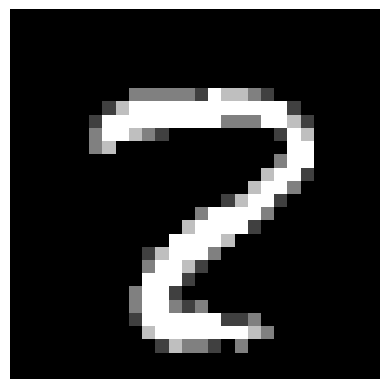

tensor([0, 8, 4, 4, 3, 8, 9, 2, 3, 9, 7, 1, 1, 7, 0, 6, 9, 6, 5, 9, 1, 1, 5, 2,
        0, 0, 4, 6, 7, 0, 7, 1, 4, 6, 4, 5, 4, 9, 9, 1, 7, 9, 5, 3, 3, 8, 2, 0,
        6, 2, 2, 1, 1, 1, 1, 1, 6, 9, 1, 4, 3, 7, 1, 6])
Predicted: 8, Actual: 3


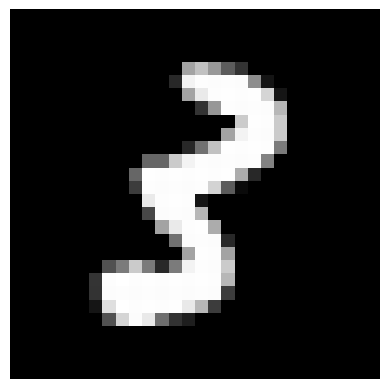

Predicted: 6, Actual: 4


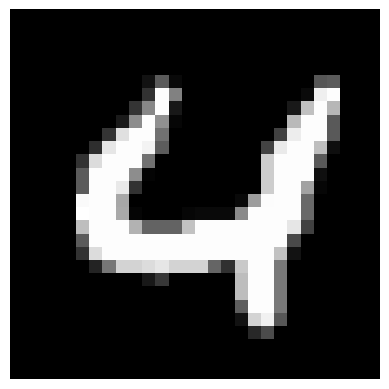

Predicted: 1, Actual: 7


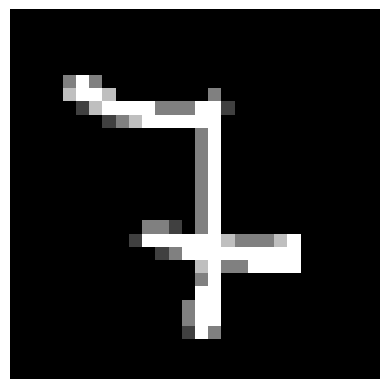

Predicted: 5, Actual: 0


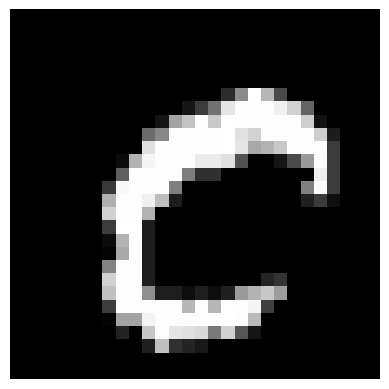

Predicted: 0, Actual: 3


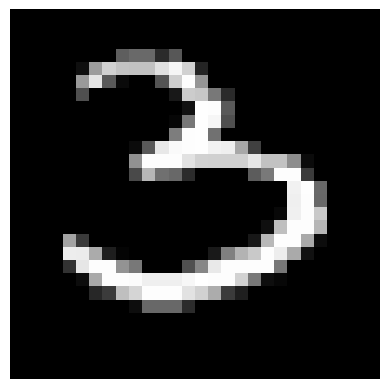

Predicted: 1, Actual: 8


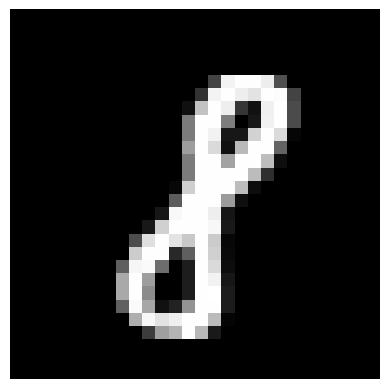

tensor([4, 9, 0, 4, 7, 4, 1, 4, 0, 7, 2, 1, 0, 9, 8, 6, 0, 0, 9, 1, 6, 8, 2, 2,
        3, 5, 9, 5, 0, 8, 1, 7, 5, 4, 4, 0, 2, 3, 1, 7, 7, 1, 0, 1, 2, 5, 9, 2,
        1, 0, 1, 8, 9, 1, 4, 8, 3, 3, 9, 3, 6, 8, 8, 3])
Predicted: 9, Actual: 5


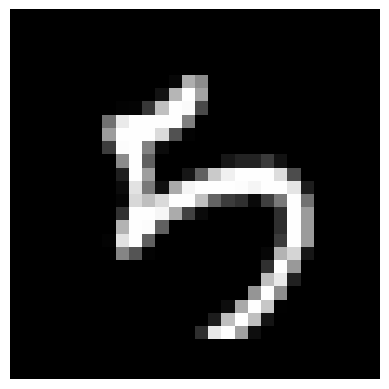

Predicted: 1, Actual: 2


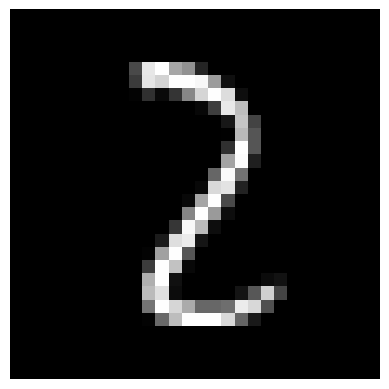

Predicted: 2, Actual: 0


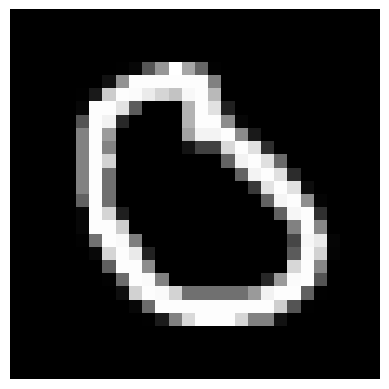

Predicted: 0, Actual: 9


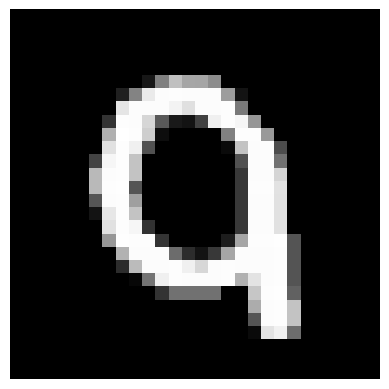

Predicted: 9, Actual: 8


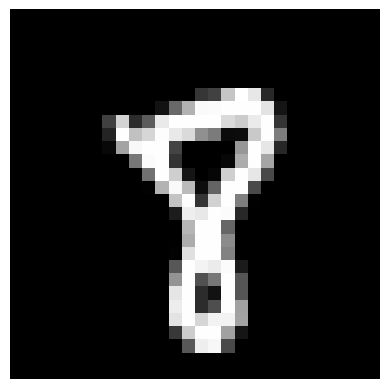

Predicted: 9, Actual: 4


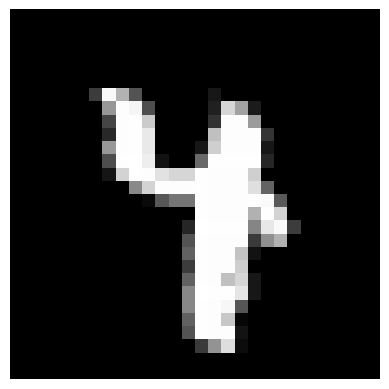

Predicted: 1, Actual: 9


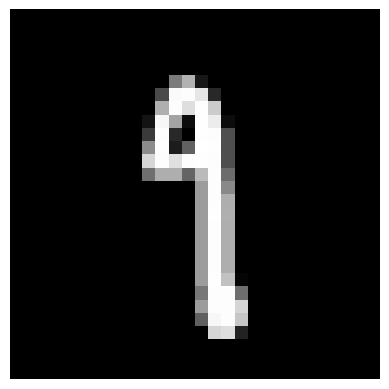

Predicted: 5, Actual: 8


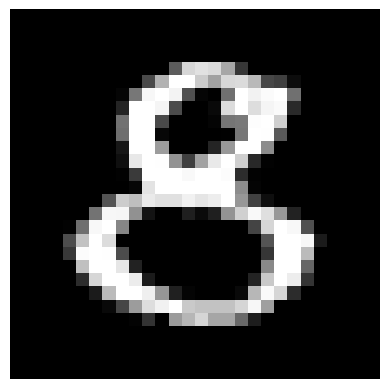

Predicted: 9, Actual: 4


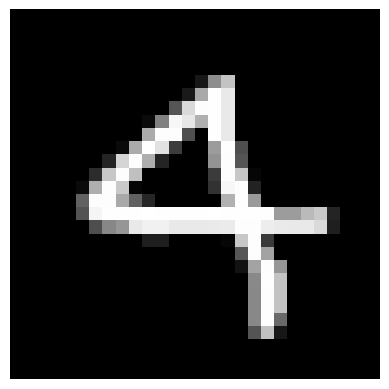

Predicted: 5, Actual: 8


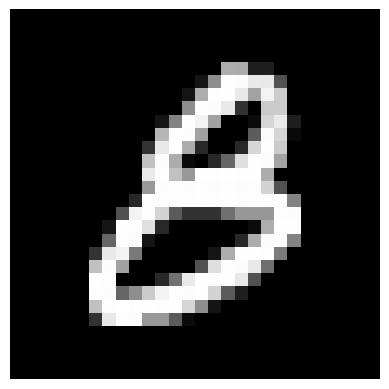

Predicted: 0, Actual: 2


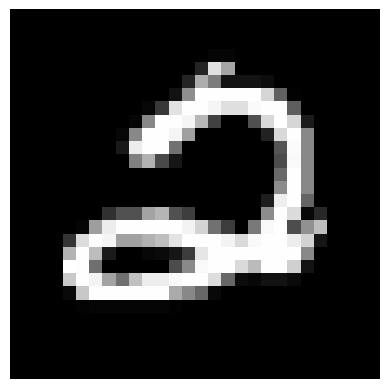

Predicted: 8, Actual: 2


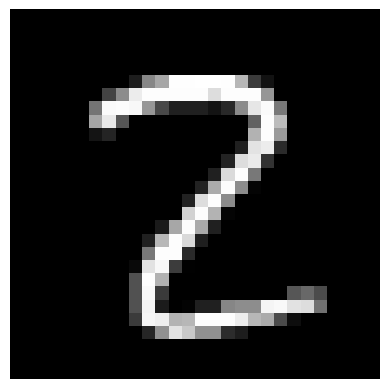

Predicted: 2, Actual: 4


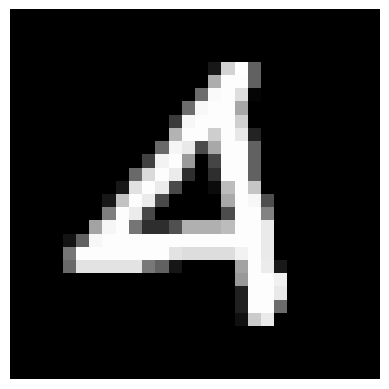

Predicted: 1, Actual: 9


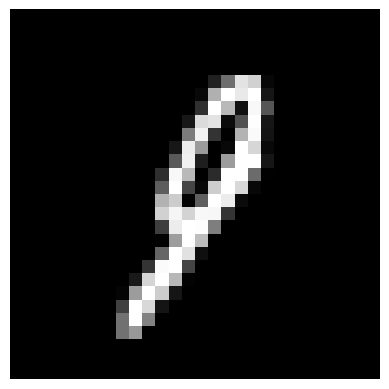

Predicted: 7, Actual: 3


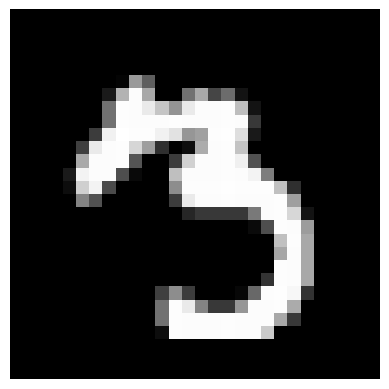

Predicted: 4, Actual: 6


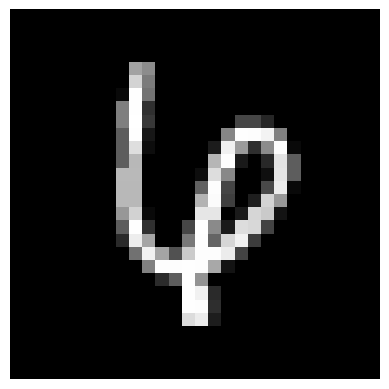

Predicted: 3, Actual: 8


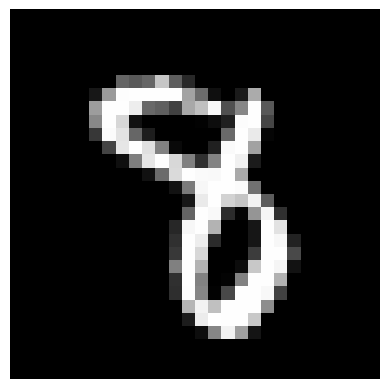

Predicted: 8, Actual: 2


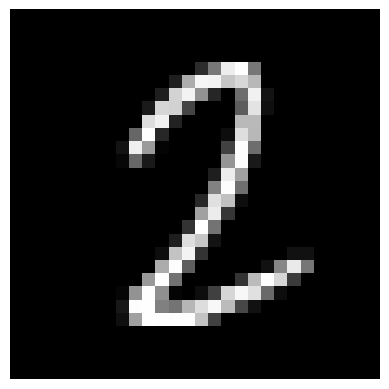

tensor([2, 1, 1, 0, 4, 2, 9, 2, 4, 3, 7, 9, 1, 5, 2, 9, 9, 5, 3, 8, 5, 3, 6, 0,
        9, 4, 6, 2, 5, 0, 0, 7, 4, 6, 6, 8, 6, 6, 8, 6, 9, 1, 7, 2, 5, 9, 9, 0,
        7, 2, 7, 6, 7, 0, 6, 5, 4, 4, 7, 2, 0, 9, 9, 2])
Predicted: 1, Actual: 2


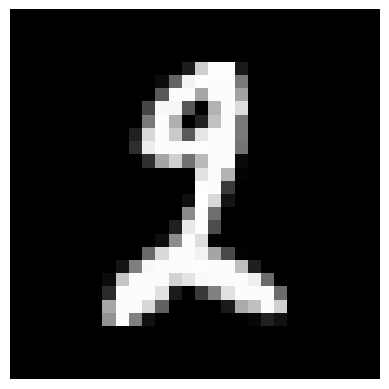

Predicted: 9, Actual: 4


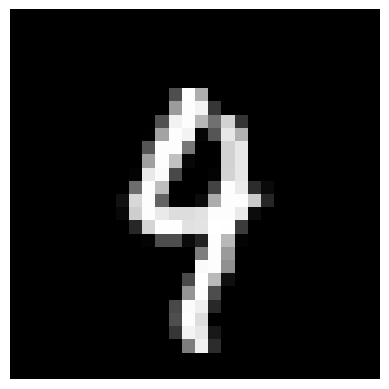

Predicted: 5, Actual: 0


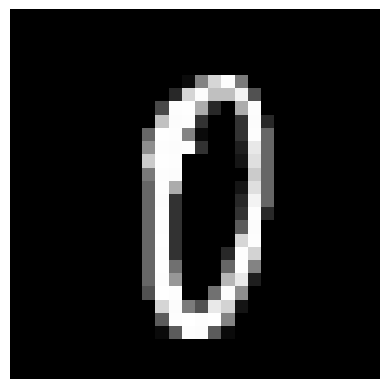

Predicted: 0, Actual: 2


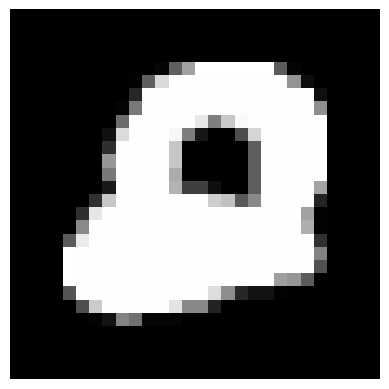

Predicted: 4, Actual: 2


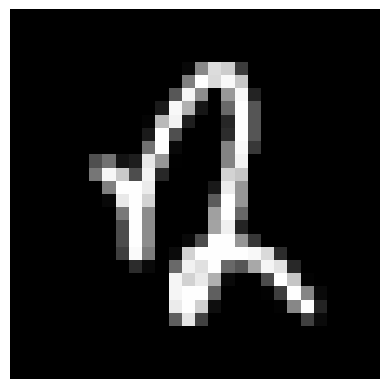

tensor([2, 9, 4, 4, 1, 3, 3, 2, 1, 7, 0, 7, 6, 4, 1, 3, 8, 1, 4, 6, 2, 2, 5, 1,
        3, 7, 3, 7, 1, 5, 3, 0, 9, 1, 4, 0, 6, 3, 5, 2, 0, 4, 9, 7, 5, 1, 0, 8,
        9, 3, 5, 7, 9, 3, 8, 3, 8, 1, 5, 3, 8, 0, 5, 3])
Predicted: 1, Actual: 2


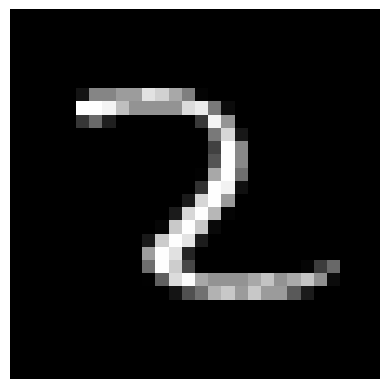

Predicted: 1, Actual: 7


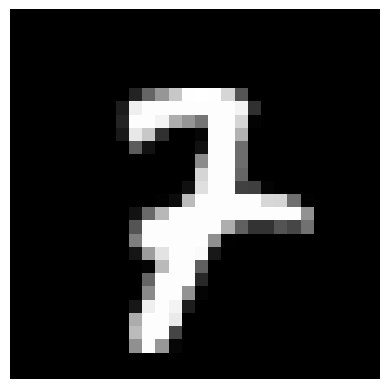

Predicted: 6, Actual: 5


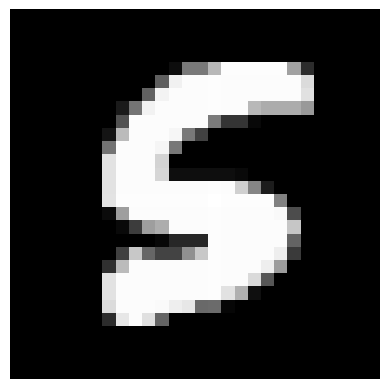

Predicted: 2, Actual: 9


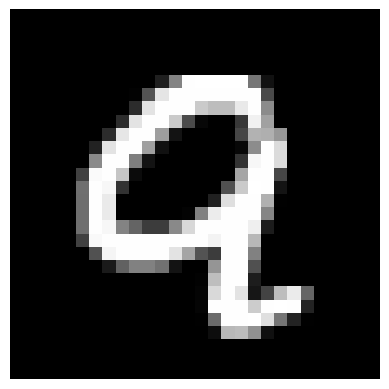

Predicted: 3, Actual: 8


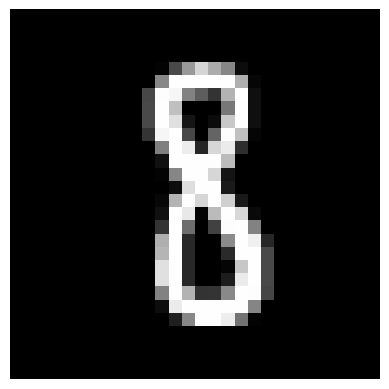

Predicted: 3, Actual: 5


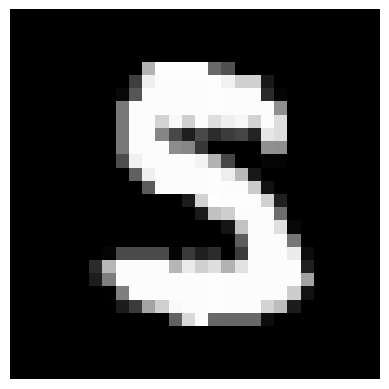

Predicted: 5, Actual: 3


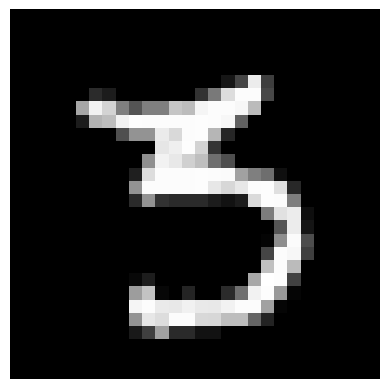

Predicted: 2, Actual: 6


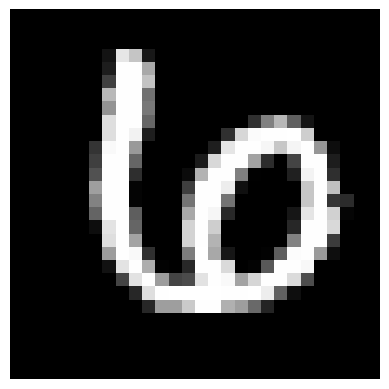

Predicted: 0, Actual: 6


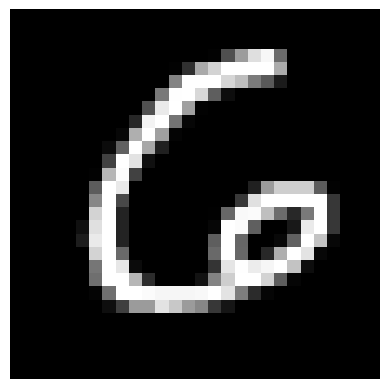

Predicted: 3, Actual: 5


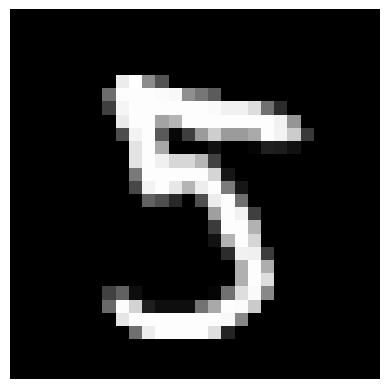

Predicted: 8, Actual: 5


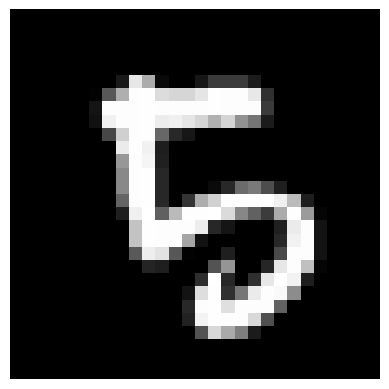

Predicted: 3, Actual: 5


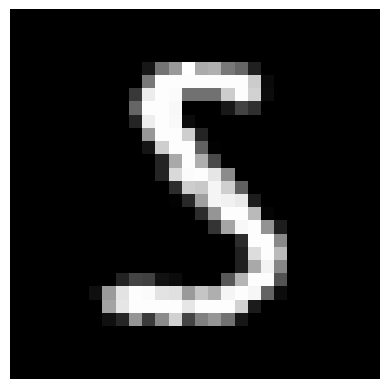

tensor([2, 8, 6, 7, 1, 7, 3, 7, 0, 5, 9, 0, 2, 8, 7, 3, 1, 7, 1, 8, 6, 5, 7, 3,
        8, 9, 3, 3, 7, 8, 1, 7, 0, 0, 5, 7, 2, 5, 2, 1, 8, 6, 2, 9, 3, 7, 5, 8,
        8, 6, 8, 5, 1, 4, 8, 4, 5, 8, 3, 0, 6, 2, 7, 3])
Predicted: 2, Actual: 3


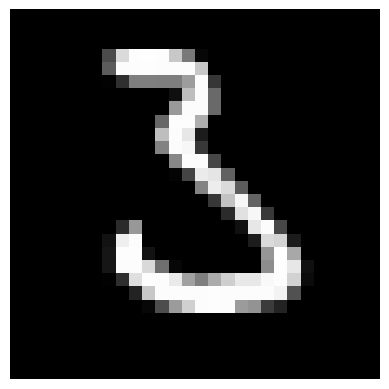

Predicted: 1, Actual: 7


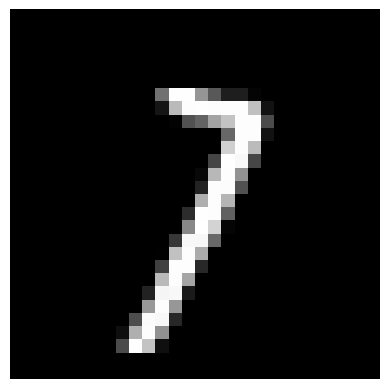

Predicted: 8, Actual: 5


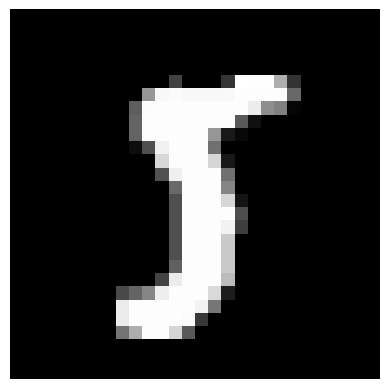

Predicted: 7, Actual: 5


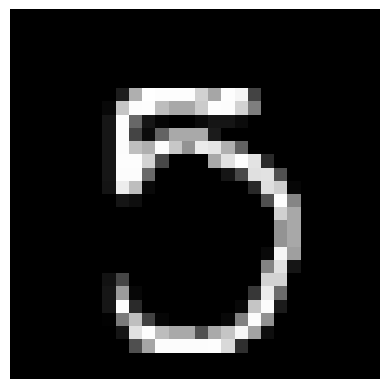

Predicted: 1, Actual: 7


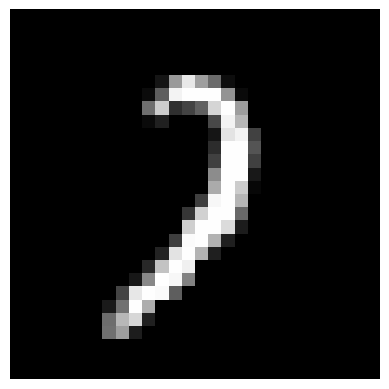

Predicted: 7, Actual: 9


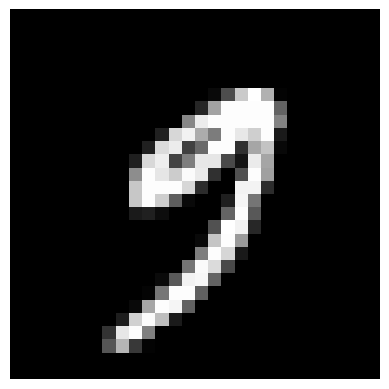

Predicted: 3, Actual: 5


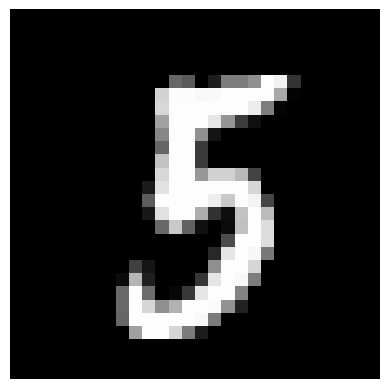

Predicted: 8, Actual: 9


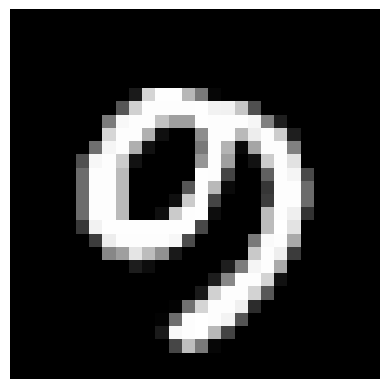

Predicted: 5, Actual: 3


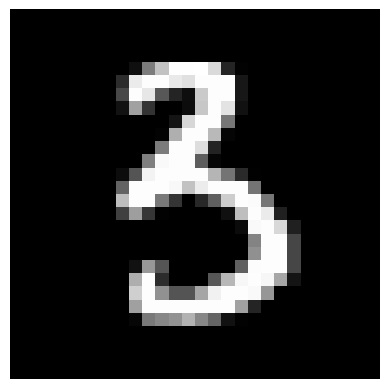

Predicted: 2, Actual: 8


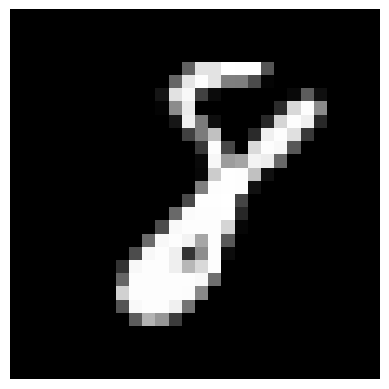

Predicted: 3, Actual: 5


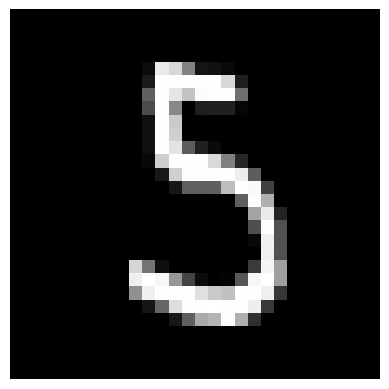

Predicted: 8, Actual: 7


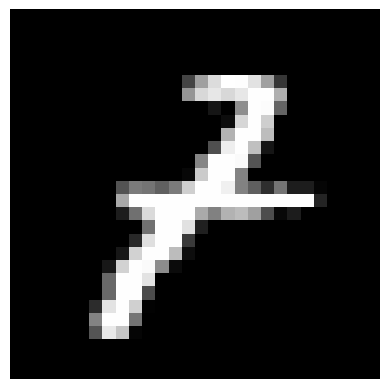

Predicted: 8, Actual: 2


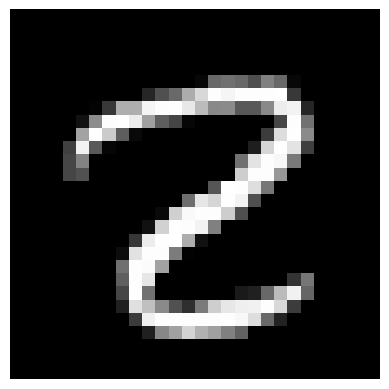

tensor([3, 2, 1, 0, 2, 3, 4, 6, 3, 9, 3, 4, 8, 9, 0, 3, 8, 0, 7, 6, 5, 4, 7, 3,
        5, 0, 8, 5, 2, 5, 1, 1, 0, 0, 4, 4, 0, 1, 2, 3, 2, 2, 7, 8, 5, 2, 8, 7,
        6, 9, 1, 4, 1, 6, 4, 2, 4, 3, 5, 4, 3, 9, 5, 0])
Predicted: 2, Actual: 7


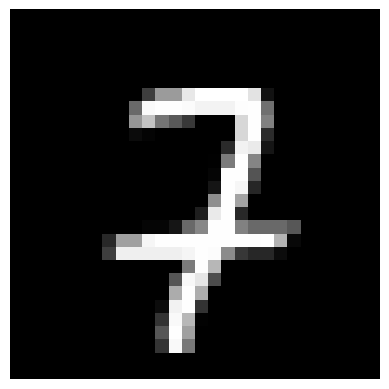

Predicted: 6, Actual: 0


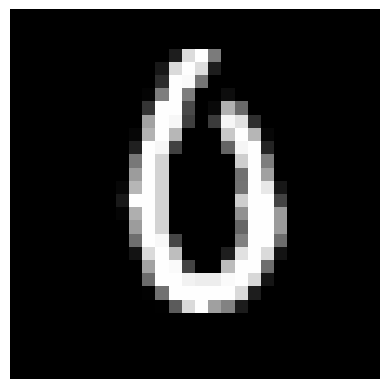

Predicted: 4, Actual: 2


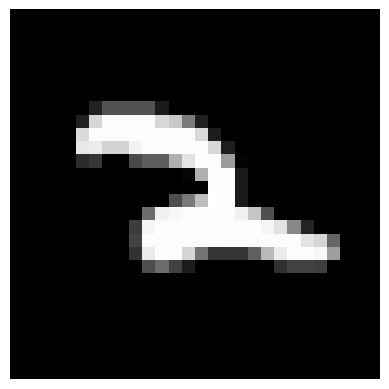

Predicted: 5, Actual: 9


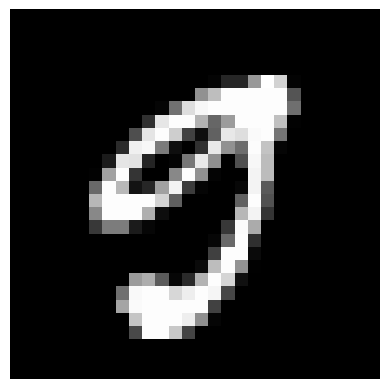

Predicted: 5, Actual: 6


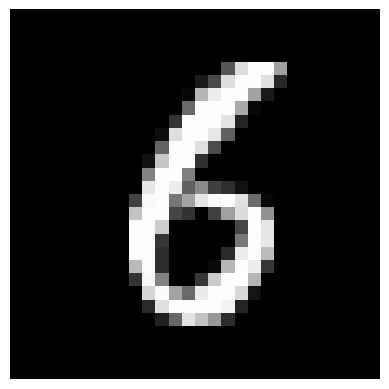

Predicted: 1, Actual: 6


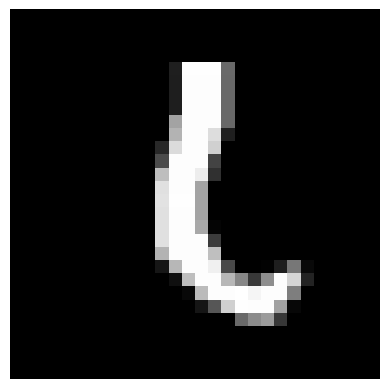

Predicted: 2, Actual: 7


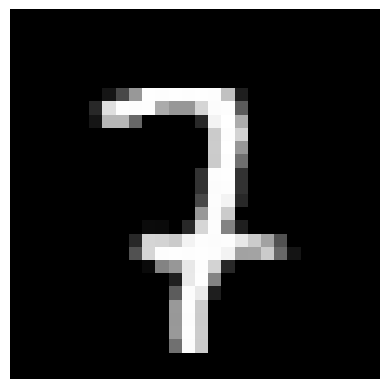

Predicted: 8, Actual: 5


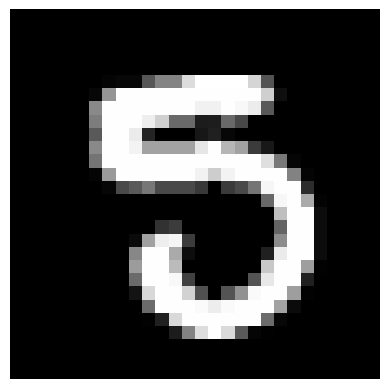

tensor([1, 5, 3, 8, 9, 1, 9, 4, 9, 9, 5, 2, 7, 4, 6, 0, 1, 8, 1, 0, 4, 4, 7, 6,
        3, 8, 0, 9, 3, 0, 6, 1, 9, 6, 1, 3, 8, 1, 2, 5, 2, 2, 4, 3, 6, 0, 1, 9,
        7, 6, 6, 8, 7, 2, 9, 8, 8, 3, 1, 0, 0, 7, 5, 0])
Predicted: 4, Actual: 7


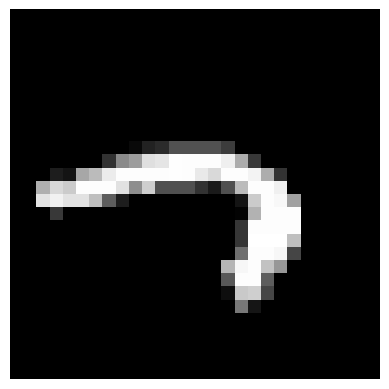

Predicted: 9, Actual: 5


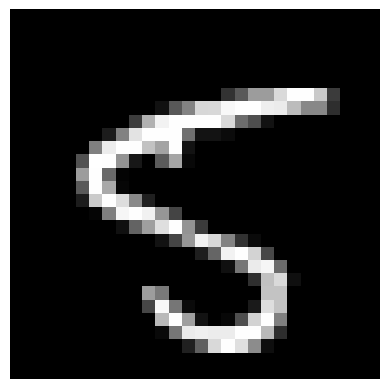

Predicted: 8, Actual: 1


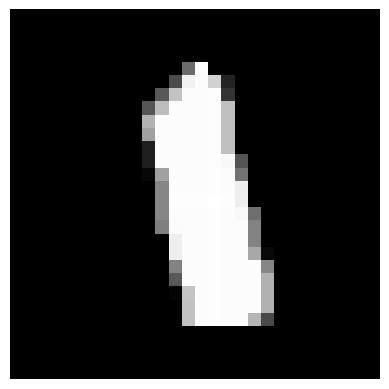

Predicted: 8, Actual: 0


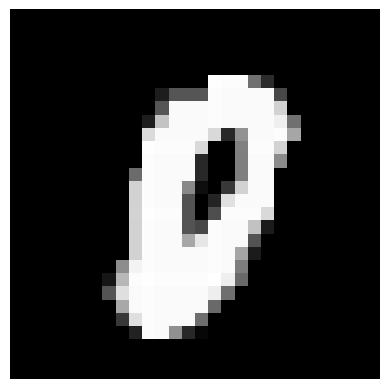

Predicted: 9, Actual: 4


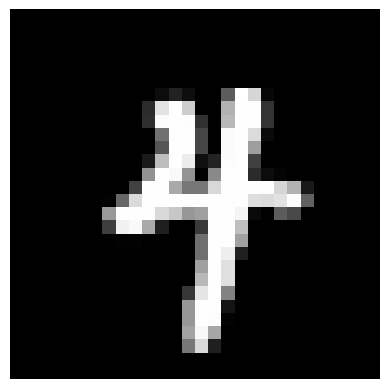

Predicted: 2, Actual: 6


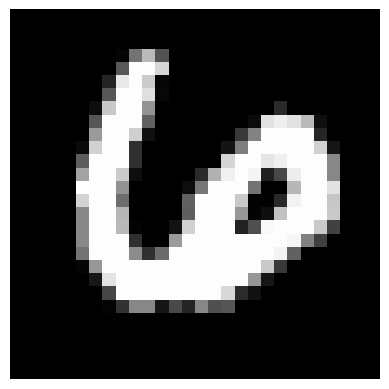

Predicted: 4, Actual: 7


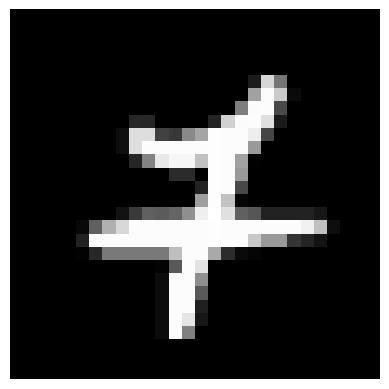

Predicted: 7, Actual: 9


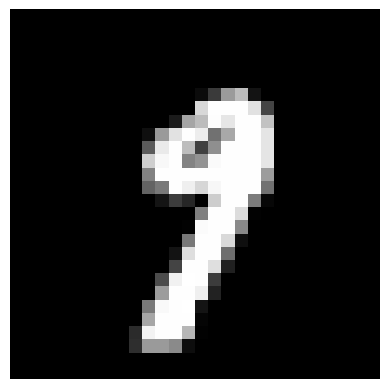

Predicted: 8, Actual: 5


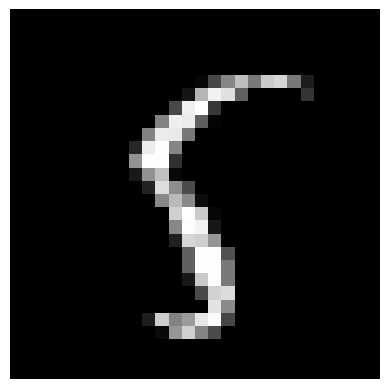

Predicted: 5, Actual: 6


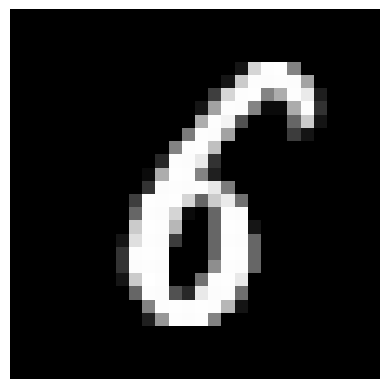

Predicted: 0, Actual: 6


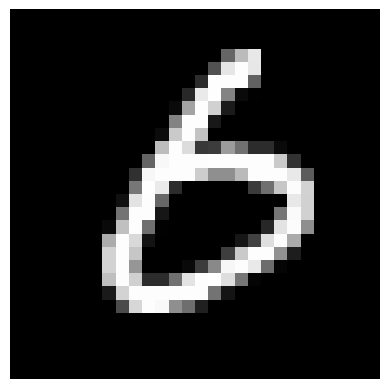

tensor([2, 1, 6, 9, 2, 1, 5, 6, 8, 0, 6, 0, 0, 0, 6, 3, 5, 9, 6, 9, 5, 5, 8, 5,
        3, 0, 4, 0, 3, 9, 6, 8, 2, 3, 1, 2, 1, 1, 5, 6, 9, 8, 0, 6, 6, 5, 5, 3,
        8, 6, 2, 1, 4, 4, 4, 3, 7, 8, 0, 0, 9, 3, 5, 1])
Predicted: 2, Actual: 3


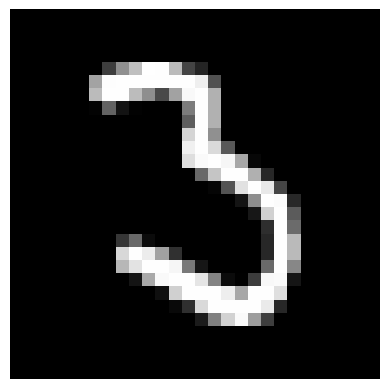

Predicted: 5, Actual: 8


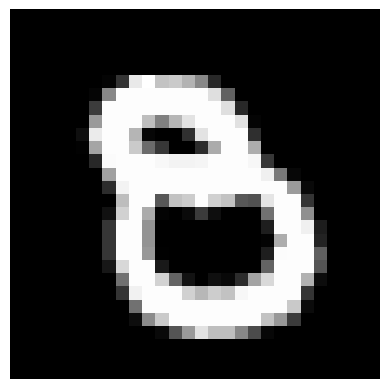

Predicted: 8, Actual: 9


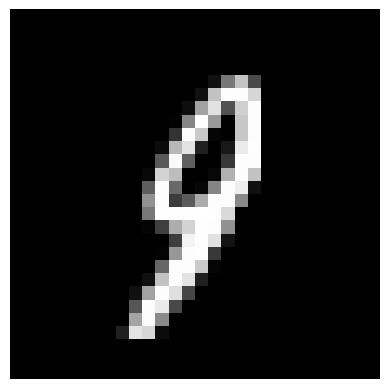

Predicted: 6, Actual: 3


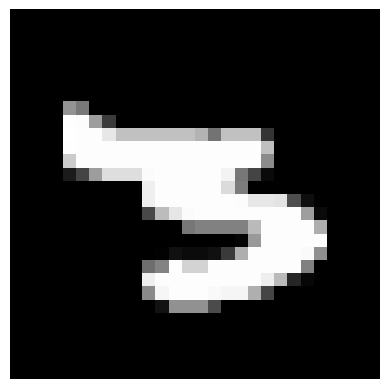

Predicted: 9, Actual: 4


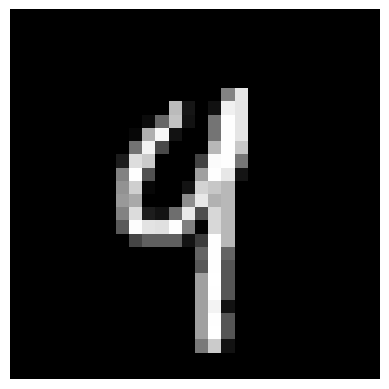

Predicted: 3, Actual: 2


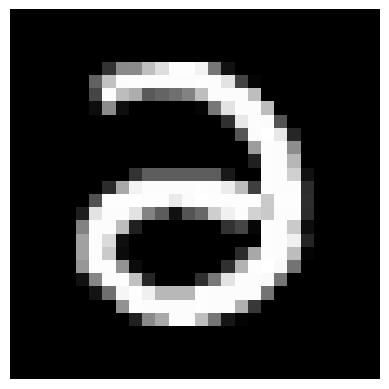

Predicted: 4, Actual: 5


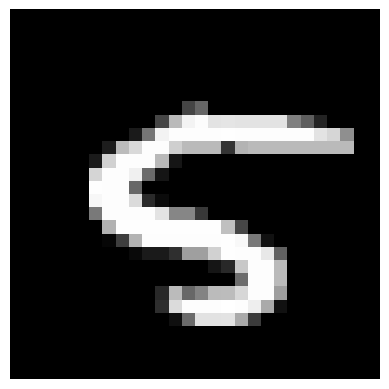

Predicted: 0, Actual: 5


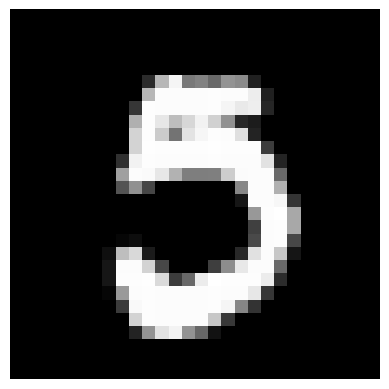

tensor([1, 0, 4, 4, 9, 0, 1, 7, 0, 1, 6, 1, 4, 5, 6, 6, 3, 7, 8, 4, 4, 7, 2, 5,
        3, 7, 0, 7, 7, 9, 6, 4, 2, 8, 0, 9, 8, 3, 9, 5, 8, 9, 9, 8, 6, 2, 8, 9,
        2, 3, 4, 1, 1, 8, 9, 3, 4, 0, 7, 9, 6, 4, 1, 4])
Predicted: 9, Actual: 7


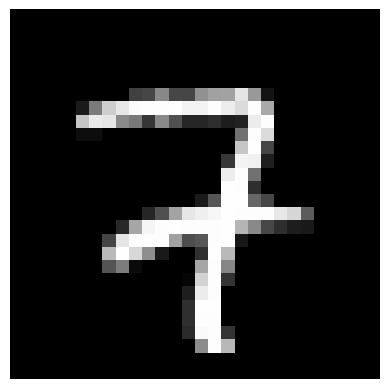

Predicted: 3, Actual: 5


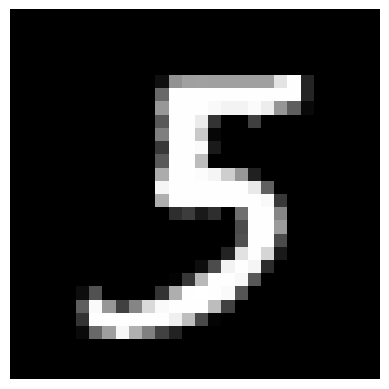

Predicted: 0, Actual: 5


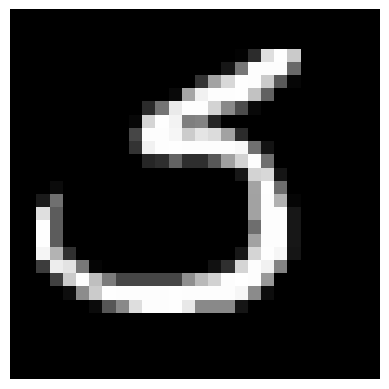

Predicted: 9, Actual: 7


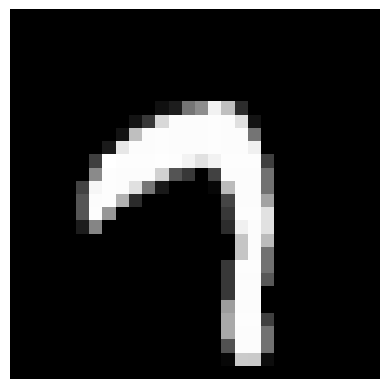

Predicted: 4, Actual: 6


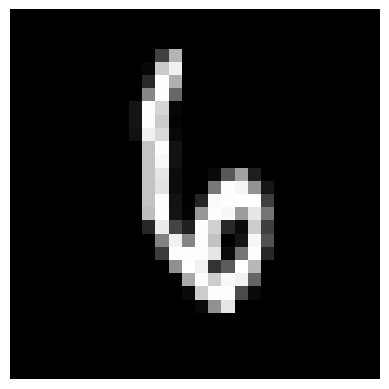

tensor([1, 3, 4, 9, 3, 1, 4, 7, 7, 4, 7, 2, 9, 3, 0, 8, 0, 8, 4, 0, 4, 4, 1, 5,
        2, 3, 5, 9, 9, 5, 2, 1, 1, 5, 8, 7, 9, 4, 2, 9, 6, 3, 5, 9, 3, 0, 9, 2,
        1, 9, 3, 3, 0, 6, 9, 8, 4, 0, 4, 9, 2, 9, 0, 1])
Predicted: 0, Actual: 8


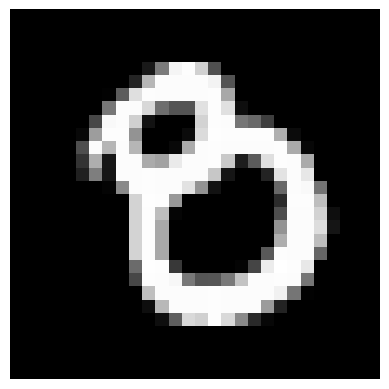

Predicted: 3, Actual: 8


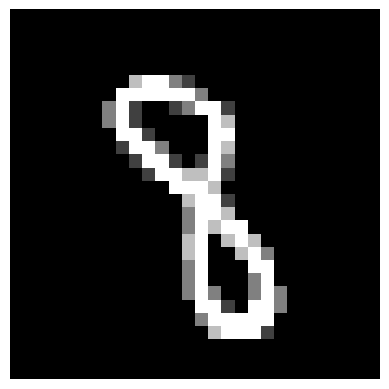

Predicted: 5, Actual: 3


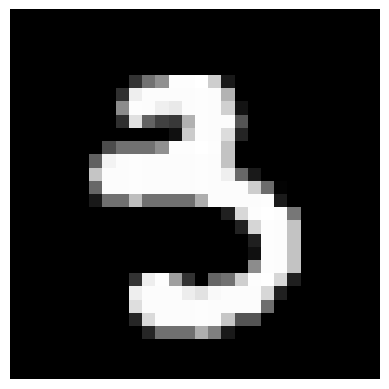

Predicted: 9, Actual: 4


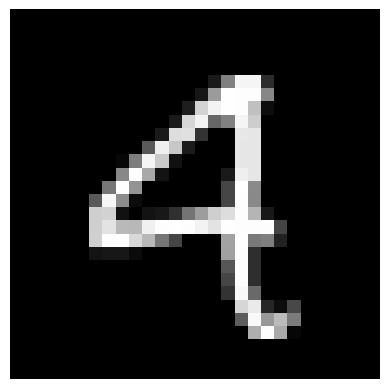

Predicted: 1, Actual: 8


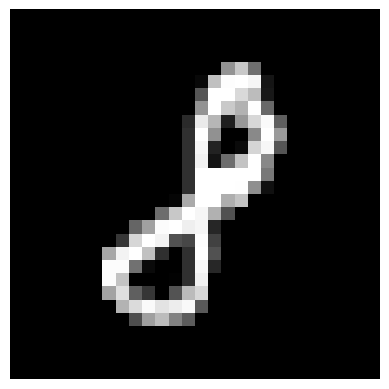

Predicted: 8, Actual: 3


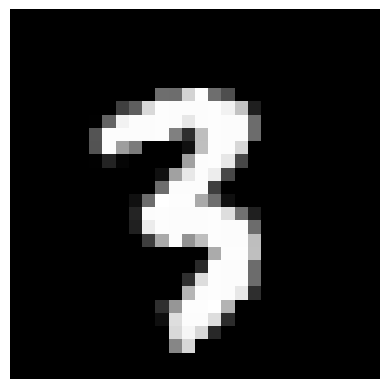

Predicted: 9, Actual: 5


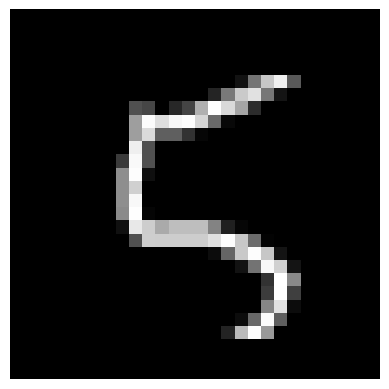

Predicted: 0, Actual: 5


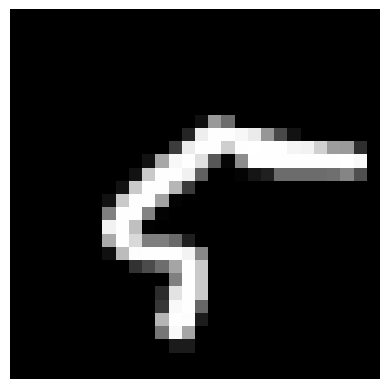

Predicted: 2, Actual: 3


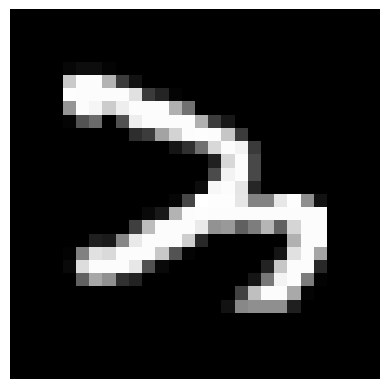

Predicted: 3, Actual: 5


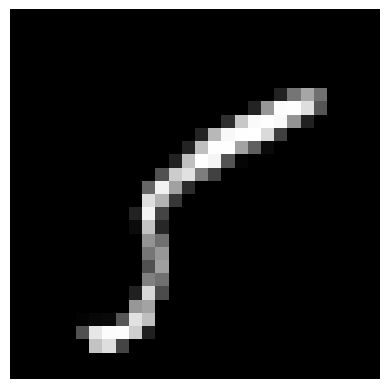

tensor([0, 7, 8, 6, 5, 8, 1, 5, 3, 5, 0, 3, 5, 8, 9, 2, 8, 7, 0, 4, 9, 1, 9, 7,
        7, 8, 3, 2, 0, 9, 1, 8, 6, 2, 3, 9, 6, 2, 1, 9, 1, 3, 5, 5, 0, 3, 9, 3,
        3, 7, 6, 5, 0, 1, 9, 0, 6, 9, 8, 1, 2, 1, 9, 5])
Predicted: 7, Actual: 3


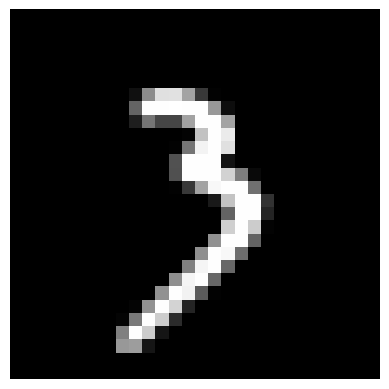

Predicted: 8, Actual: 1


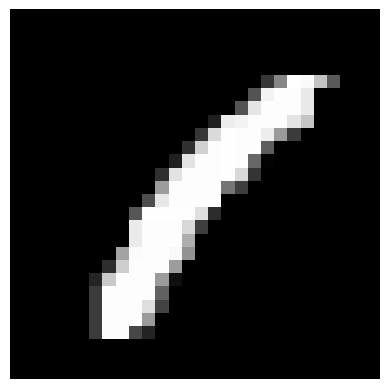

Predicted: 5, Actual: 3


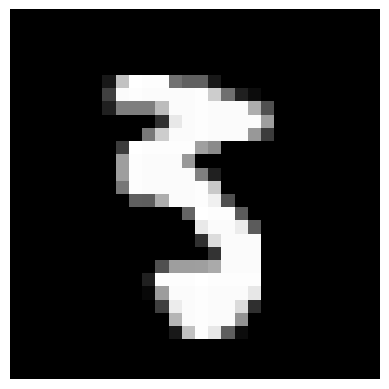

Predicted: 8, Actual: 5


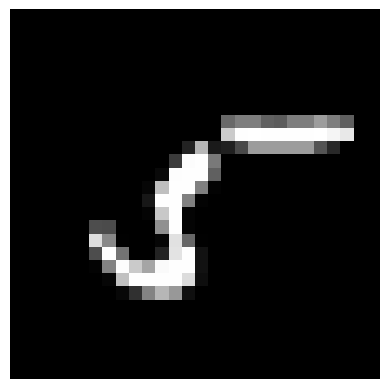

Predicted: 8, Actual: 5


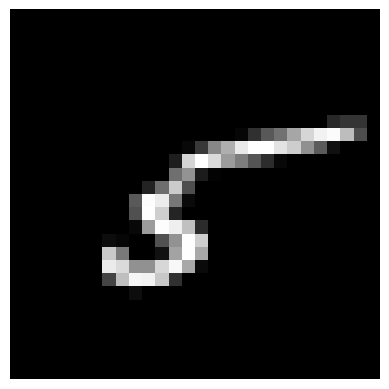

Predicted: 3, Actual: 5


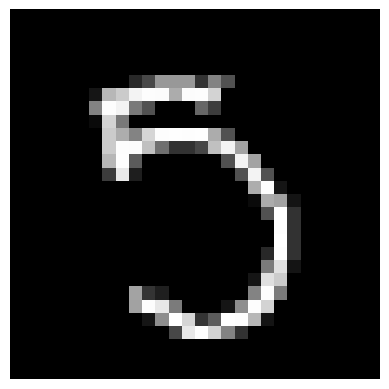

Predicted: 9, Actual: 8


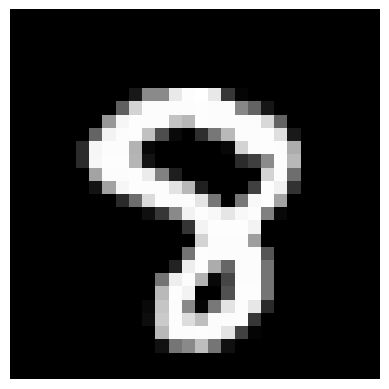

Predicted: 5, Actual: 6


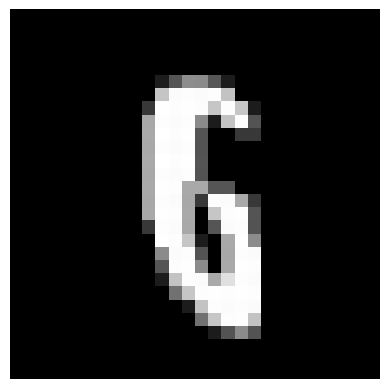

Predicted: 9, Actual: 4


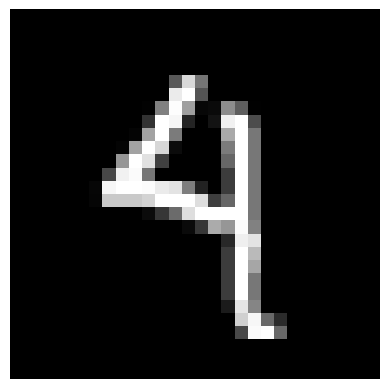

Predicted: 1, Actual: 9


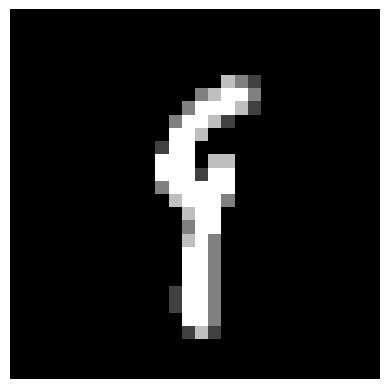

tensor([9, 7, 3, 7, 8, 0, 1, 3, 0, 4, 6, 1, 0, 2, 5, 8, 4, 4, 1, 1, 5, 4, 6, 6,
        0, 4, 9, 2, 6, 2, 7, 1, 7, 9, 4, 0, 0, 3, 8, 2, 2, 3, 1, 6, 0, 5, 7, 7,
        9, 2, 6, 7, 7, 7, 8, 6, 8, 8, 4, 6, 8, 4, 1, 2])
Predicted: 4, Actual: 6


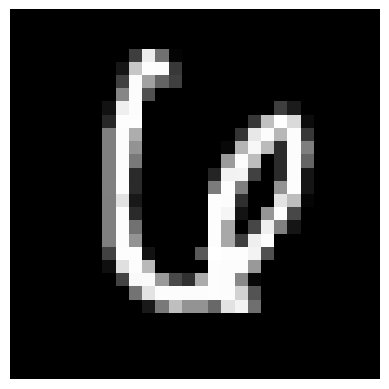

Predicted: 7, Actual: 9


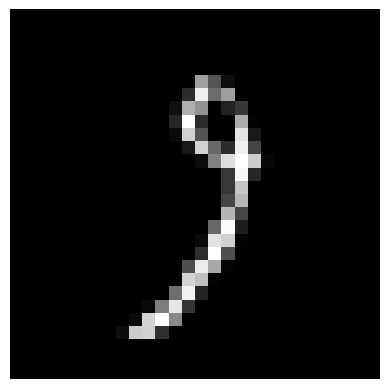

tensor([8, 2, 3, 9, 4, 0, 3, 7, 3, 2, 3, 3, 7, 3, 4, 0, 6, 2, 0, 8, 1, 5, 3, 5,
        4, 1, 7, 1, 5, 7, 3, 7, 3, 2, 2, 7, 3, 7, 5, 7, 8, 5, 6, 5, 2, 9, 6, 5,
        3, 6, 7, 4, 1, 7, 1, 5, 2, 3, 0, 3, 1, 9, 2, 6])
Predicted: 2, Actual: 1


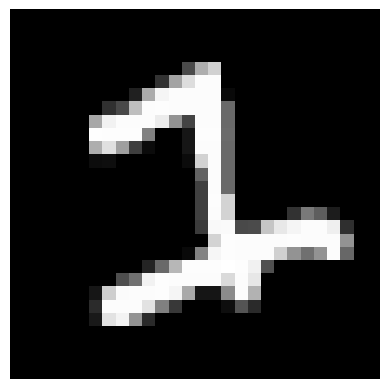

Predicted: 3, Actual: 5


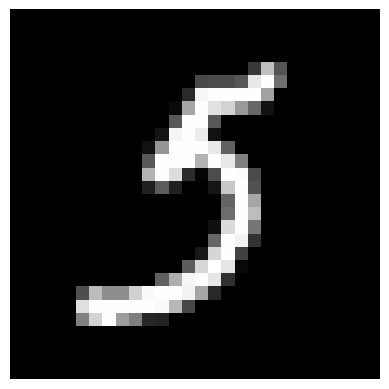

Predicted: 5, Actual: 3


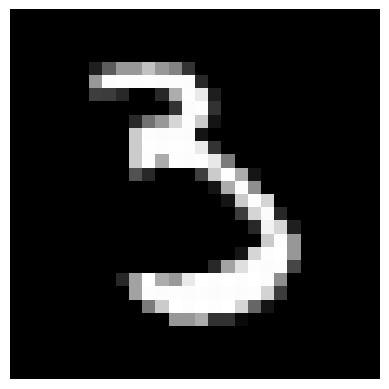

Predicted: 6, Actual: 4


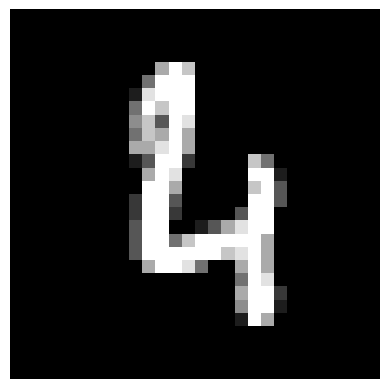

Predicted: 9, Actual: 5


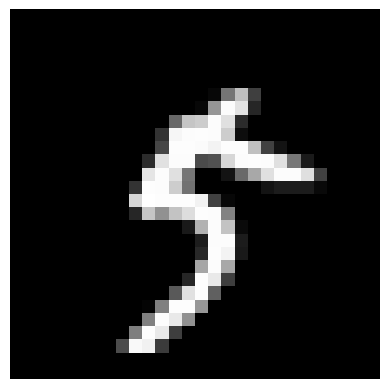

Predicted: 0, Actual: 6


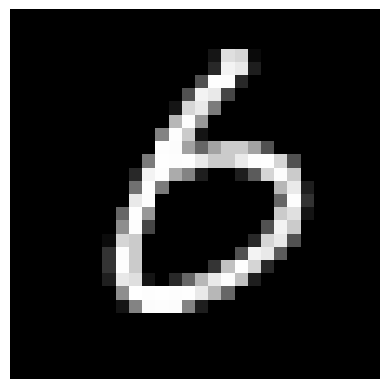

Predicted: 9, Actual: 4


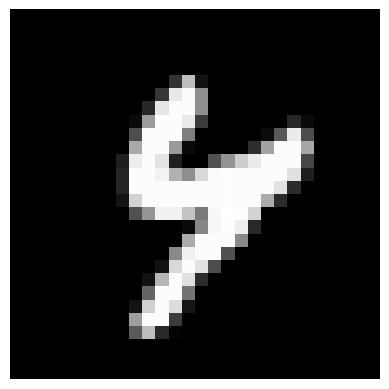

tensor([9, 4, 0, 3, 0, 6, 2, 1, 6, 9, 5, 9, 1, 9, 3, 1, 1, 8, 4, 4, 6, 3, 8, 6,
        4, 7, 7, 8, 6, 9, 9, 3, 9, 4, 0, 5, 4, 6, 4, 1, 3, 3, 0, 0, 2, 6, 6, 5,
        7, 0, 8, 6, 4, 4, 9, 0, 7, 2, 4, 2, 1, 8, 8, 5])
Predicted: 9, Actual: 7


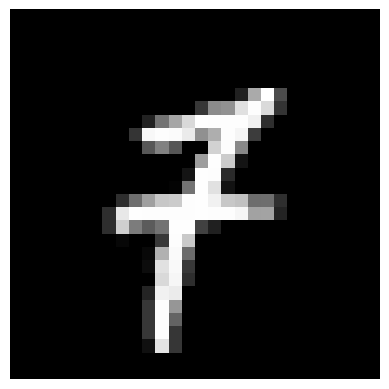

Predicted: 0, Actual: 3


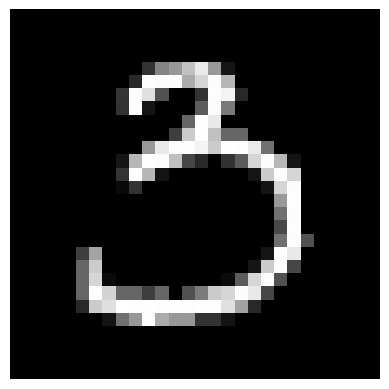

Predicted: 3, Actual: 8


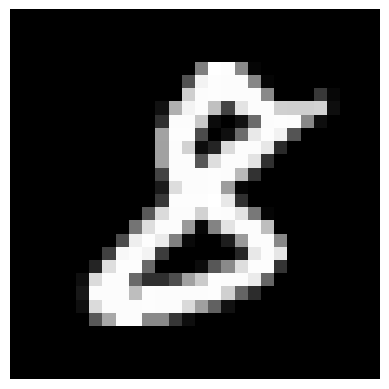

Predicted: 9, Actual: 5


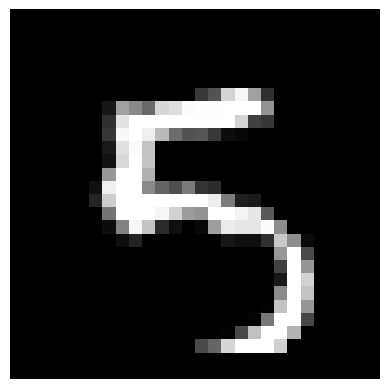

Predicted: 5, Actual: 3


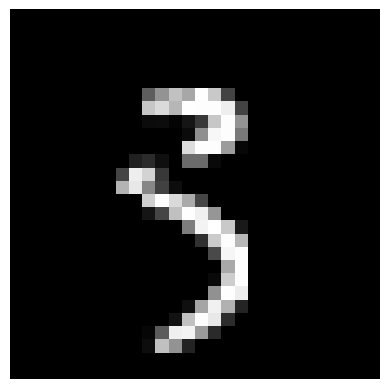

Predicted: 1, Actual: 2


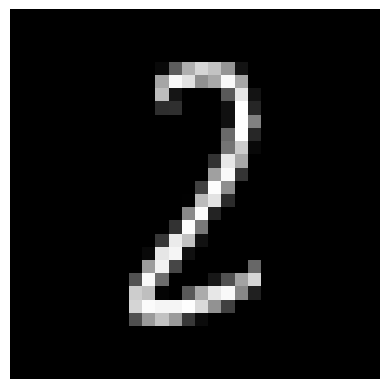

Predicted: 3, Actual: 5


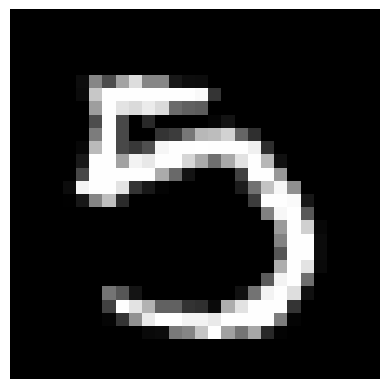

Predicted: 4, Actual: 9


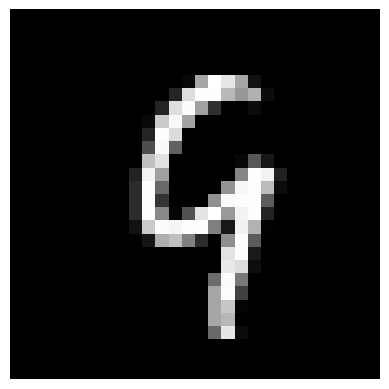

Predicted: 9, Actual: 7


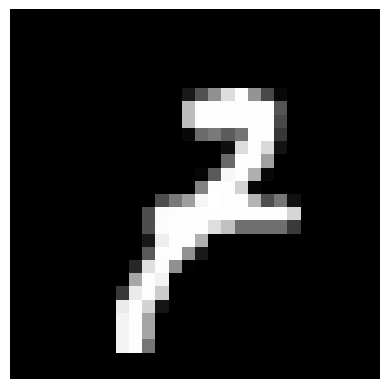

Predicted: 3, Actual: 2


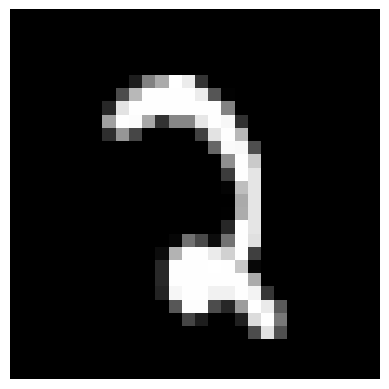

Predicted: 4, Actual: 7


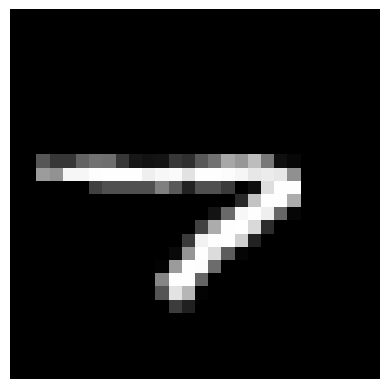

Predicted: 2, Actual: 3


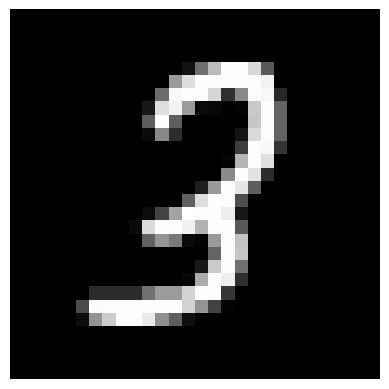

tensor([9, 2, 7, 1, 8, 3, 3, 2, 7, 6, 0, 1, 2, 7, 1, 0, 8, 3, 5, 0, 5, 3, 6, 2,
        8, 1, 0, 1, 4, 2, 1, 1, 4, 4, 4, 4, 7, 1, 6, 2, 3, 9, 0, 0, 1, 1, 8, 4,
        3, 4, 2, 0, 5, 1, 5, 1, 2, 2, 2, 1, 2, 3, 1, 8])
Predicted: 3, Actual: 8


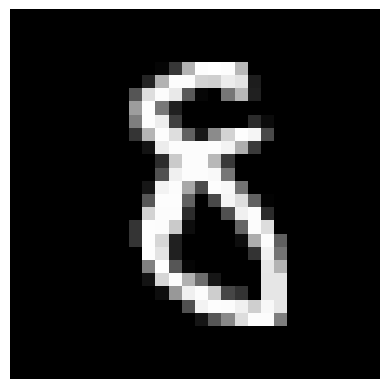

Predicted: 3, Actual: 8


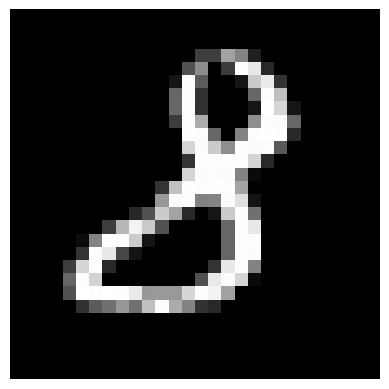

Predicted: 5, Actual: 6


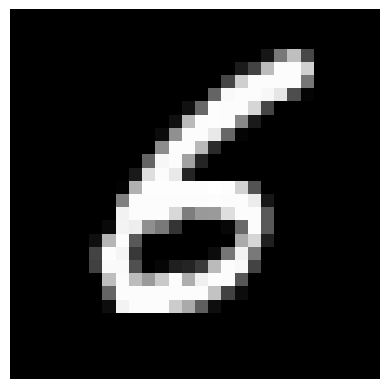

Predicted: 1, Actual: 7


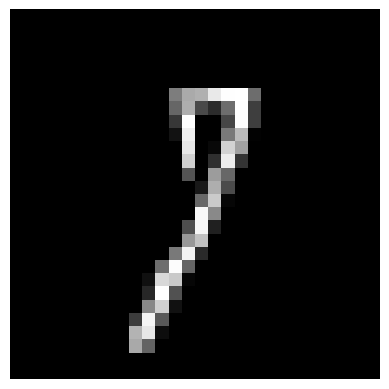

Predicted: 3, Actual: 9


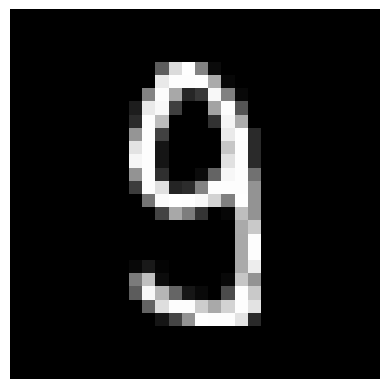

Predicted: 1, Actual: 8


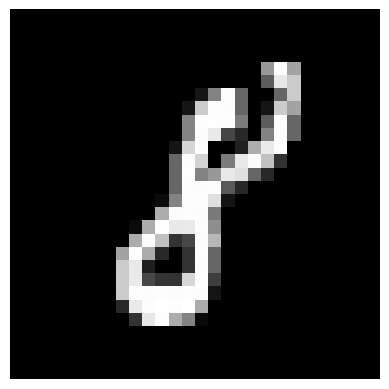

Predicted: 5, Actual: 6


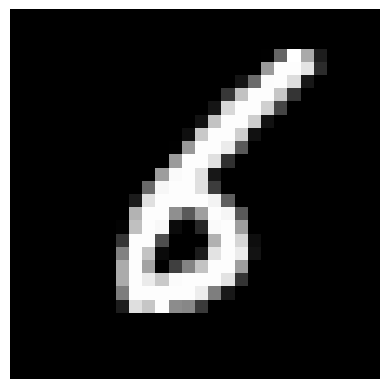

Predicted: 5, Actual: 6


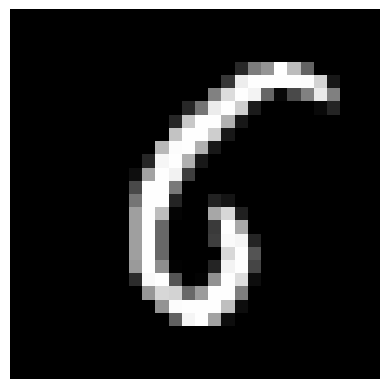

Predicted: 1, Actual: 7


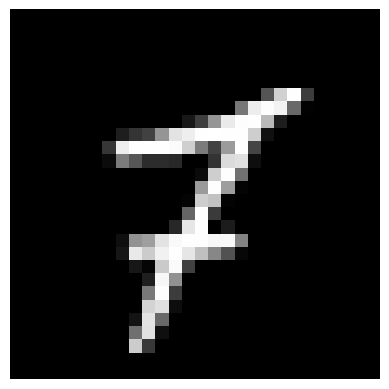

tensor([1, 0, 0, 2, 1, 0, 6, 0, 1, 6, 2, 5, 1, 7, 4, 8, 3, 1, 4, 3, 8, 3, 9, 9,
        4, 7, 3, 4, 7, 2, 7, 5, 7, 0, 4, 3, 3, 2, 4, 7, 6, 0, 0, 6, 7, 7, 0, 5,
        5, 8, 1, 0, 4, 0, 2, 9, 1, 5, 0, 5, 8, 0, 3, 2])
Predicted: 0, Actual: 6


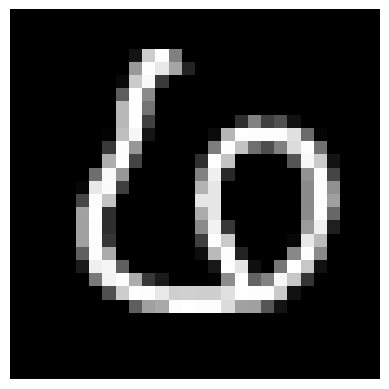

Predicted: 3, Actual: 2


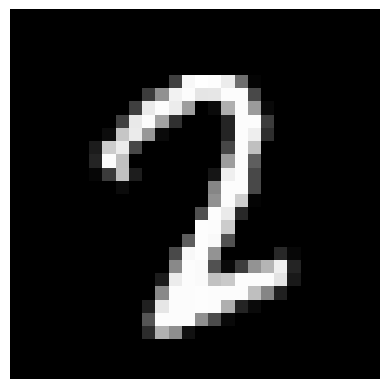

Predicted: 7, Actual: 8


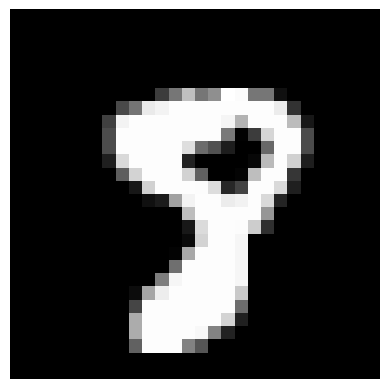

Predicted: 4, Actual: 6


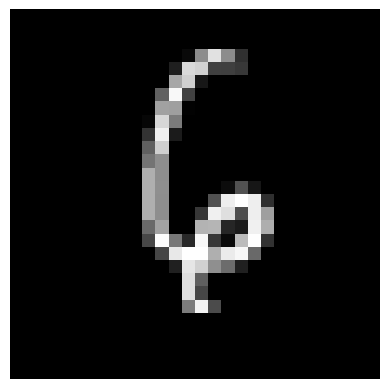

Predicted: 4, Actual: 7


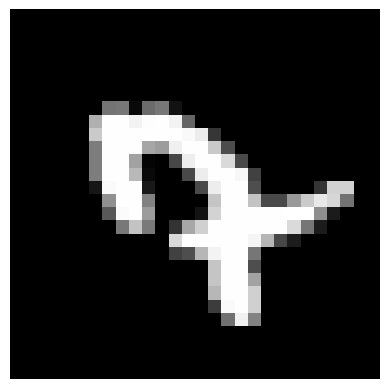

Predicted: 9, Actual: 8


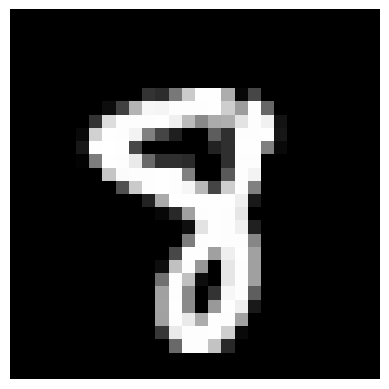

Predicted: 5, Actual: 8


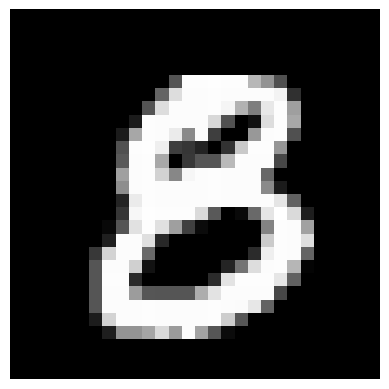

tensor([7, 3, 3, 6, 4, 9, 5, 5, 5, 2, 4, 2, 8, 4, 6, 8, 6, 5, 0, 0, 8, 7, 6, 1,
        7, 1, 1, 2, 7, 4, 5, 0, 7, 7, 6, 3, 8, 6, 4, 2, 0, 7, 4, 0, 5, 7, 8, 2,
        9, 4, 7, 1, 1, 2, 6, 6, 6, 9, 1, 9, 9, 8, 3, 6])
Predicted: 3, Actual: 7


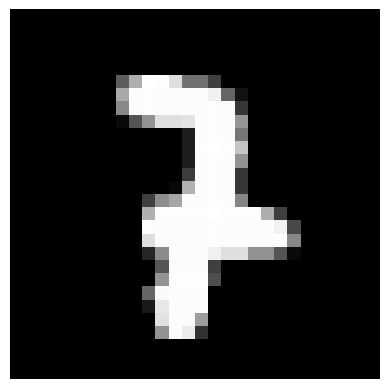

Predicted: 3, Actual: 2


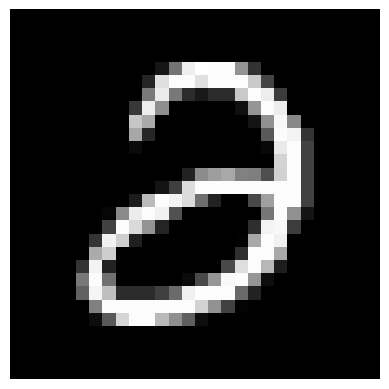

Predicted: 9, Actual: 7


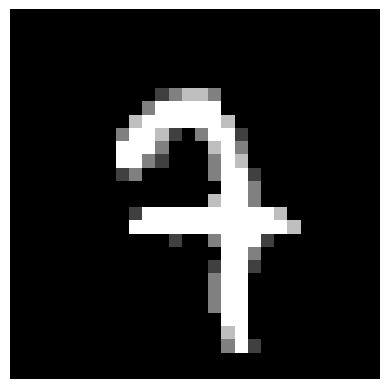

Predicted: 4, Actual: 9


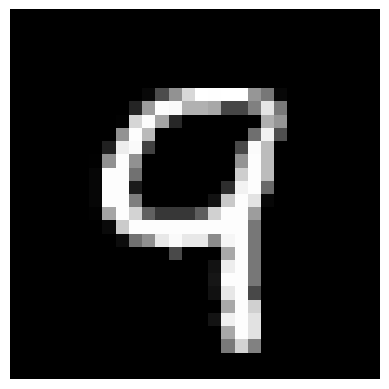

Predicted: 5, Actual: 0


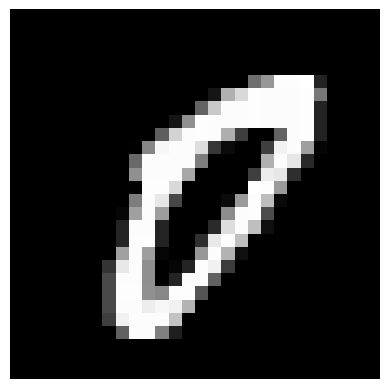

Predicted: 7, Actual: 9


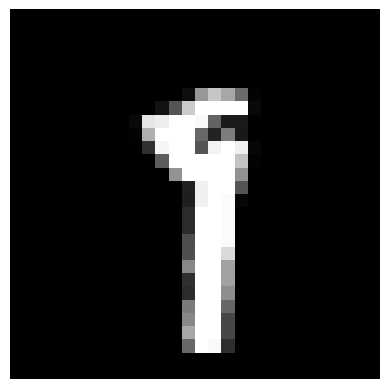

Predicted: 9, Actual: 7


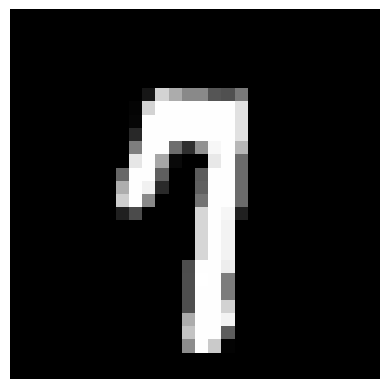

Predicted: 2, Actual: 3


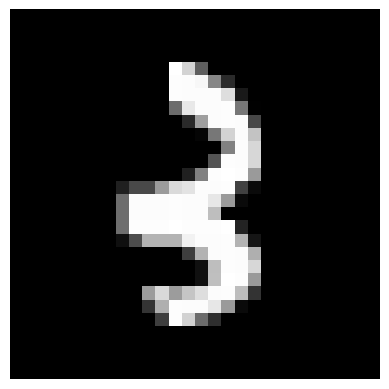

Predicted: 6, Actual: 2


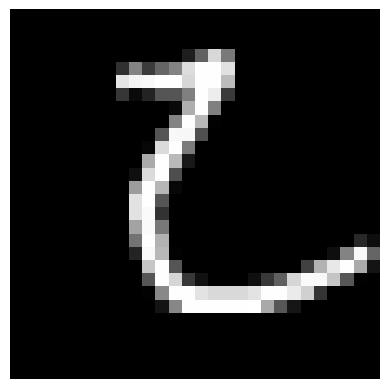

Predicted: 9, Actual: 4


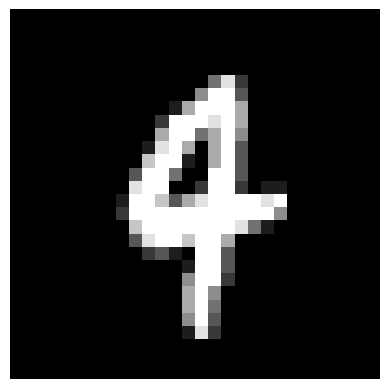

tensor([9, 5, 2, 6, 2, 4, 6, 7, 7, 0, 6, 6, 9, 4, 8, 3, 5, 3, 4, 9, 0, 0, 3, 2,
        5, 0, 7, 1, 1, 1, 6, 7, 6, 7, 9, 6, 6, 9, 1, 4, 3, 1, 1, 2, 7, 9, 1, 0,
        8, 7, 6, 3, 4, 0, 0, 4, 3, 3, 5, 7, 1, 7, 1, 1])
Predicted: 2, Actual: 9


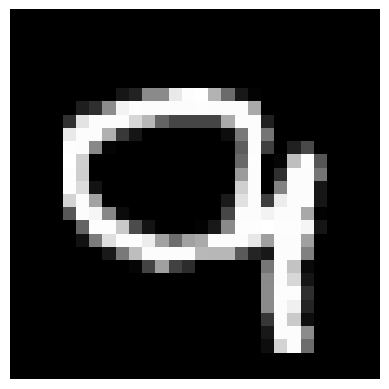

Predicted: 3, Actual: 5


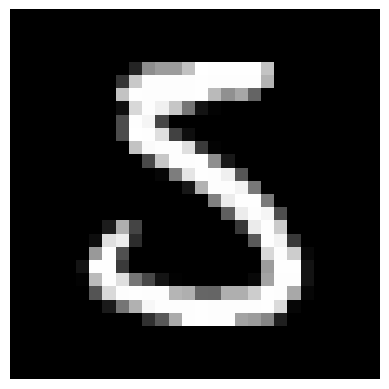

Predicted: 9, Actual: 4


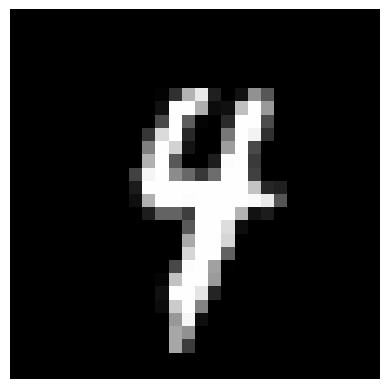

Predicted: 7, Actual: 2


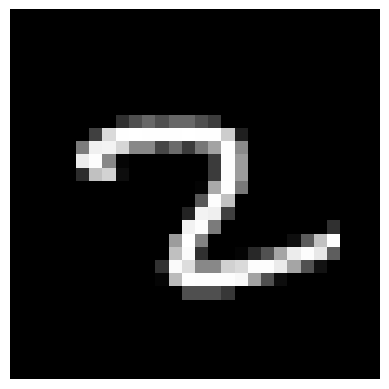

Predicted: 9, Actual: 4


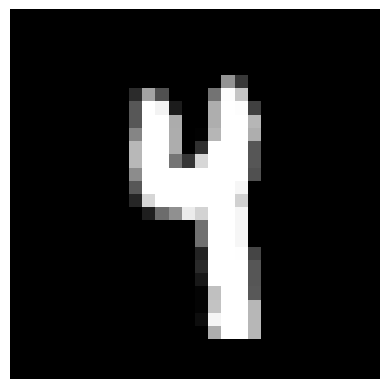

Predicted: 4, Actual: 6


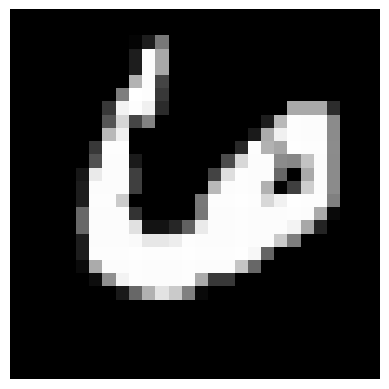

Predicted: 5, Actual: 0


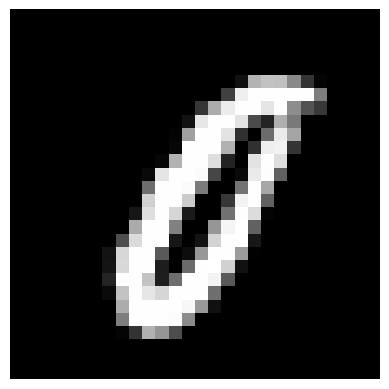

tensor([3, 1, 0, 9, 9, 7, 5, 4, 1, 4, 8, 9, 4, 3, 5, 1, 9, 8, 2, 7, 3, 9, 9, 0,
        1, 0, 2, 9, 3, 9, 3, 3, 6, 2, 9, 9, 8, 3, 1, 4, 0, 4, 9, 8, 4, 9, 8, 8,
        9, 7, 6, 9, 2, 8, 2, 7, 0, 2, 2, 3, 8, 4, 6, 3])
Predicted: 4, Actual: 5


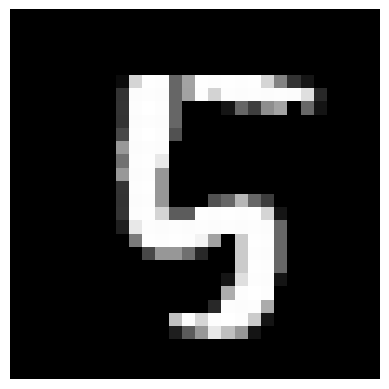

Predicted: 7, Actual: 3


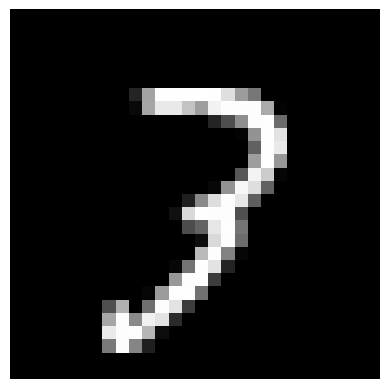

Predicted: 9, Actual: 4


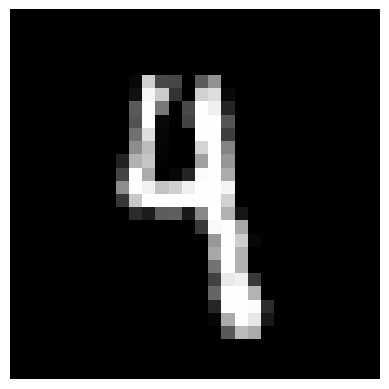

Predicted: 1, Actual: 7


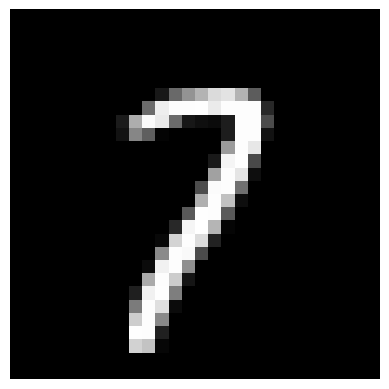

Predicted: 9, Actual: 7


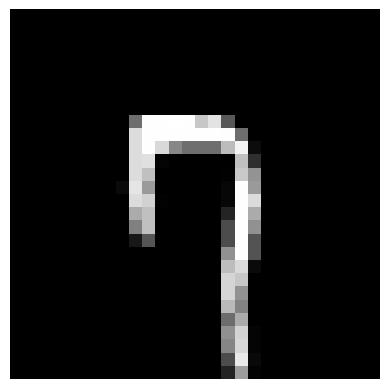

Predicted: 8, Actual: 9


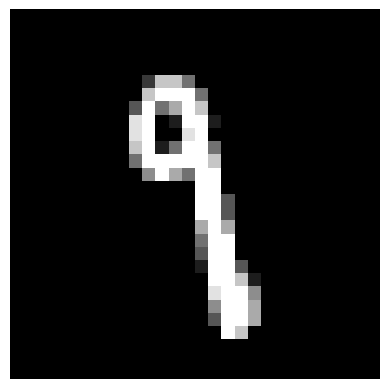

Predicted: 6, Actual: 5


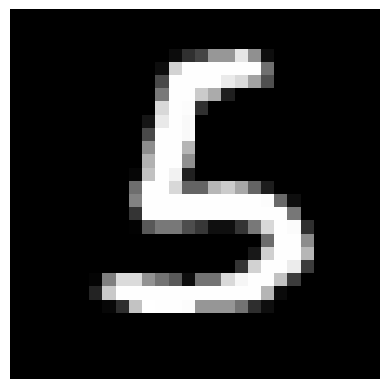

Predicted: 7, Actual: 2


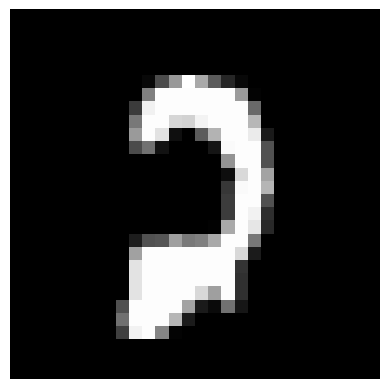

Predicted: 3, Actual: 8


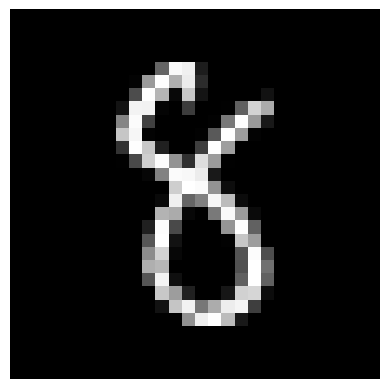

tensor([4, 8, 2, 4, 6, 2, 9, 3, 3, 9, 4, 3, 1, 4, 4, 7, 0, 5, 9, 6, 0, 4, 4, 6,
        4, 6, 1, 2, 3, 2, 6, 4, 0, 9, 6, 8, 4, 6, 0, 8, 6, 4, 1, 8, 6, 8, 2, 5,
        4, 5, 5, 4, 7, 4, 0, 7, 8, 2, 7, 3, 1, 0, 1, 3])
Predicted: 4, Actual: 6


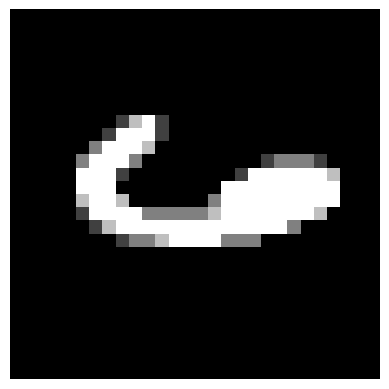

Predicted: 2, Actual: 7


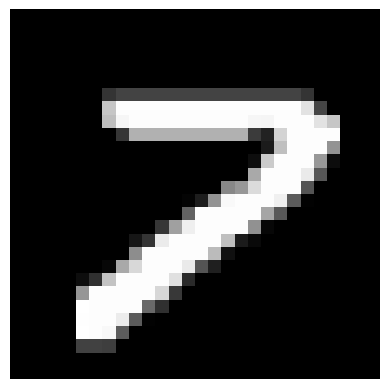

Predicted: 6, Actual: 4


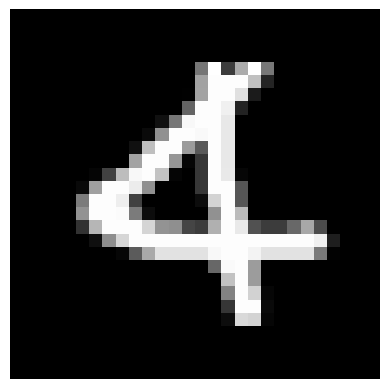

Predicted: 2, Actual: 3


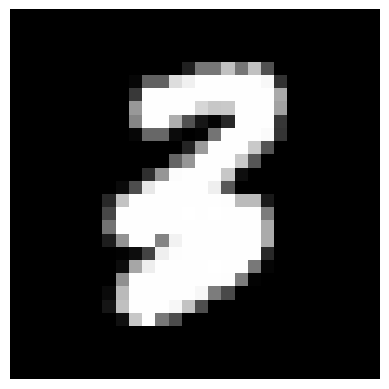

Predicted: 0, Actual: 5


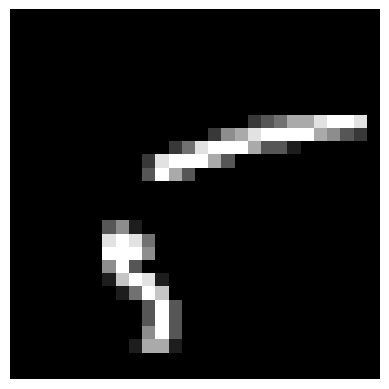

Predicted: 4, Actual: 5


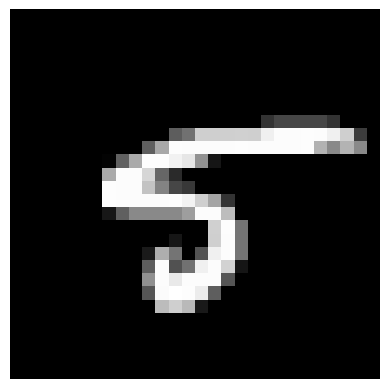

Predicted: 0, Actual: 5


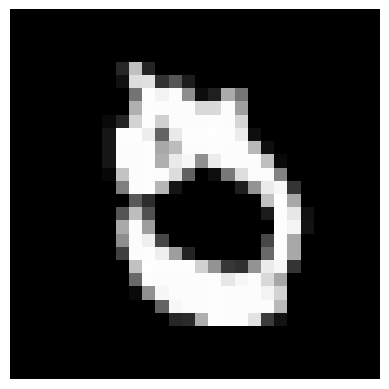

Predicted: 8, Actual: 5


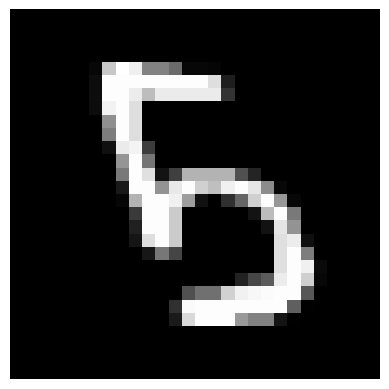

Predicted: 5, Actual: 8


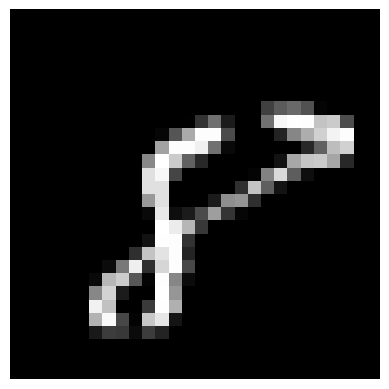

Predicted: 4, Actual: 7


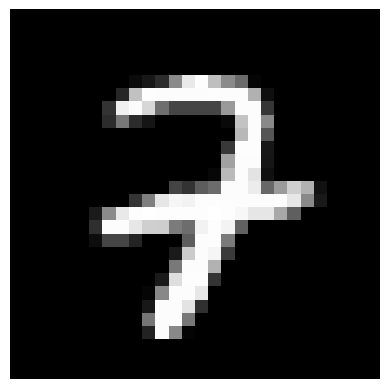

Predicted: 7, Actual: 2


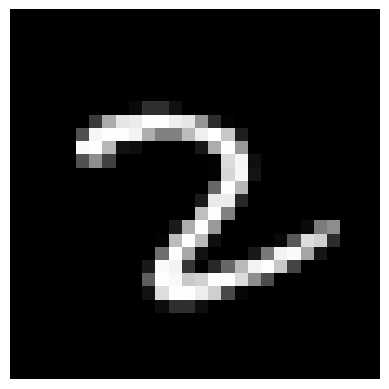

Predicted: 1, Actual: 7


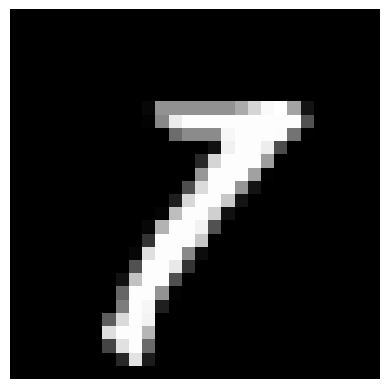

Predicted: 3, Actual: 8


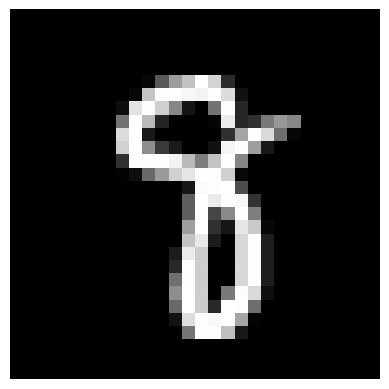

tensor([0, 7, 1, 9, 8, 7, 5, 5, 9, 1, 7, 5, 4, 3, 8, 3, 2, 1, 6, 6, 0, 1, 1, 4,
        0, 7, 4, 2, 4, 0, 4, 4, 7, 6, 9, 5, 3, 4, 6, 5, 0, 1, 3, 8, 2, 3, 3, 5,
        7, 8, 0, 8, 9, 7, 1, 1, 0, 1, 3, 7, 8, 9, 0, 7])
Predicted: 3, Actual: 9


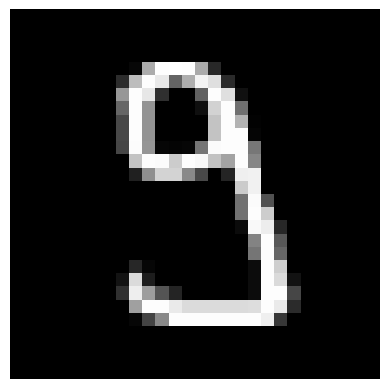

Predicted: 8, Actual: 1


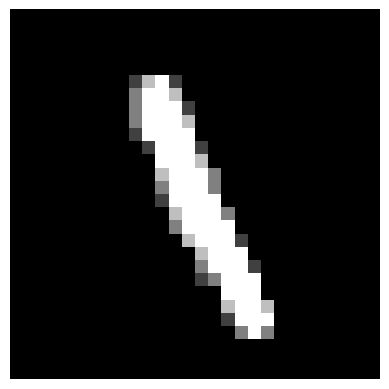

Predicted: 3, Actual: 2


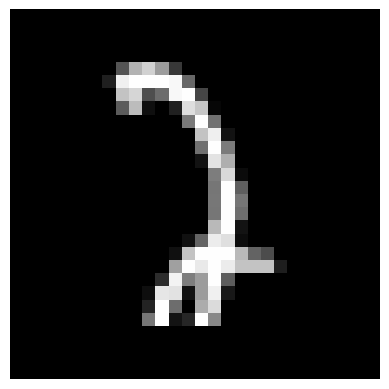

Predicted: 0, Actual: 7


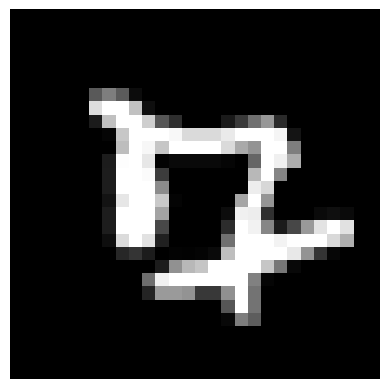

Predicted: 4, Actual: 6


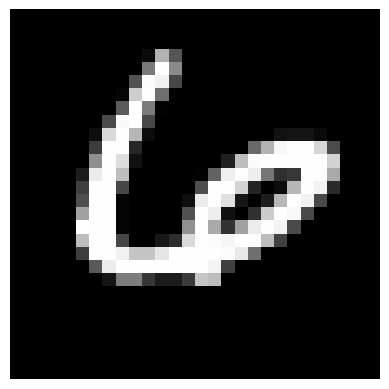

Predicted: 3, Actual: 8


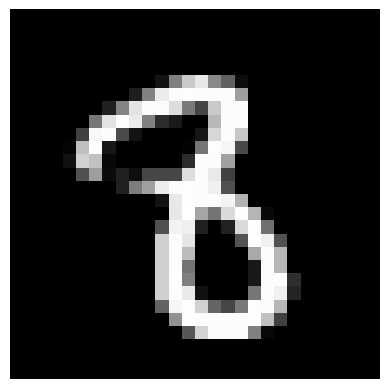

Predicted: 3, Actual: 8


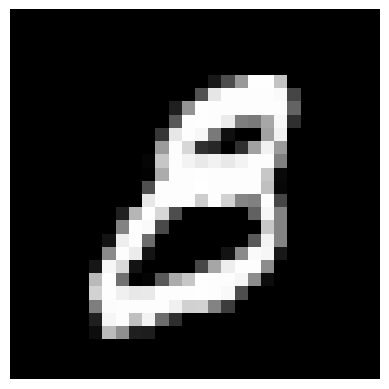

Predicted: 9, Actual: 5


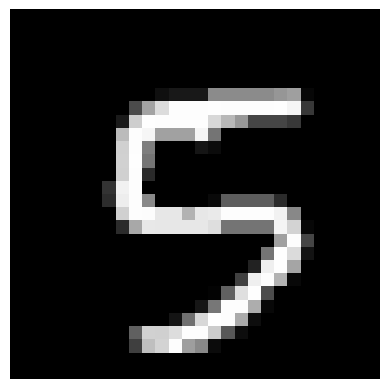

Predicted: 9, Actual: 5


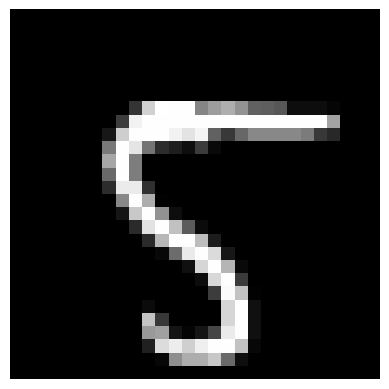

tensor([1, 1, 0, 1, 1, 4, 8, 2, 7, 6, 2, 3, 0, 2, 5, 5, 4, 6, 9, 7, 2, 1, 3, 6,
        4, 1, 8, 2, 4, 0, 5, 1, 0, 3, 2, 6, 4, 0, 3, 4, 6, 1, 6, 5, 7, 9, 2, 0,
        2, 6, 0, 1, 4, 3, 3, 2, 8, 8, 0, 8, 8, 9, 0, 9])
Predicted: 8, Actual: 5


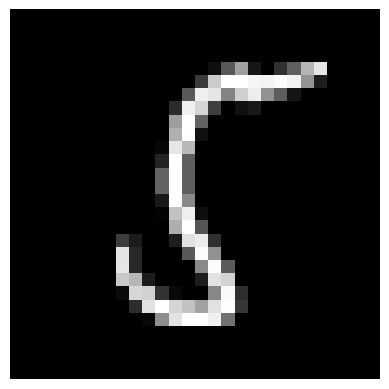

Predicted: 5, Actual: 8


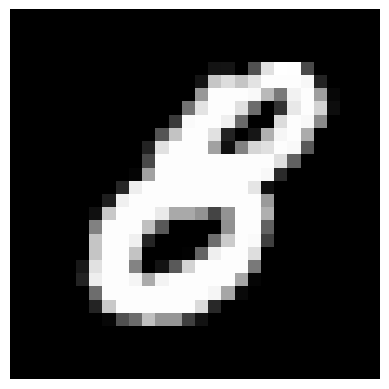

Predicted: 4, Actual: 9


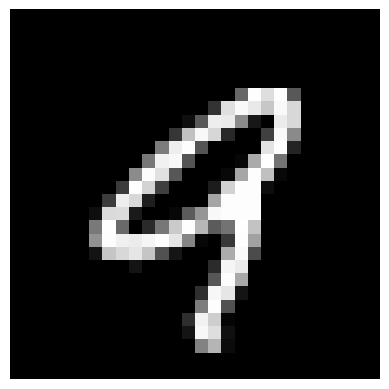

Predicted: 3, Actual: 2


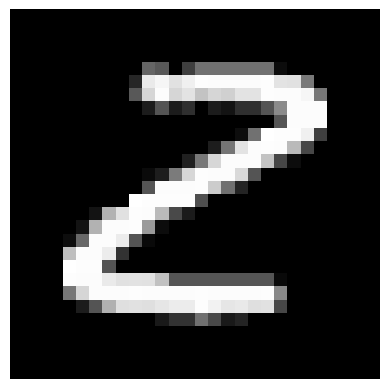

Predicted: 0, Actual: 4


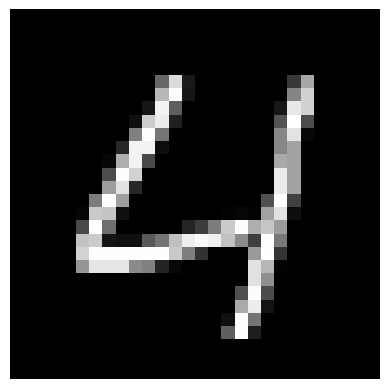

Predicted: 4, Actual: 9


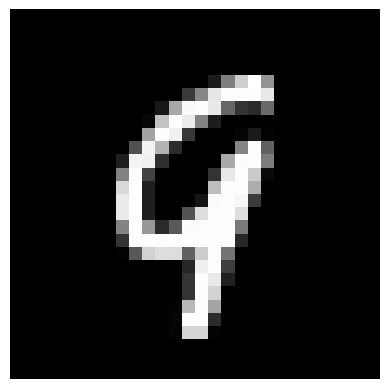

Predicted: 3, Actual: 5


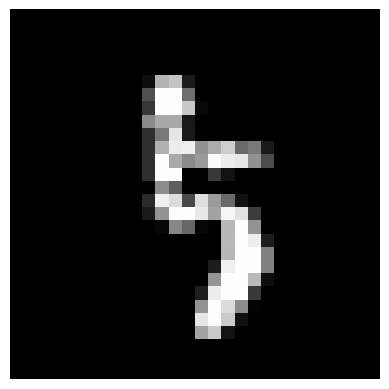

tensor([6, 7, 6, 3, 3, 3, 9, 7, 7, 7, 4, 9, 0, 4, 9, 5, 4, 2, 9, 2, 1, 1, 0, 0,
        7, 8, 3, 3, 3, 1, 3, 7, 6, 1, 3, 1, 5, 0, 5, 1, 2, 7, 5, 9, 5, 1, 4, 9,
        9, 1, 6, 9, 0, 1, 3, 2, 0, 7, 4, 8, 2, 2, 0, 2])
Predicted: 3, Actual: 9


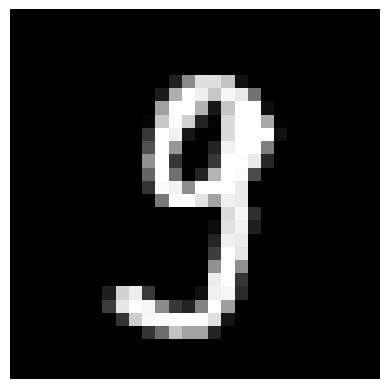

Predicted: 9, Actual: 4


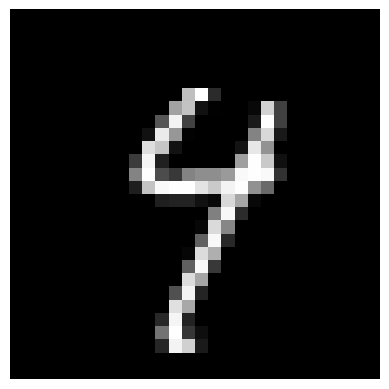

Predicted: 4, Actual: 6


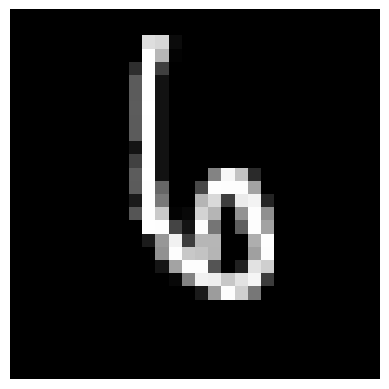

Predicted: 9, Actual: 4


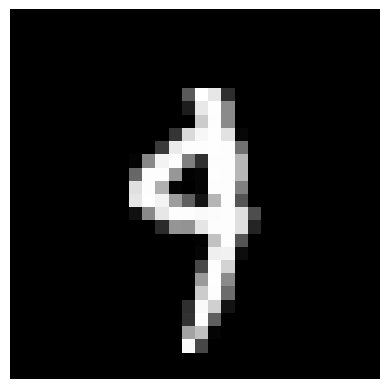

Predicted: 5, Actual: 8


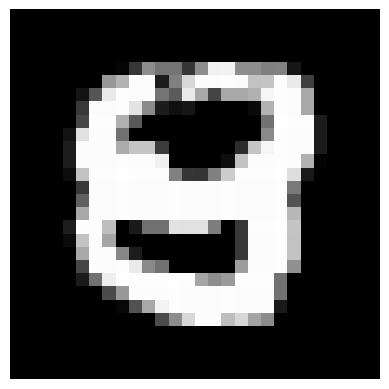

Predicted: 9, Actual: 7


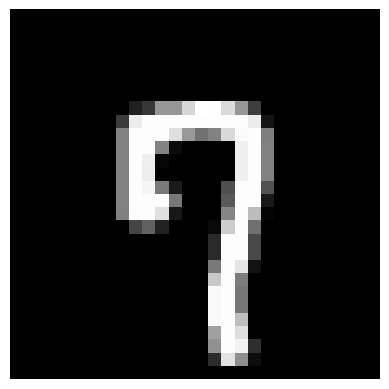

Predicted: 1, Actual: 8


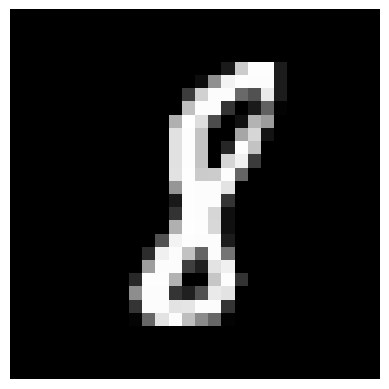

Predicted: 5, Actual: 6


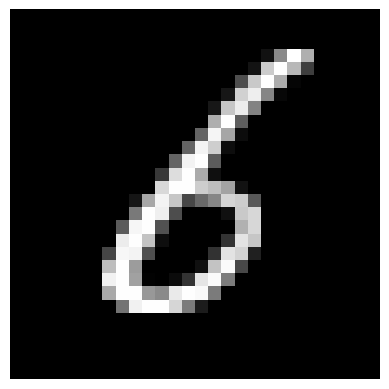

Predicted: 0, Actual: 6


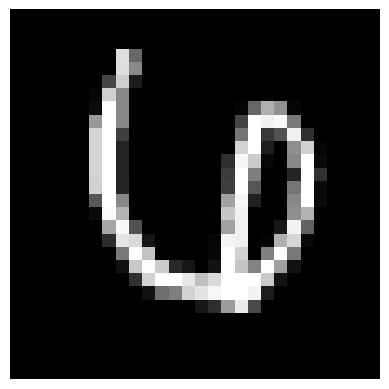

Predicted: 1, Actual: 7


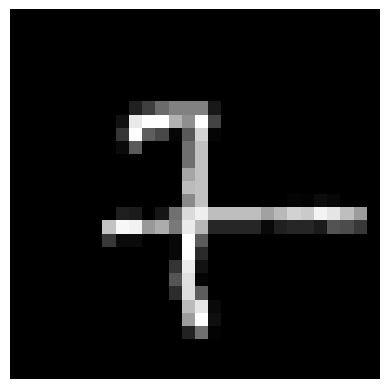

Predicted: 2, Actual: 4


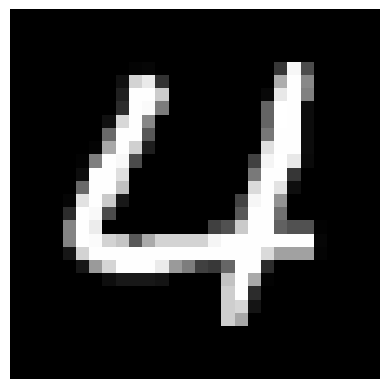

Predicted: 1, Actual: 8


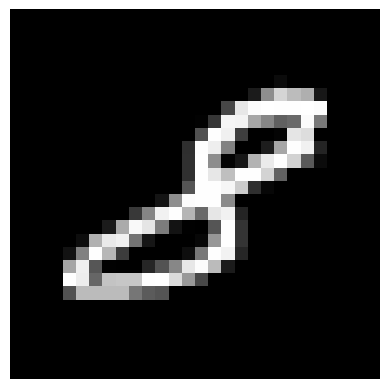

Predicted: 9, Actual: 5


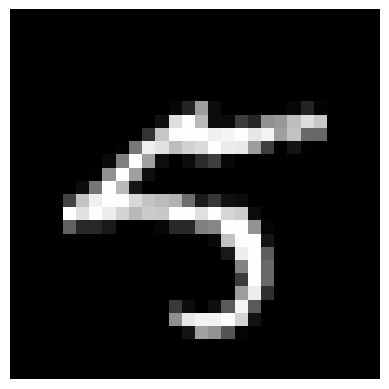

Predicted: 2, Actual: 7


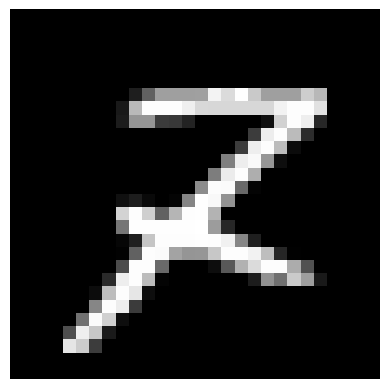

Predicted: 7, Actual: 3


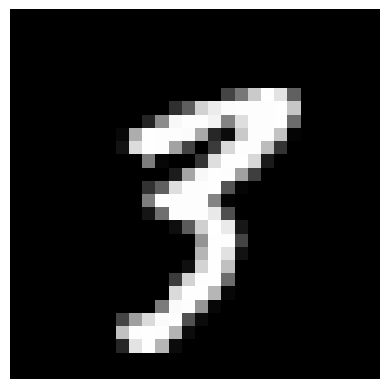

tensor([8, 1, 6, 1, 6, 8, 8, 9, 1, 2, 1, 3, 5, 1, 0, 9, 4, 4, 3, 3, 8, 5, 9, 7,
        6, 0, 2, 0, 0, 0, 4, 8, 8, 1, 5, 3, 3, 8, 5, 1, 8, 4, 0, 4, 0, 4, 6, 2,
        3, 3, 5, 6, 4, 8, 0, 9, 2, 8, 3, 2, 4, 5, 1, 8])
Predicted: 8, Actual: 5


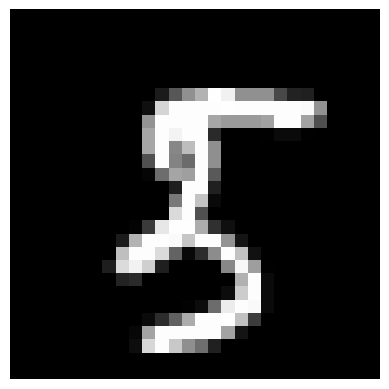

Predicted: 6, Actual: 5


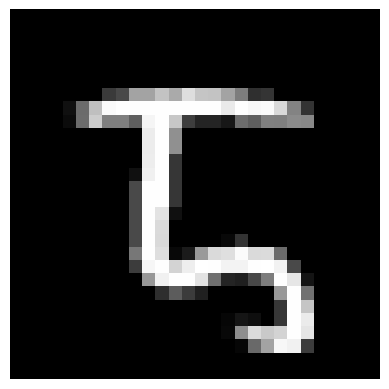

Predicted: 6, Actual: 4


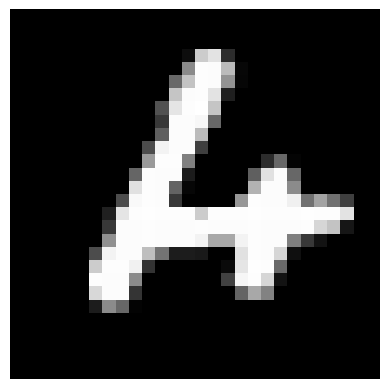

Predicted: 3, Actual: 8


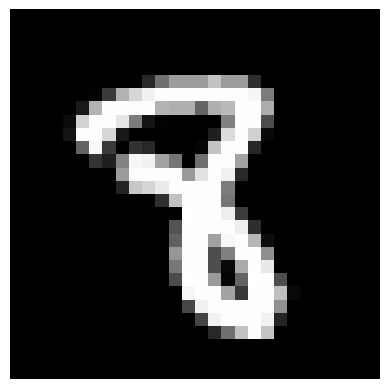

Predicted: 8, Actual: 2


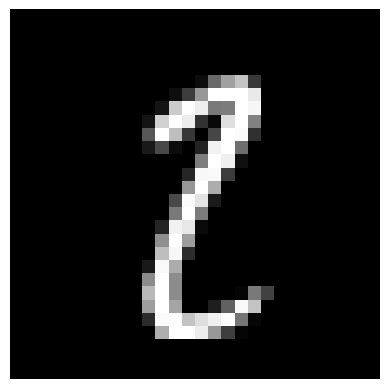

Predicted: 0, Actual: 6


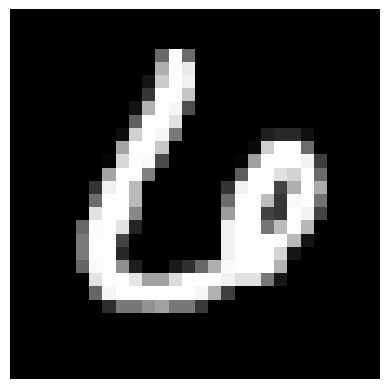

Predicted: 4, Actual: 5


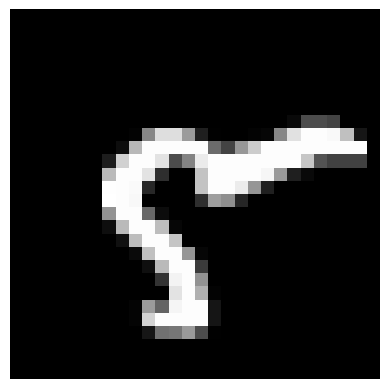

Predicted: 8, Actual: 7


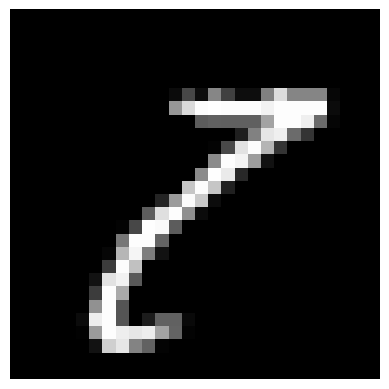

Predicted: 3, Actual: 2


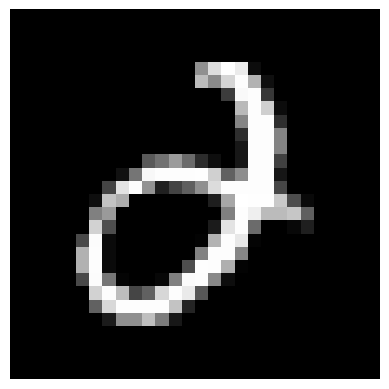

Predicted: 4, Actual: 2


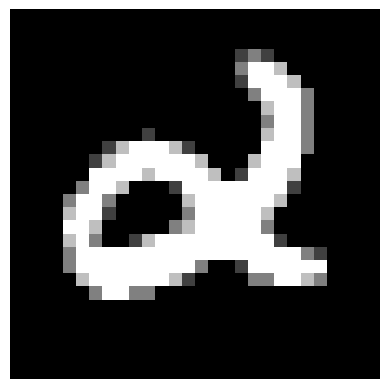

Predicted: 0, Actual: 9


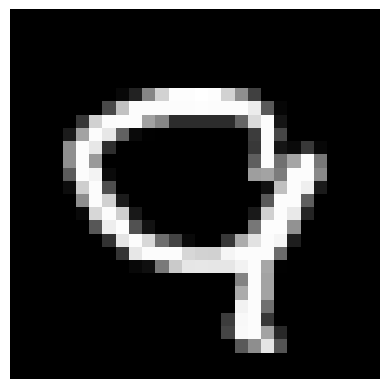

Predicted: 4, Actual: 9


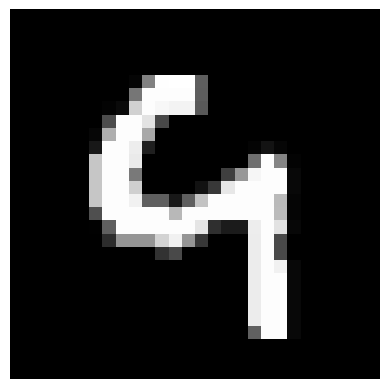

Predicted: 2, Actual: 6


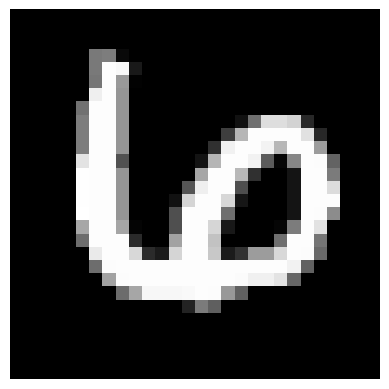

Predicted: 4, Actual: 7


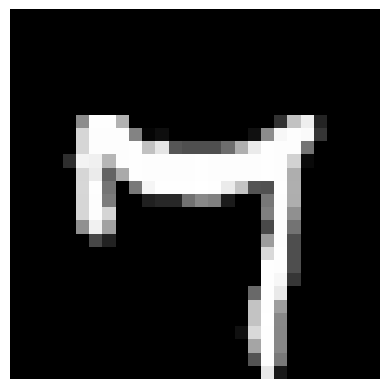

Predicted: 1, Actual: 7


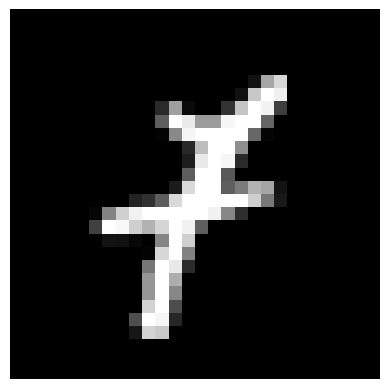

Predicted: 8, Actual: 2


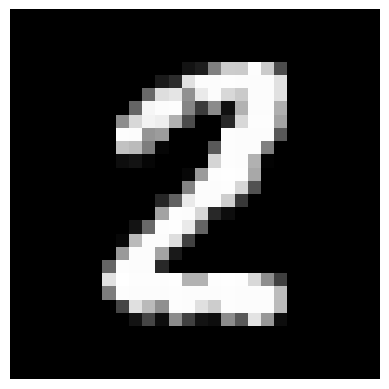

tensor([9, 4, 9, 1, 2, 8, 2, 0, 3, 0, 4, 1, 1, 5, 7, 0, 9, 9, 1, 9, 5, 9, 3, 5,
        0, 4, 1, 0, 8, 4, 0, 8, 9, 8, 9, 4, 8, 5, 7, 0, 8, 9, 8, 0, 2, 9, 6, 8,
        9, 9, 5, 9, 8, 6, 1, 0, 3, 3, 5, 2, 1, 6, 3, 0])
Predicted: 2, Actual: 6


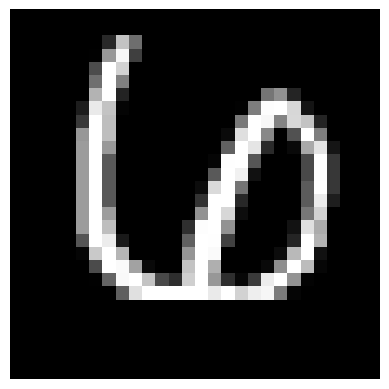

Predicted: 3, Actual: 7


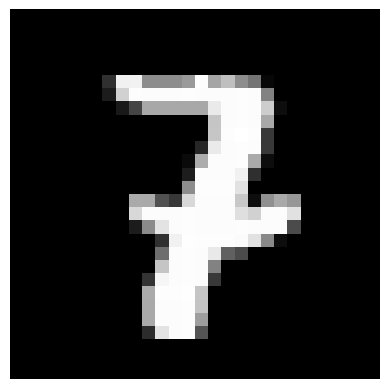

Predicted: 4, Actual: 9


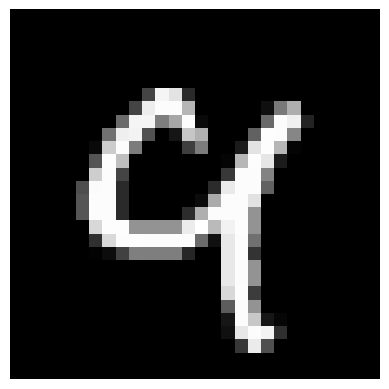

Predicted: 5, Actual: 6


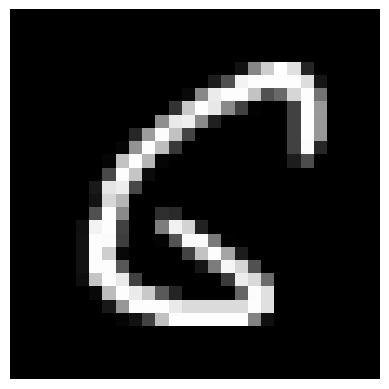

Predicted: 0, Actual: 5


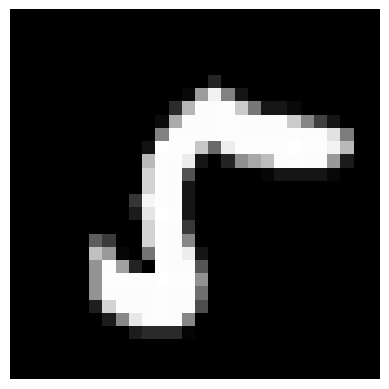

Predicted: 3, Actual: 2


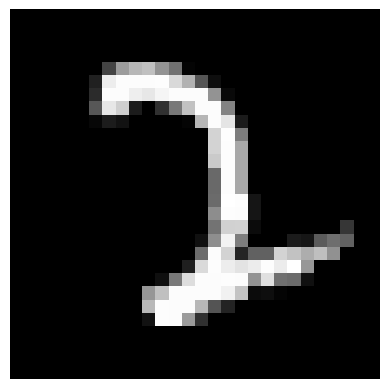

Predicted: 4, Actual: 9


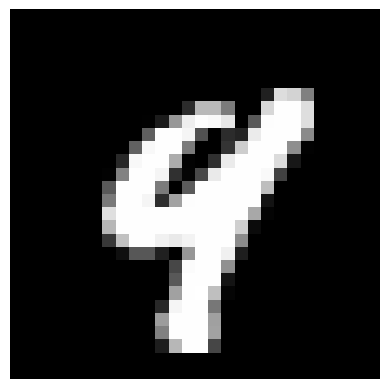

Predicted: 8, Actual: 2


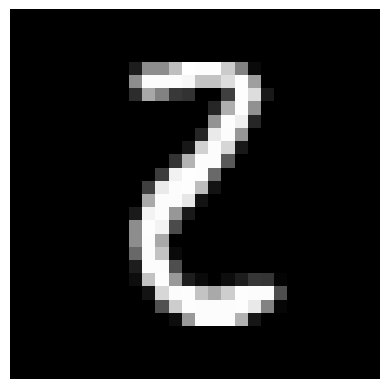

Predicted: 0, Actual: 9


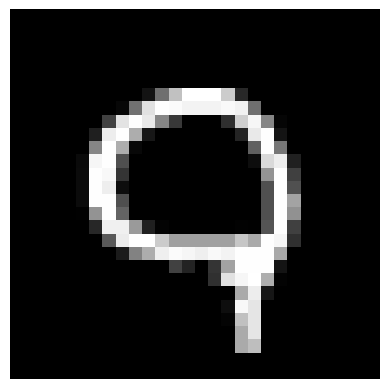

Predicted: 2, Actual: 9


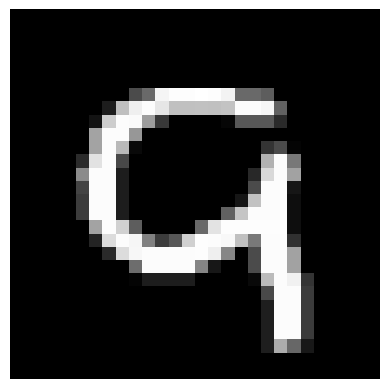

Predicted: 6, Actual: 5


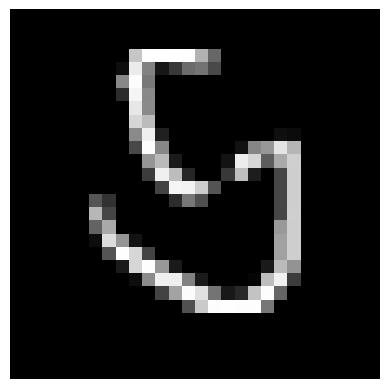

Predicted: 3, Actual: 5


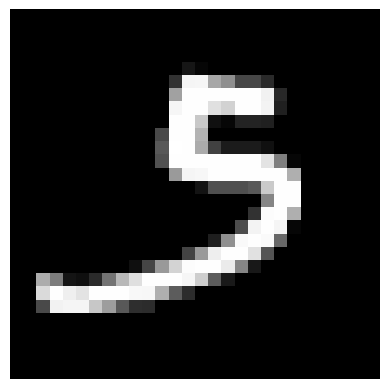

tensor([2, 8, 3, 5, 6, 2, 3, 0, 2, 2, 6, 4, 3, 5, 5, 1, 7, 2, 1, 6, 9, 1, 3, 9,
        5, 5, 1, 6, 2, 2, 8, 6, 7, 1, 4, 6, 0, 6, 0, 5, 3, 2, 1, 3, 6, 8, 9, 8,
        3, 3, 9, 5, 4, 5, 2, 0, 5, 6, 4, 2, 8, 3, 9, 9])
Predicted: 3, Actual: 1


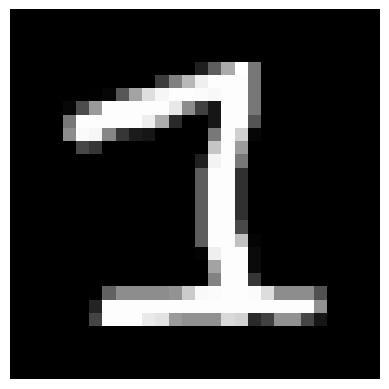

Predicted: 3, Actual: 9


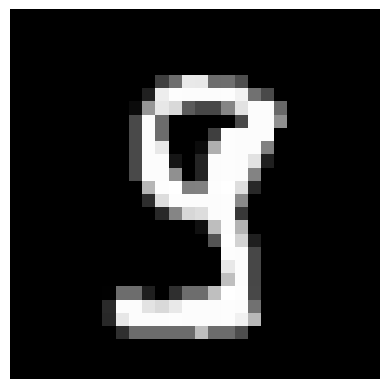

Predicted: 6, Actual: 4


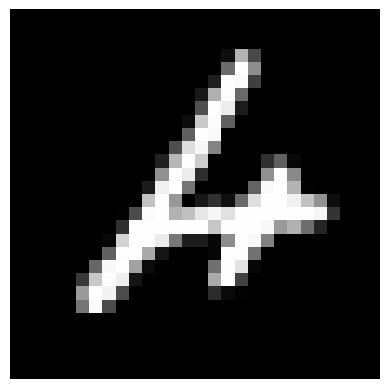

Predicted: 5, Actual: 3


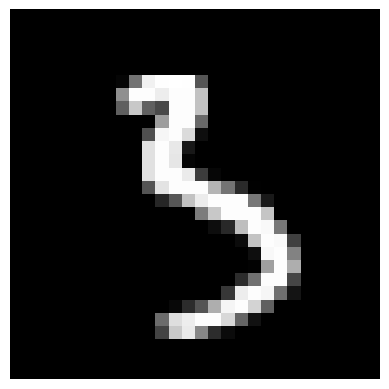

Predicted: 1, Actual: 2


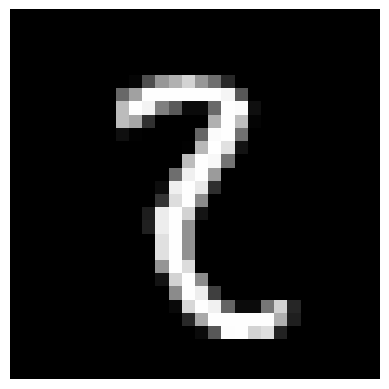

Predicted: 3, Actual: 5


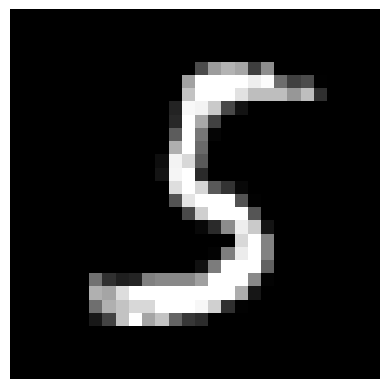

Predicted: 9, Actual: 8


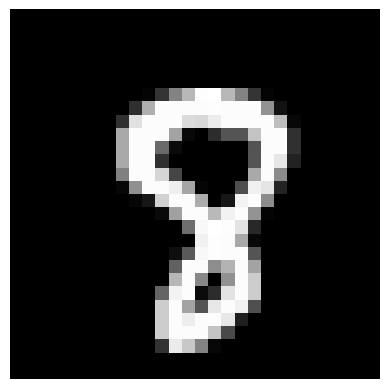

Predicted: 4, Actual: 3


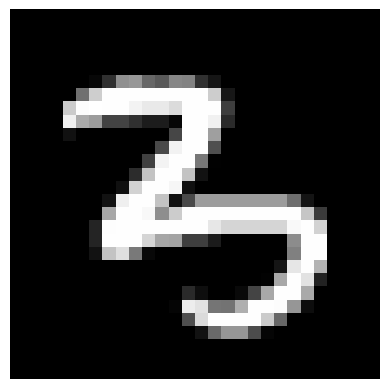

tensor([3, 7, 9, 4, 6, 7, 1, 3, 1, 3, 6, 6, 0, 9, 0, 1, 1, 4, 2, 8, 5, 0, 1, 6,
        9, 7, 5, 3, 4, 7, 6, 9, 4, 4, 3, 6, 3, 1, 1, 9, 6, 9, 1, 8, 4, 3, 1, 9,
        9, 9, 3, 6, 8, 1, 6, 0, 4, 1, 3, 9, 7, 4, 9, 5])
Predicted: 3, Actual: 5


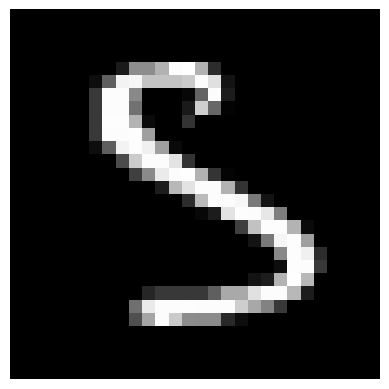

Predicted: 1, Actual: 7


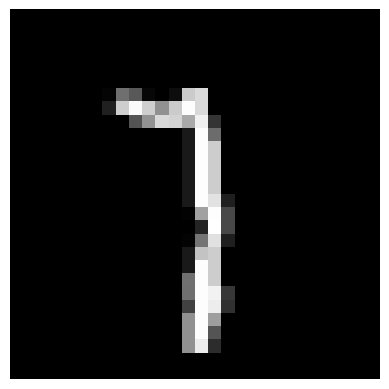

Predicted: 1, Actual: 9


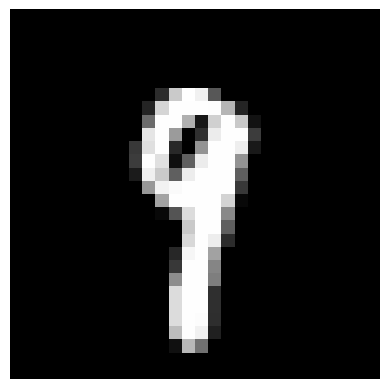

Predicted: 4, Actual: 9


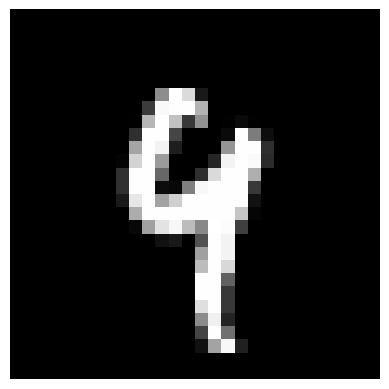

Predicted: 5, Actual: 8


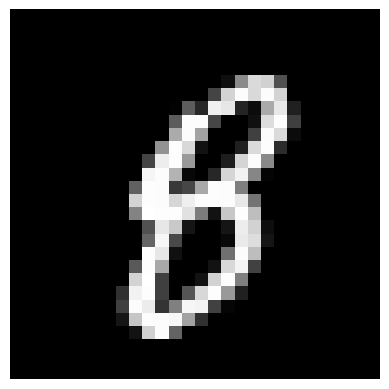

Predicted: 6, Actual: 4


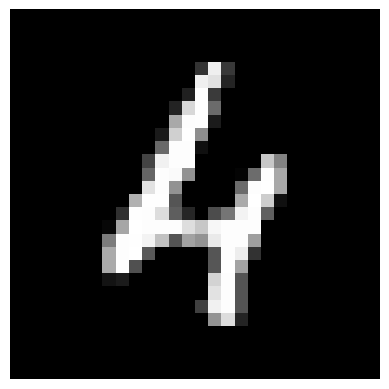

Predicted: 4, Actual: 9


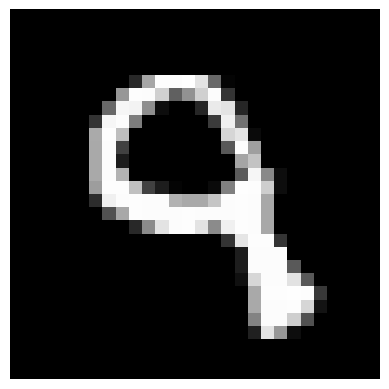

Predicted: 9, Actual: 7


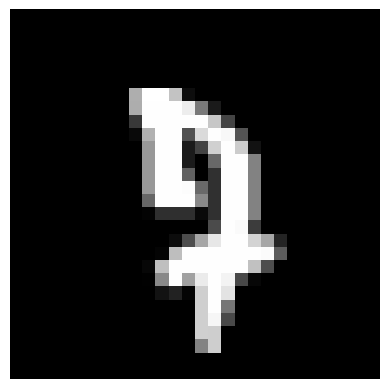

Predicted: 3, Actual: 1


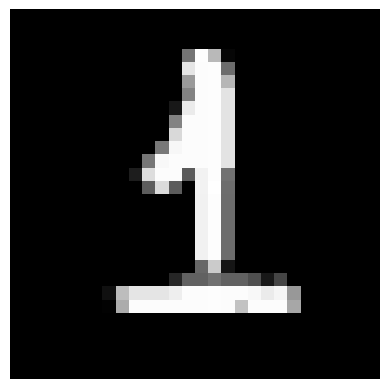

Predicted: 9, Actual: 4


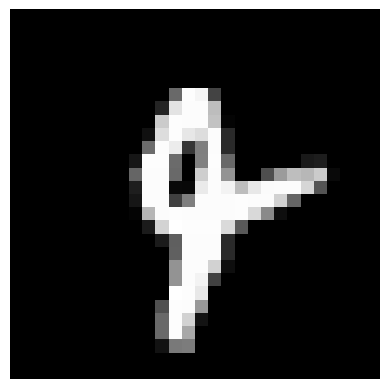

Predicted: 9, Actual: 7


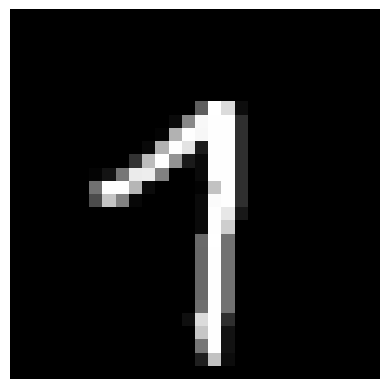

tensor([1, 0, 0, 1, 1, 8, 2, 1, 9, 8, 4, 0, 5, 6, 4, 9, 0, 7, 1, 6, 3, 7, 5, 2,
        5, 1, 8, 8, 4, 7, 0, 5, 7, 6, 2, 5, 3, 1, 0, 4, 3, 7, 1, 0, 9, 1, 2, 0,
        0, 6, 0, 7, 3, 1, 6, 3, 9, 7, 0, 0, 8, 4, 5, 9])
Predicted: 8, Actual: 6


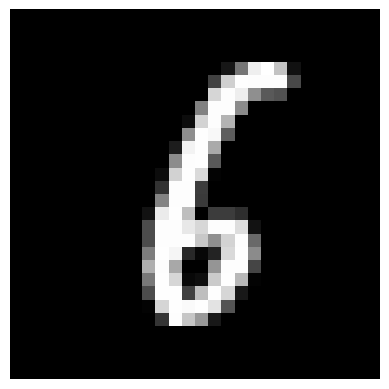

Predicted: 5, Actual: 3


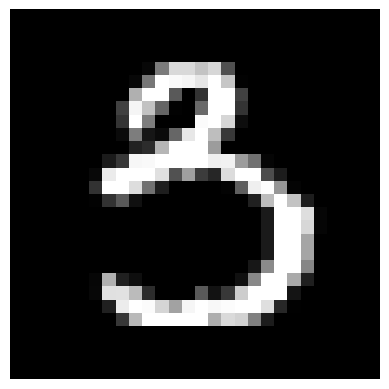

Predicted: 3, Actual: 5


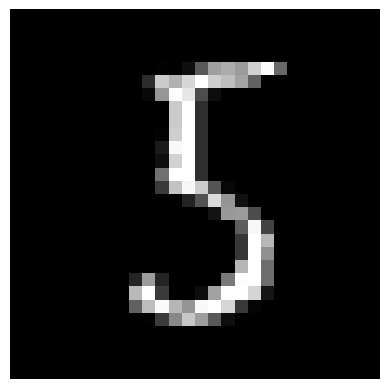

Predicted: 8, Actual: 5


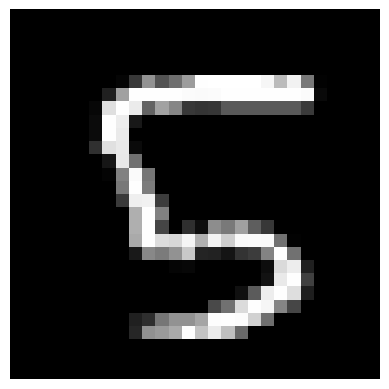

Predicted: 5, Actual: 6


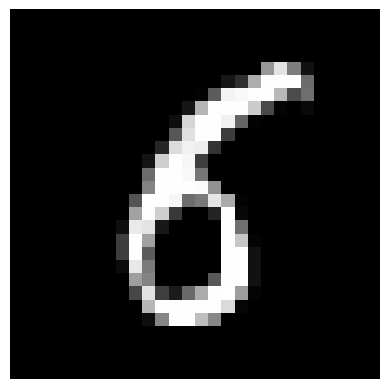

Predicted: 6, Actual: 0


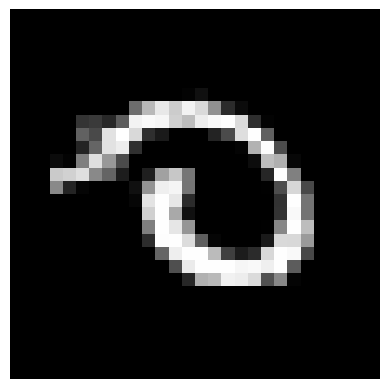

Predicted: 3, Actual: 8


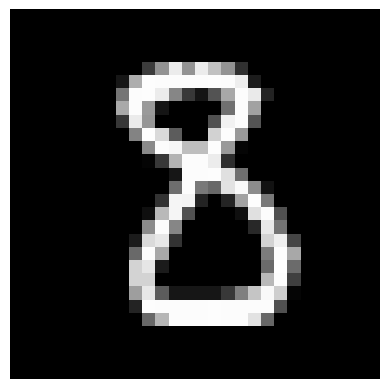

Predicted: 3, Actual: 5


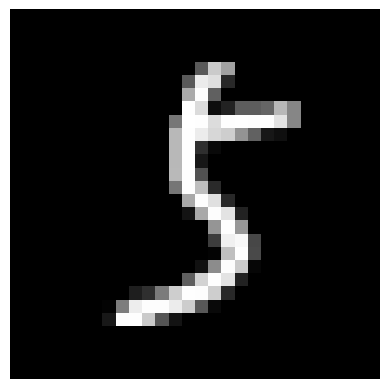

Predicted: 0, Actual: 8


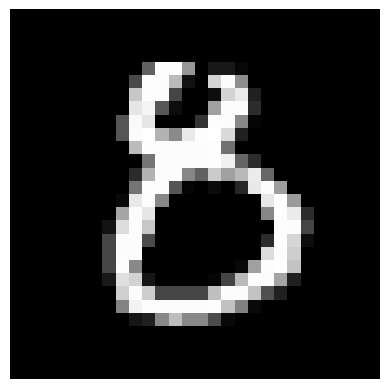

Predicted: 9, Actual: 5


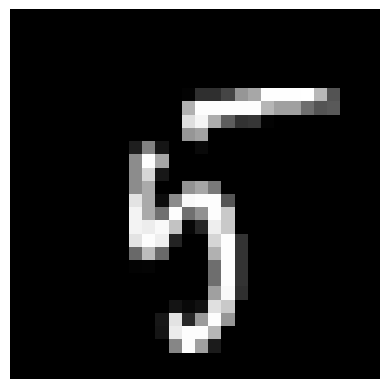

Predicted: 2, Actual: 9


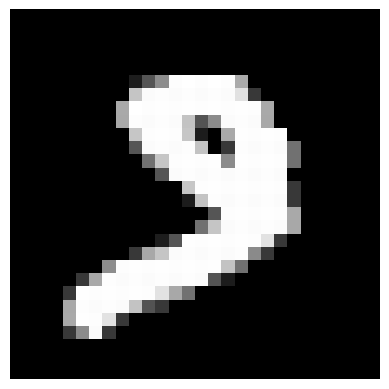

Predicted: 6, Actual: 8


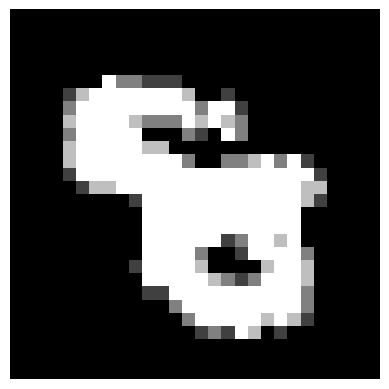

Predicted: 4, Actual: 9


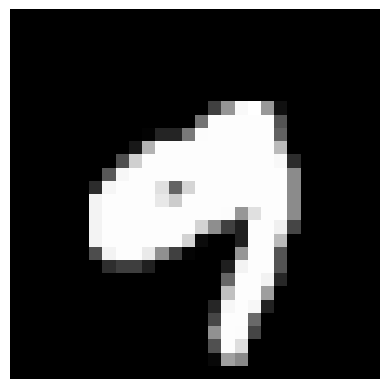

tensor([8, 3, 2, 7, 2, 9, 7, 2, 1, 1, 3, 7, 5, 3, 1, 2, 8, 2, 2, 2, 8, 8, 5, 7,
        3, 8, 9, 8, 8, 6, 8, 2, 3, 9, 7, 3, 6, 2, 9, 2, 8, 8, 1, 4, 3, 9, 7, 9,
        1, 5, 0, 1, 7, 2, 0, 7, 1, 1, 4, 0, 8, 0, 9, 3])
Predicted: 2, Actual: 9


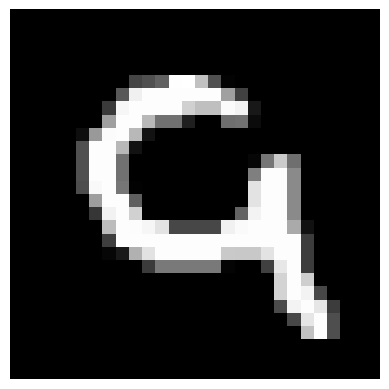

Predicted: 3, Actual: 5


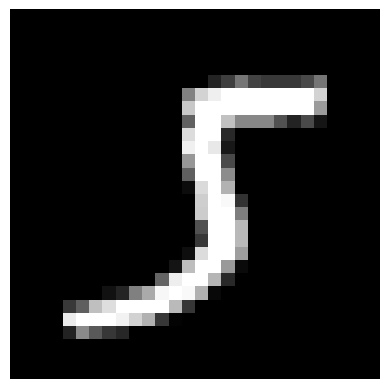

Predicted: 4, Actual: 6


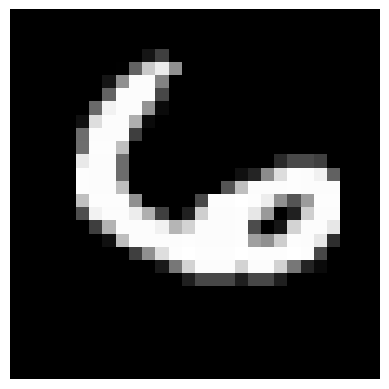

Predicted: 3, Actual: 8


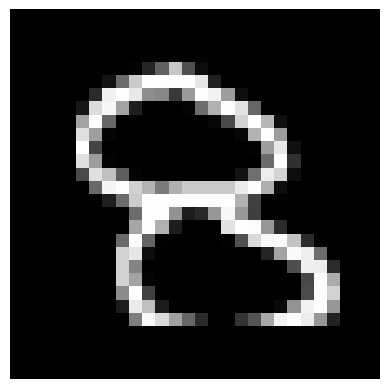

Predicted: 9, Actual: 8


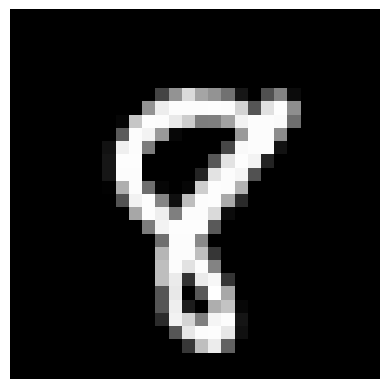

Predicted: 5, Actual: 8


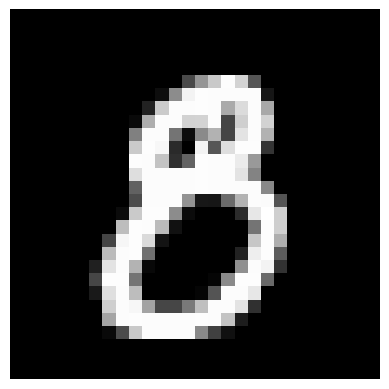

Predicted: 1, Actual: 5


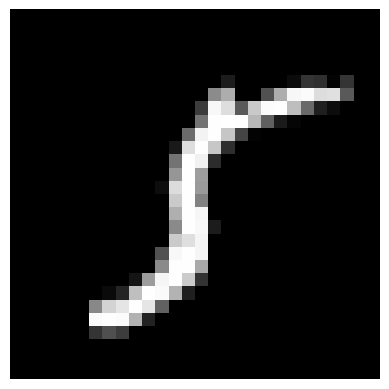

Predicted: 4, Actual: 9


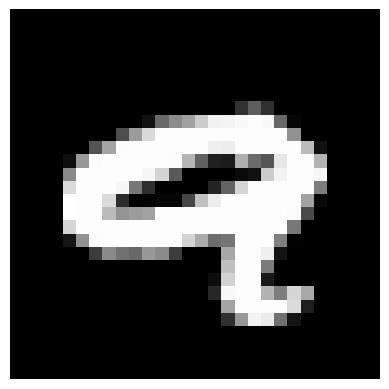

Predicted: 8, Actual: 2


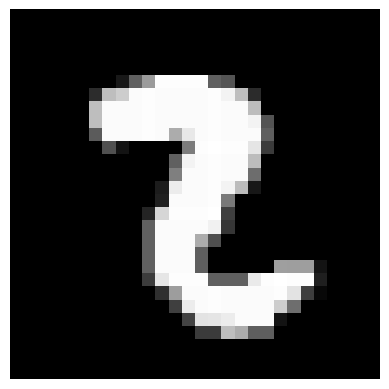

Predicted: 3, Actual: 8


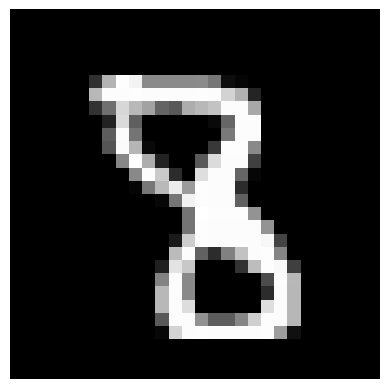

tensor([6, 2, 3, 0, 3, 8, 0, 2, 1, 1, 1, 1, 4, 2, 9, 7, 4, 5, 1, 1, 2, 1, 9, 9,
        9, 1, 0, 4, 0, 2, 1, 1, 4, 6, 9, 1, 5, 4, 9, 9, 7, 5, 5, 4, 2, 3, 2, 8,
        0, 6, 9, 5, 3, 9, 7, 9, 1, 4, 8, 5, 3, 4, 3, 4])
Predicted: 0, Actual: 9


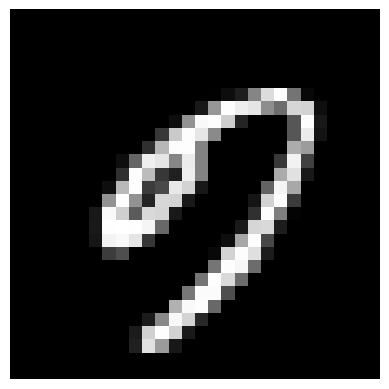

Predicted: 4, Actual: 2


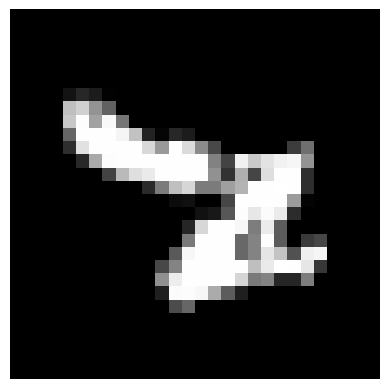

Predicted: 4, Actual: 2


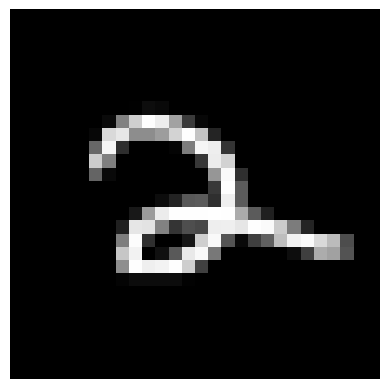

Predicted: 9, Actual: 4


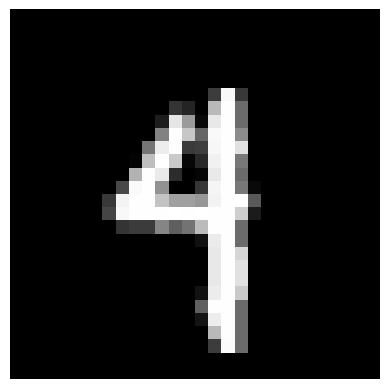

Predicted: 9, Actual: 7


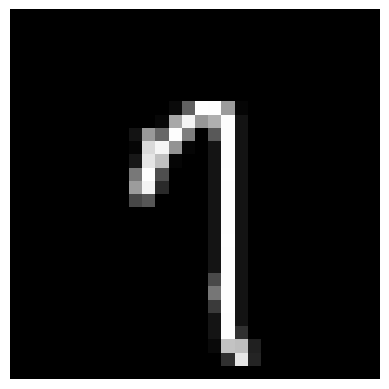

Predicted: 5, Actual: 1


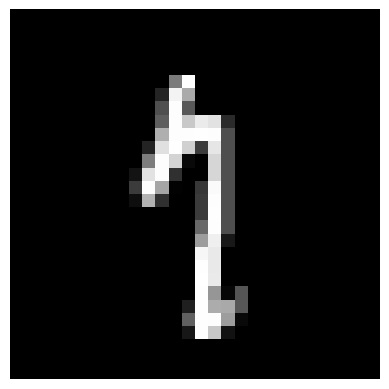

Predicted: 4, Actual: 6


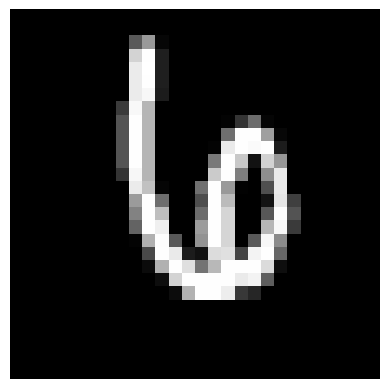

Predicted: 3, Actual: 2


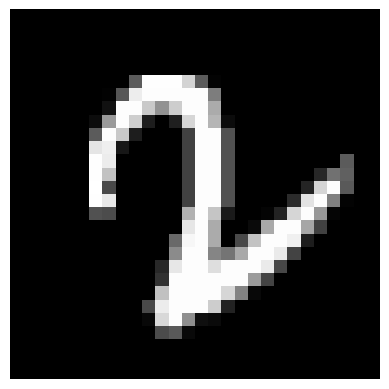

Predicted: 5, Actual: 6


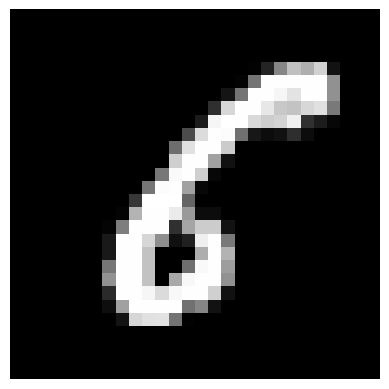

Predicted: 3, Actual: 1


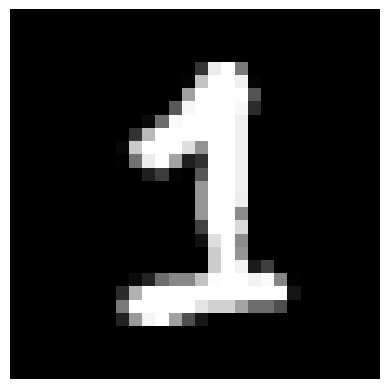

Predicted: 9, Actual: 7


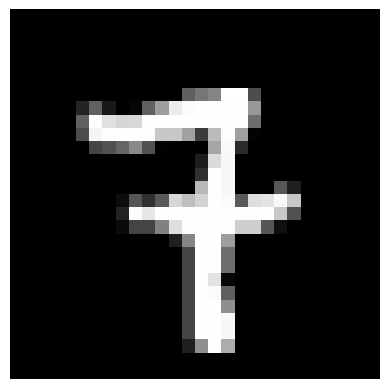

tensor([7, 7, 5, 0, 7, 4, 8, 8, 1, 5, 3, 9, 5, 9, 9, 5, 9, 0, 3, 6, 3, 9, 8, 2,
        8, 1, 2, 8, 6, 8, 3, 0, 0, 9, 4, 9, 3, 5, 1, 3, 1, 8, 4, 1, 4, 4, 3, 3,
        9, 1, 2, 2, 3, 3, 0, 2, 9, 0, 0, 9, 5, 6, 0, 9])
Predicted: 7, Actual: 9


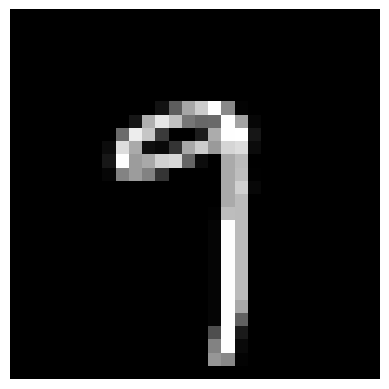

Predicted: 9, Actual: 7


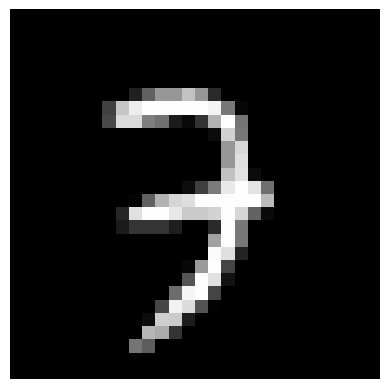

Predicted: 5, Actual: 6


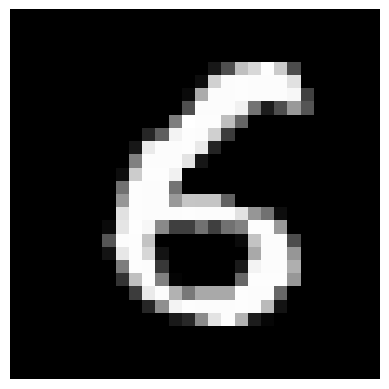

Predicted: 8, Actual: 2


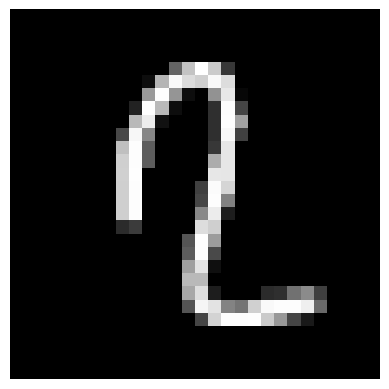

Predicted: 3, Actual: 5


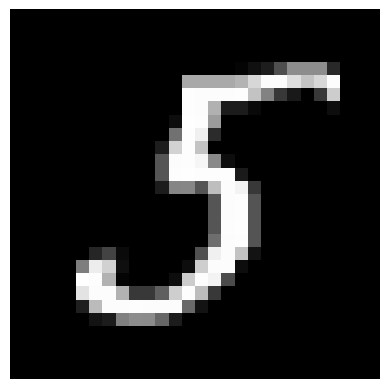

Predicted: 0, Actual: 5


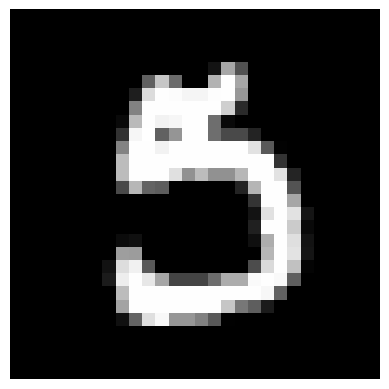

Predicted: 0, Actual: 3


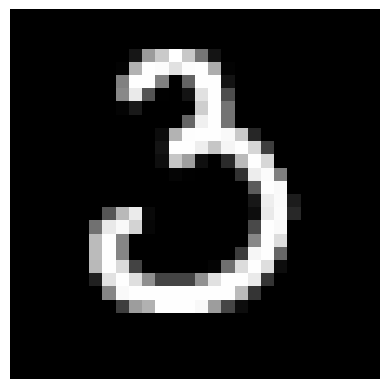

Predicted: 3, Actual: 2


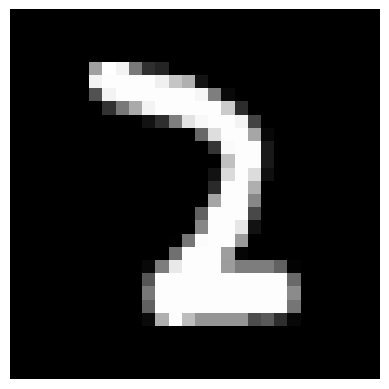

Predicted: 3, Actual: 5


KeyboardInterrupt: 

In [ ]:
# Create a DataLoader for batching the test data
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)
correct = 0
total = 0
# Disable gradient calculation for evaluation
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = instance(images)  # Get model predictions
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # Print and visualize incorrect predictions
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                print(f"Predicted: {predicted[i].item()}, Actual: {labels[i].item()}")
                image_tensor = images[i][0]
                image_to_plot = image_tensor.squeeze()
                plt.imshow(image_to_plot, cmap='gray')
                plt.axis('off')
                plt.show()
# Calculate and print accuracy
accuracy = 100 * correct / total
print(accuracy)